**WORK FLOW**

1.import Libraries and Dataset

2.Data Analysis and calculating basic statistics

3.Data Cleaning Calculating missing values and its matrix with visualization Deleting columns with more than 40% of null values Calculating correlation between columns and removing uncorrelated matrix Modifying dataset for Analysis Calculating AGE,AMT_INCOME_TOTAL,AMT_INCOME_RANGE,AMT_CREDIT_RANGE and YEARS_EMPLOYED Immute values with median and mode based on analysis

4.Analysis: Visualization of graphs with different parameters

5.Conclusions


In [1]:
#getting jupither ready by importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import itertools

In [2]:
#style of graph
style.use('fivethirtyeight')

In [3]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [4]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#setting up display options
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
pd.set_option('display.expand_frame_repr', False)

In [6]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
#reading input data
app=pd.read_csv(r'C:\Users\samal\Documents\datascience nit\june\june1st\1st_Resume project, Python\application_data.csv')
prev=pd.read_csv(r'C:\Users\samal\Documents\datascience nit\june\june1st\1st_Resume project, Python\previous_application.csv')

In [110]:
#displaying top 5 rows
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369                0.0202          0.0190                   0.0000             0.0000           0.0252             0.0383                        0.9722            0.6341           0.0144          0.0000          0.0690          0.0833          0.1250         0.0377                  0.022           0.0198                       0.0                 0.0           0.0250             0.0369                        0.9722            0.6243           0.0144            0.00          0.0690          0.0833          0.1250         0.0375                 0.0205           0.0193                    0.0000                0.00   reg oper account  block of flats          0.0149       Stone, brick       

In [8]:
prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [9]:
#printing size and dimension
print("dimension of application database:", app.shape)
print("dimension of previous application database:", prev.shape)
print("size of application database:", app.size)
print("size of previous application database:", prev.size)

dimension of application database: (307511, 122)
dimension of previous application database: (1670214, 37)
size of application database: 37516342
size of previous application database: 61797918


In [10]:
app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [11]:
prev.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [12]:
app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000   159080.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000      307511.00000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000               265992.000000              265992.00000

In [13]:
prev.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06             1.670214e+06            1.670214e+06      774370.000000            5951.000000               5951.000000   1.670214e+06      1.670214e+06  1.297984e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05             1.248418e+01            9.964675e-01           0.079637               0.188357                  0.773503  -8.806797e+02      3.139511e+02  1.605408e+01       342209.855039    13826.269337               33767.774054   76582.403064      81992.343838                   0.332570
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05             3.334028e+00            5.932963e-02           0.107823               0.087671                  0.100879   7.790997e+02      7.127443e+03  1.456729e+01        88916.115834    72444.869708              106857.034789  149647.415123     153303.516729                   0.471134
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00             0.000000e+00            0.000000e+00          -0.000015               0.034781                  0.373150  -2.922000e+03     -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000               -2801.000000   -2889.000000      -2874.000000                   0.000000
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04             1.000000e+01            1.000000e+00           0.000000               0.160716                  0.715645  -1.300000e+03     -1.000000e+00  6.000000e+00       365243.000000    -1628.000000               -1242.000000   -1314.000000      -1270.000000                   0.000000
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05             1.200000e+01            1.000000e+00           0.051605               0.189122                  0.835095  -5.810000e+02      3.000000e+00  1.200000e+01       365243.000000     -831.000000                -361.000000    -537.000000       -499.000000                   0.000000
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05             1.500000e+01            1.000000e+00           0.108909               0.193330                  0.852537  -2.800000e+02      8.200000e+01  2.400000e+01       365243.000000     -411.000000                 129.000000     -74.000000        -44.000000                   1.000000
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06             2.300000e+01            1.000000e+00           1.000000               1.000000                  1.000000  -1.000000e+00      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

In [14]:
pip install missingno

In [15]:
#DATA CLEANING
#NULL VALUE CALCULATION

<Axes: >

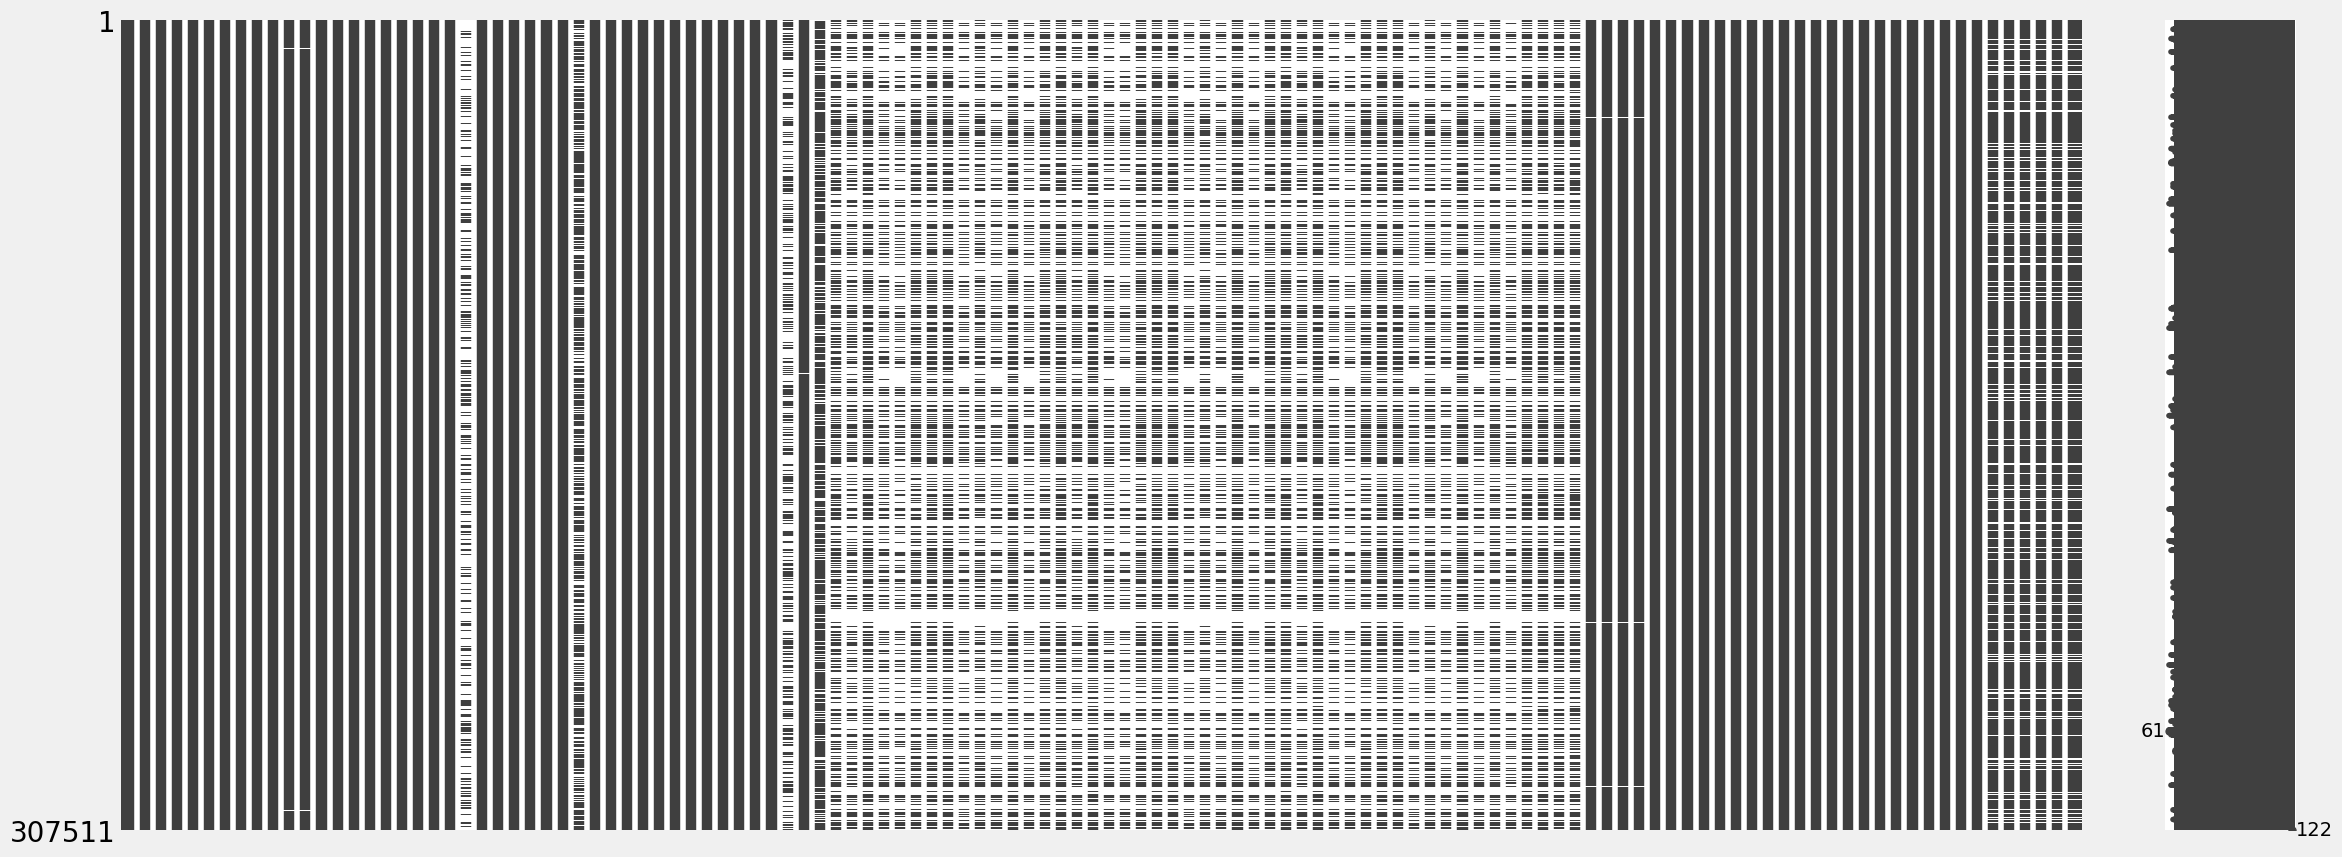

In [16]:
#calculating missing value
import missingno as mn
mn.matrix(app)

lot of spaces (gaps) shows that there are lot of missing values

In [17]:
#calculating null values in each columns
round(app.isnull().sum()/app.shape[0]*100,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

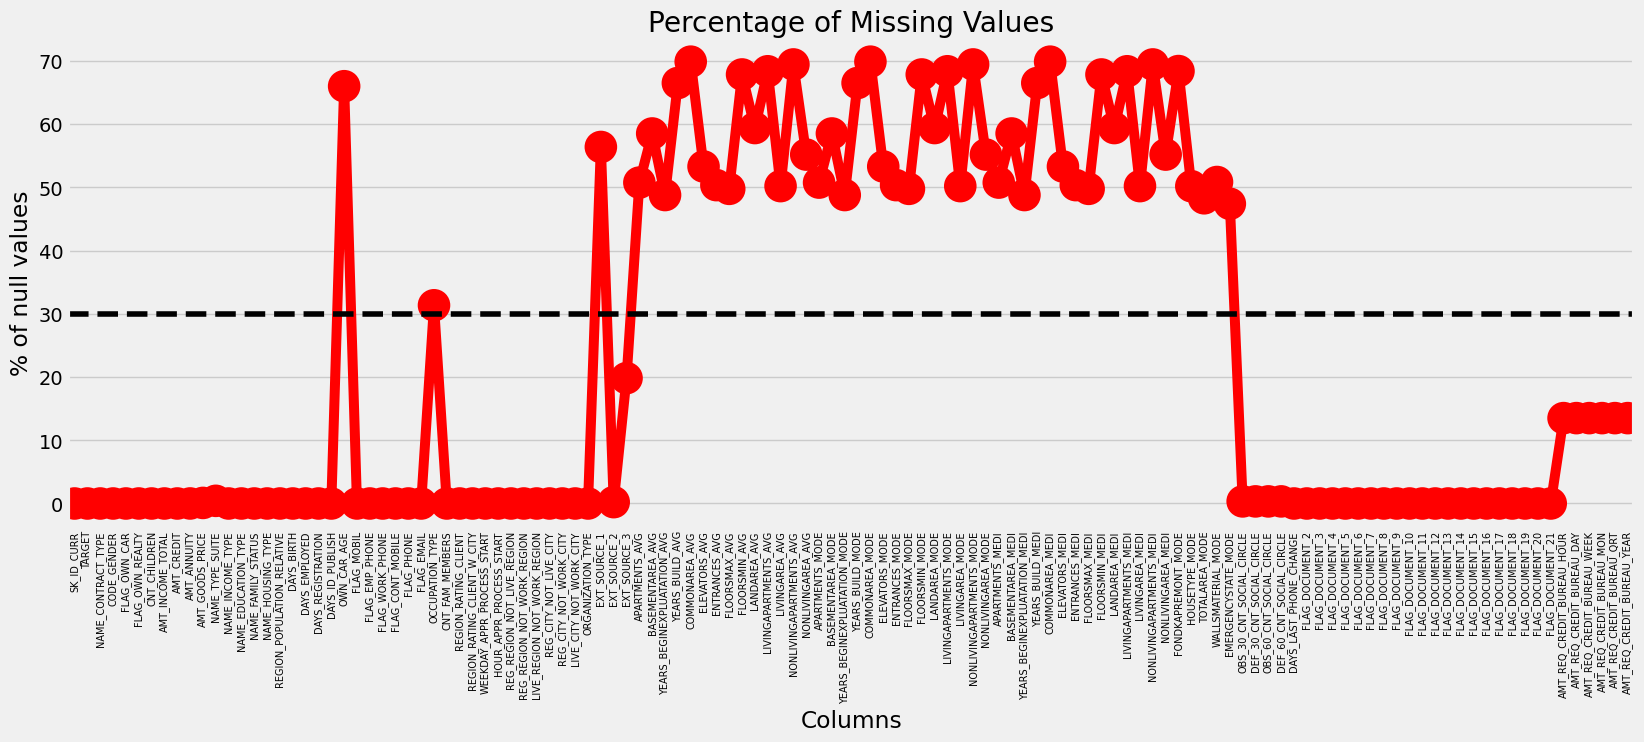

In [18]:
#plot between missing values and columns
null_app=pd.DataFrame((app.isnull().sum())*100/app.shape[0]).reset_index()
null_app.columns=['column name','null value percentage']
fig=plt.figure(figsize=(18,6))
ax=sns.pointplot(x='column name',y='null value percentage',data=null_app,color='red')
plt.xticks(rotation=90,fontsize=7)
ax.axhline(30,ls='--',color='black')
plt.title('Percentage of Missing Values')
plt.xlabel('Columns')
plt.ylabel('% of null values')
plt.show()

From the plot, the columns in which percentage of null values more than 40% are marked above the line and the columns which have less than 40 % null values below the line. Let's check the columns which has more than 40% missing values

In [19]:
#More than or equal to 40% empty rows columns
null_app40=null_app[null_app['null value percentage']>=40]

In [20]:
null_app40

column name  null value percentage
21                   OWN_CAR_AGE              65.990810
41                  EXT_SOURCE_1              56.381073
44                APARTMENTS_AVG              50.749729
45              BASEMENTAREA_AVG              58.515956
46   YEARS_BEGINEXPLUATATION_AVG              48.781019
47               YEARS_BUILD_AVG              66.497784
48                COMMONAREA_AVG              69.872297
49                 ELEVATORS_AVG              53.295980
50                 ENTRANCES_AVG              50.348768
51                 FLOORSMAX_AVG              49.760822
52                 FLOORSMIN_AVG              67.848630
53                  LANDAREA_AVG              59.376738
54          LIVINGAPARTMENTS_AVG              68.354953
55                LIVINGAREA_AVG              50.193326
56       NONLIVINGAPARTMENTS_AVG              69.432963
57             NONLIVINGAREA_AVG              55.179164
58               APARTMENTS_MODE              50.749729
59             BASEMENTAREA_MODE              58.515956
60  YEARS_BEGINEXPLUATATION_MODE              48.781019
61              YEARS_BUILD_MODE              66.497784
62               COMMONAREA_MODE              69.872297
63                ELEVATORS_MODE              53.295980
64                ENTRANCES_MODE              50.348768
65                FLOORSMAX_MODE              49.760822
66                FLOORSMIN_MODE              67.848630
67                 LANDAREA_MODE              59.376738
68         LIVINGAPARTMENTS_MODE              68.354953
69               LIVINGAREA_MODE              50.193326
70      NONLIVINGAPARTMENTS_MODE              69.432963
71            NONLIVINGAREA_MODE              55.179164
72               APARTMENTS_MEDI              50.749729
73             BASEMENTAREA_MEDI              58.515956
74  YEARS_BEGINEXPLUATATION_MEDI              48.781019
75              YEARS_BUILD_MEDI              66.497784
76               COMMONAREA_MEDI              69.872297
77                ELEVATORS_MEDI              53.295980
78                ENTRANCES_MEDI              50.348768
79                FLOORSMAX_MEDI              49.760822
80                FLOORSMIN_MEDI              67.848630
81                 LANDAREA_MEDI              59.376738
82         LIVINGAPARTMENTS_MEDI              68.354953
83               LIVINGAREA_MEDI              50.193326
84      NONLIVINGAPARTMENTS_MEDI              69.432963
85            NONLIVINGAREA_MEDI              55.179164
86            FONDKAPREMONT_MODE              68.386172
87                HOUSETYPE_MODE              50.176091
88                TOTALAREA_MODE              48.268517
89            WALLSMATERIAL_MODE              50.840783
90           EMERGENCYSTATE_MODE              47.398304

In [21]:
null_app40.count()

column name              49
null value percentage    49
dtype: int64

In [22]:
len(null_app40)

49

<Axes: >

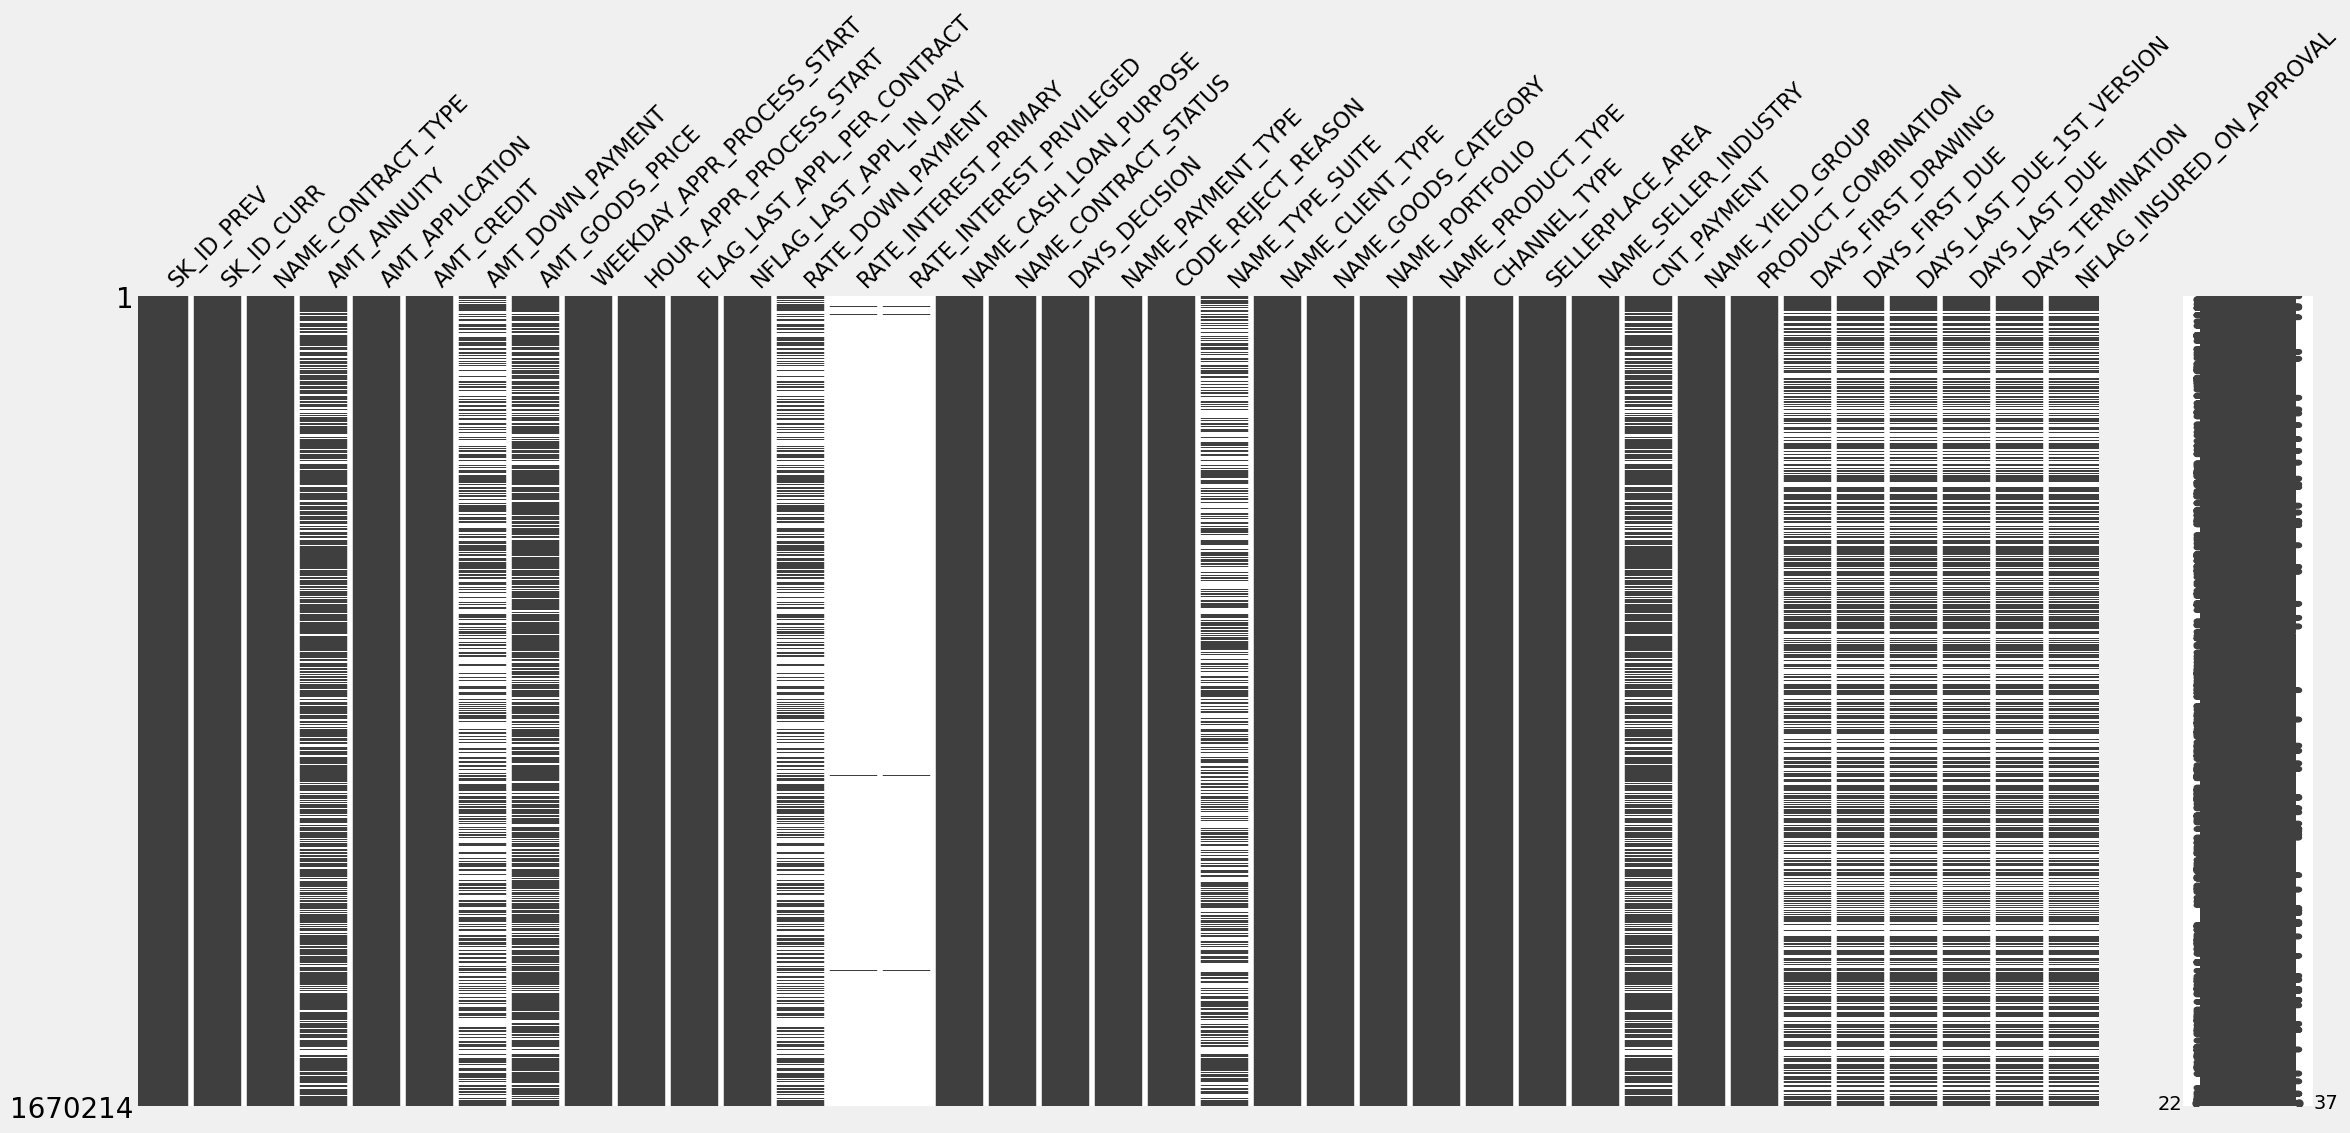

In [23]:
#now calculate for previous application
mn.matrix(prev)

In [24]:
round_prev=(prev.isnull().sum()/prev.shape[0]*100,2)
round_prev

(SK_ID_PREV                      0.000000
 SK_ID_CURR                      0.000000
 NAME_CONTRACT_TYPE              0.000000
 AMT_ANNUITY                    22.286665
 AMT_APPLICATION                 0.000000
 AMT_CREDIT                      0.000060
 AMT_DOWN_PAYMENT               53.636480
 AMT_GOODS_PRICE                23.081773
 WEEKDAY_APPR_PROCESS_START      0.000000
 HOUR_APPR_PROCESS_START         0.000000
 FLAG_LAST_APPL_PER_CONTRACT     0.000000
 NFLAG_LAST_APPL_IN_DAY          0.000000
 RATE_DOWN_PAYMENT              53.636480
 RATE_INTEREST_PRIMARY          99.643698
 RATE_INTEREST_PRIVILEGED       99.643698
 NAME_CASH_LOAN_PURPOSE          0.000000
 NAME_CONTRACT_STATUS            0.000000
 DAYS_DECISION                   0.000000
 NAME_PAYMENT_TYPE               0.000000
 CODE_REJECT_REASON              0.000000
 NAME_TYPE_SUITE                49.119754
 NAME_CLIENT_TYPE                0.000000
 NAME_GOODS_CATEGORY             0.000000
 NAME_PORTFOLIO                  0

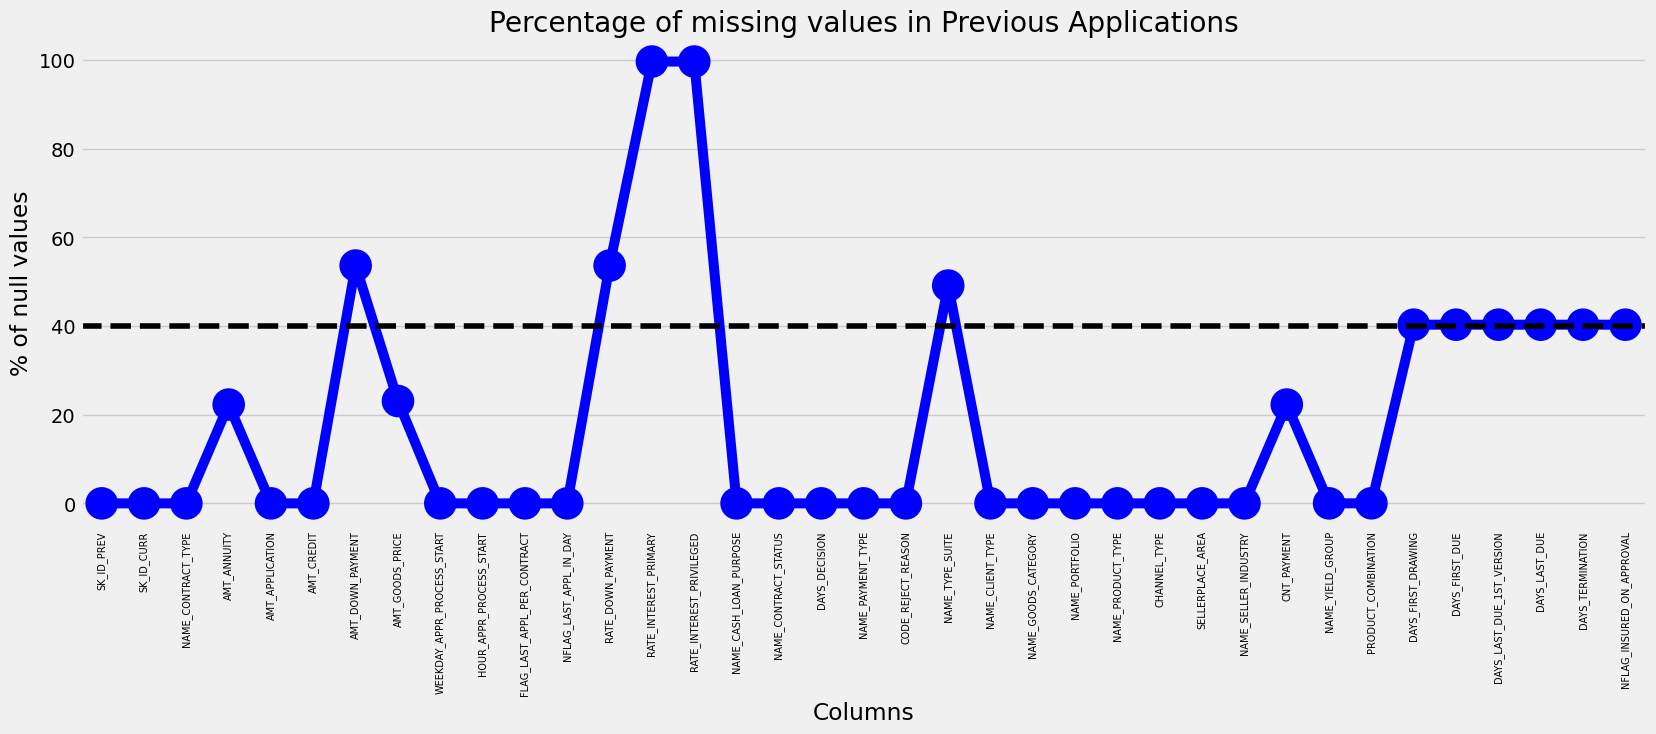

In [25]:
null_prev=pd.DataFrame((prev.isnull().sum())*100/prev.shape[0]).reset_index()
null_prev.columns = ['Column Name', 'Null Values Percentage']
plt.figure(figsize=(18,6))
ax=sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_prev,color ='blue')
plt.xticks(rotation =90,fontsize=7)
ax.axhline(40,ls='--',color='black')
plt.xlabel('Columns')
plt.title( 'Percentage of missing values in Previous Applications')
plt.ylabel('% of null values')
plt.show()

we can see that null values more than 40% are above the line and below the line are less than 40% missing values in column. previous data has less missing values compared to present application

In [26]:
null_prev40=null_prev[null_prev['Null Values Percentage']>=40]

In [27]:
null_prev40

Column Name  Null Values Percentage
6            AMT_DOWN_PAYMENT               53.636480
12          RATE_DOWN_PAYMENT               53.636480
13      RATE_INTEREST_PRIMARY               99.643698
14   RATE_INTEREST_PRIVILEGED               99.643698
20            NAME_TYPE_SUITE               49.119754
31         DAYS_FIRST_DRAWING               40.298129
32             DAYS_FIRST_DUE               40.298129
33  DAYS_LAST_DUE_1ST_VERSION               40.298129
34              DAYS_LAST_DUE               40.298129
35           DAYS_TERMINATION               40.298129
36  NFLAG_INSURED_ON_APPROVAL               40.298129

In [28]:
len(null_prev40)

11

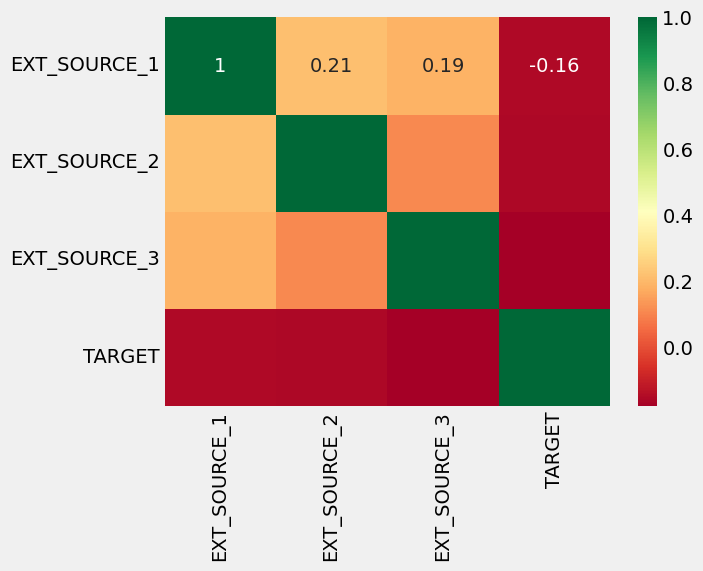

In [29]:
#checking correlation EXT_SOURCE_X and TARGET
Source = app[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

the correlation is very low based on the heatmap so these rows can be deleted

In [30]:
null_app40

column name  null value percentage
21                   OWN_CAR_AGE              65.990810
41                  EXT_SOURCE_1              56.381073
44                APARTMENTS_AVG              50.749729
45              BASEMENTAREA_AVG              58.515956
46   YEARS_BEGINEXPLUATATION_AVG              48.781019
47               YEARS_BUILD_AVG              66.497784
48                COMMONAREA_AVG              69.872297
49                 ELEVATORS_AVG              53.295980
50                 ENTRANCES_AVG              50.348768
51                 FLOORSMAX_AVG              49.760822
52                 FLOORSMIN_AVG              67.848630
53                  LANDAREA_AVG              59.376738
54          LIVINGAPARTMENTS_AVG              68.354953
55                LIVINGAREA_AVG              50.193326
56       NONLIVINGAPARTMENTS_AVG              69.432963
57             NONLIVINGAREA_AVG              55.179164
58               APARTMENTS_MODE              50.749729
59             BASEMENTAREA_MODE              58.515956
60  YEARS_BEGINEXPLUATATION_MODE              48.781019
61              YEARS_BUILD_MODE              66.497784
62               COMMONAREA_MODE              69.872297
63                ELEVATORS_MODE              53.295980
64                ENTRANCES_MODE              50.348768
65                FLOORSMAX_MODE              49.760822
66                FLOORSMIN_MODE              67.848630
67                 LANDAREA_MODE              59.376738
68         LIVINGAPARTMENTS_MODE              68.354953
69               LIVINGAREA_MODE              50.193326
70      NONLIVINGAPARTMENTS_MODE              69.432963
71            NONLIVINGAREA_MODE              55.179164
72               APARTMENTS_MEDI              50.749729
73             BASEMENTAREA_MEDI              58.515956
74  YEARS_BEGINEXPLUATATION_MEDI              48.781019
75              YEARS_BUILD_MEDI              66.497784
76               COMMONAREA_MEDI              69.872297
77                ELEVATORS_MEDI              53.295980
78                ENTRANCES_MEDI              50.348768
79                FLOORSMAX_MEDI              49.760822
80                FLOORSMIN_MEDI              67.848630
81                 LANDAREA_MEDI              59.376738
82         LIVINGAPARTMENTS_MEDI              68.354953
83               LIVINGAREA_MEDI              50.193326
84      NONLIVINGAPARTMENTS_MEDI              69.432963
85            NONLIVINGAREA_MEDI              55.179164
86            FONDKAPREMONT_MODE              68.386172
87                HOUSETYPE_MODE              50.176091
88                TOTALAREA_MODE              48.268517
89            WALLSMATERIAL_MODE              50.840783
90           EMERGENCYSTATE_MODE              47.398304

In [31]:
#dropping all columns with more than 40% null value columns and ext source 1,2,3. ext_source 1 has more than 40 % null values
unwanted_app=null_app40['column name'].tolist()+["EXT_SOURCE_2","EXT_SOURCE_3"]

In [32]:
len(unwanted_app)

51

In [33]:
available=null_app[null_app['null value percentage']<40]
available

column name  null value percentage
0                     SK_ID_CURR               0.000000
1                         TARGET               0.000000
2             NAME_CONTRACT_TYPE               0.000000
3                    CODE_GENDER               0.000000
4                   FLAG_OWN_CAR               0.000000
5                FLAG_OWN_REALTY               0.000000
6                   CNT_CHILDREN               0.000000
7               AMT_INCOME_TOTAL               0.000000
8                     AMT_CREDIT               0.000000
9                    AMT_ANNUITY               0.003902
10               AMT_GOODS_PRICE               0.090403
11               NAME_TYPE_SUITE               0.420148
12              NAME_INCOME_TYPE               0.000000
13           NAME_EDUCATION_TYPE               0.000000
14            NAME_FAMILY_STATUS               0.000000
15             NAME_HOUSING_TYPE               0.000000
16    REGION_POPULATION_RELATIVE               0.000000
17                    DAYS_BIRTH               0.000000
18                 DAYS_EMPLOYED               0.000000
19             DAYS_REGISTRATION               0.000000
20               DAYS_ID_PUBLISH               0.000000
22                    FLAG_MOBIL               0.000000
23                FLAG_EMP_PHONE               0.000000
24               FLAG_WORK_PHONE               0.000000
25              FLAG_CONT_MOBILE               0.000000
26                    FLAG_PHONE               0.000000
27                    FLAG_EMAIL               0.000000
28               OCCUPATION_TYPE              31.345545
29               CNT_FAM_MEMBERS               0.000650
30          REGION_RATING_CLIENT               0.000000
31   REGION_RATING_CLIENT_W_CITY               0.000000
32    WEEKDAY_APPR_PROCESS_START               0.000000
33       HOUR_APPR_PROCESS_START               0.000000
34    REG_REGION_NOT_LIVE_REGION               0.000000
35    REG_REGION_NOT_WORK_REGION               0.000000
36   LIVE_REGION_NOT_WORK_REGION               0.000000
37        REG_CITY_NOT_LIVE_CITY               0.000000
38        REG_CITY_NOT_WORK_CITY               0.000000
39       LIVE_CITY_NOT_WORK_CITY               0.000000
40             ORGANIZATION_TYPE               0.000000
42                  EXT_SOURCE_2               0.214626
43                  EXT_SOURCE_3              19.825307
91      OBS_30_CNT_SOCIAL_CIRCLE               0.332021
92      DEF_30_CNT_SOCIAL_CIRCLE               0.332021
93      OBS_60_CNT_SOCIAL_CIRCLE               0.332021
94      DEF_60_CNT_SOCIAL_CIRCLE               0.332021
95        DAYS_LAST_PHONE_CHANGE               0.000325
96               FLAG_DOCUMENT_2               0.000000
97               FLAG_DOCUMENT_3               0.000000
98               FLAG_DOCUMENT_4               0.000000
99               FLAG_DOCUMENT_5               0.000000
100              FLAG_DOCUMENT_6               0.000000
101              FLAG_DOCUMENT_7               0.000000
102              FLAG_DOCUMENT_8               0.000000
103              FLAG_DOCUMENT_9               0.000000
104             FLAG_DOCUMENT_10               0.000000
105             FLAG_DOCUMENT_11               0.000000
106             FLAG_DOCUMENT_12               0.000000
107             FLAG_DOCUMENT_13               0.000000
108             FLAG_DOCUMENT_14               0.000000
109             FLAG_DOCUMENT_15               0.000000
110             FLAG_DOCUMENT_16               0.000000
111             FLAG_DOCUMENT_17               0.000000
112             FLAG_DOCUMENT_18               0.000000
113             FLAG_DOCUMENT_19               0.000000
114             FLAG_DOCUMENT_20               0.000000
115             FLAG_DOCUMENT_21               0.000000
116   AMT_REQ_CREDIT_BUREAU_HOUR              13.501631
117    AMT_REQ_CREDIT_BUREAU_DAY              13.501631
118   AMT_REQ_CREDIT_BUREAU_WEEK              13.501631
119    AMT_REQ_CREDIT_BUREAU_MON             

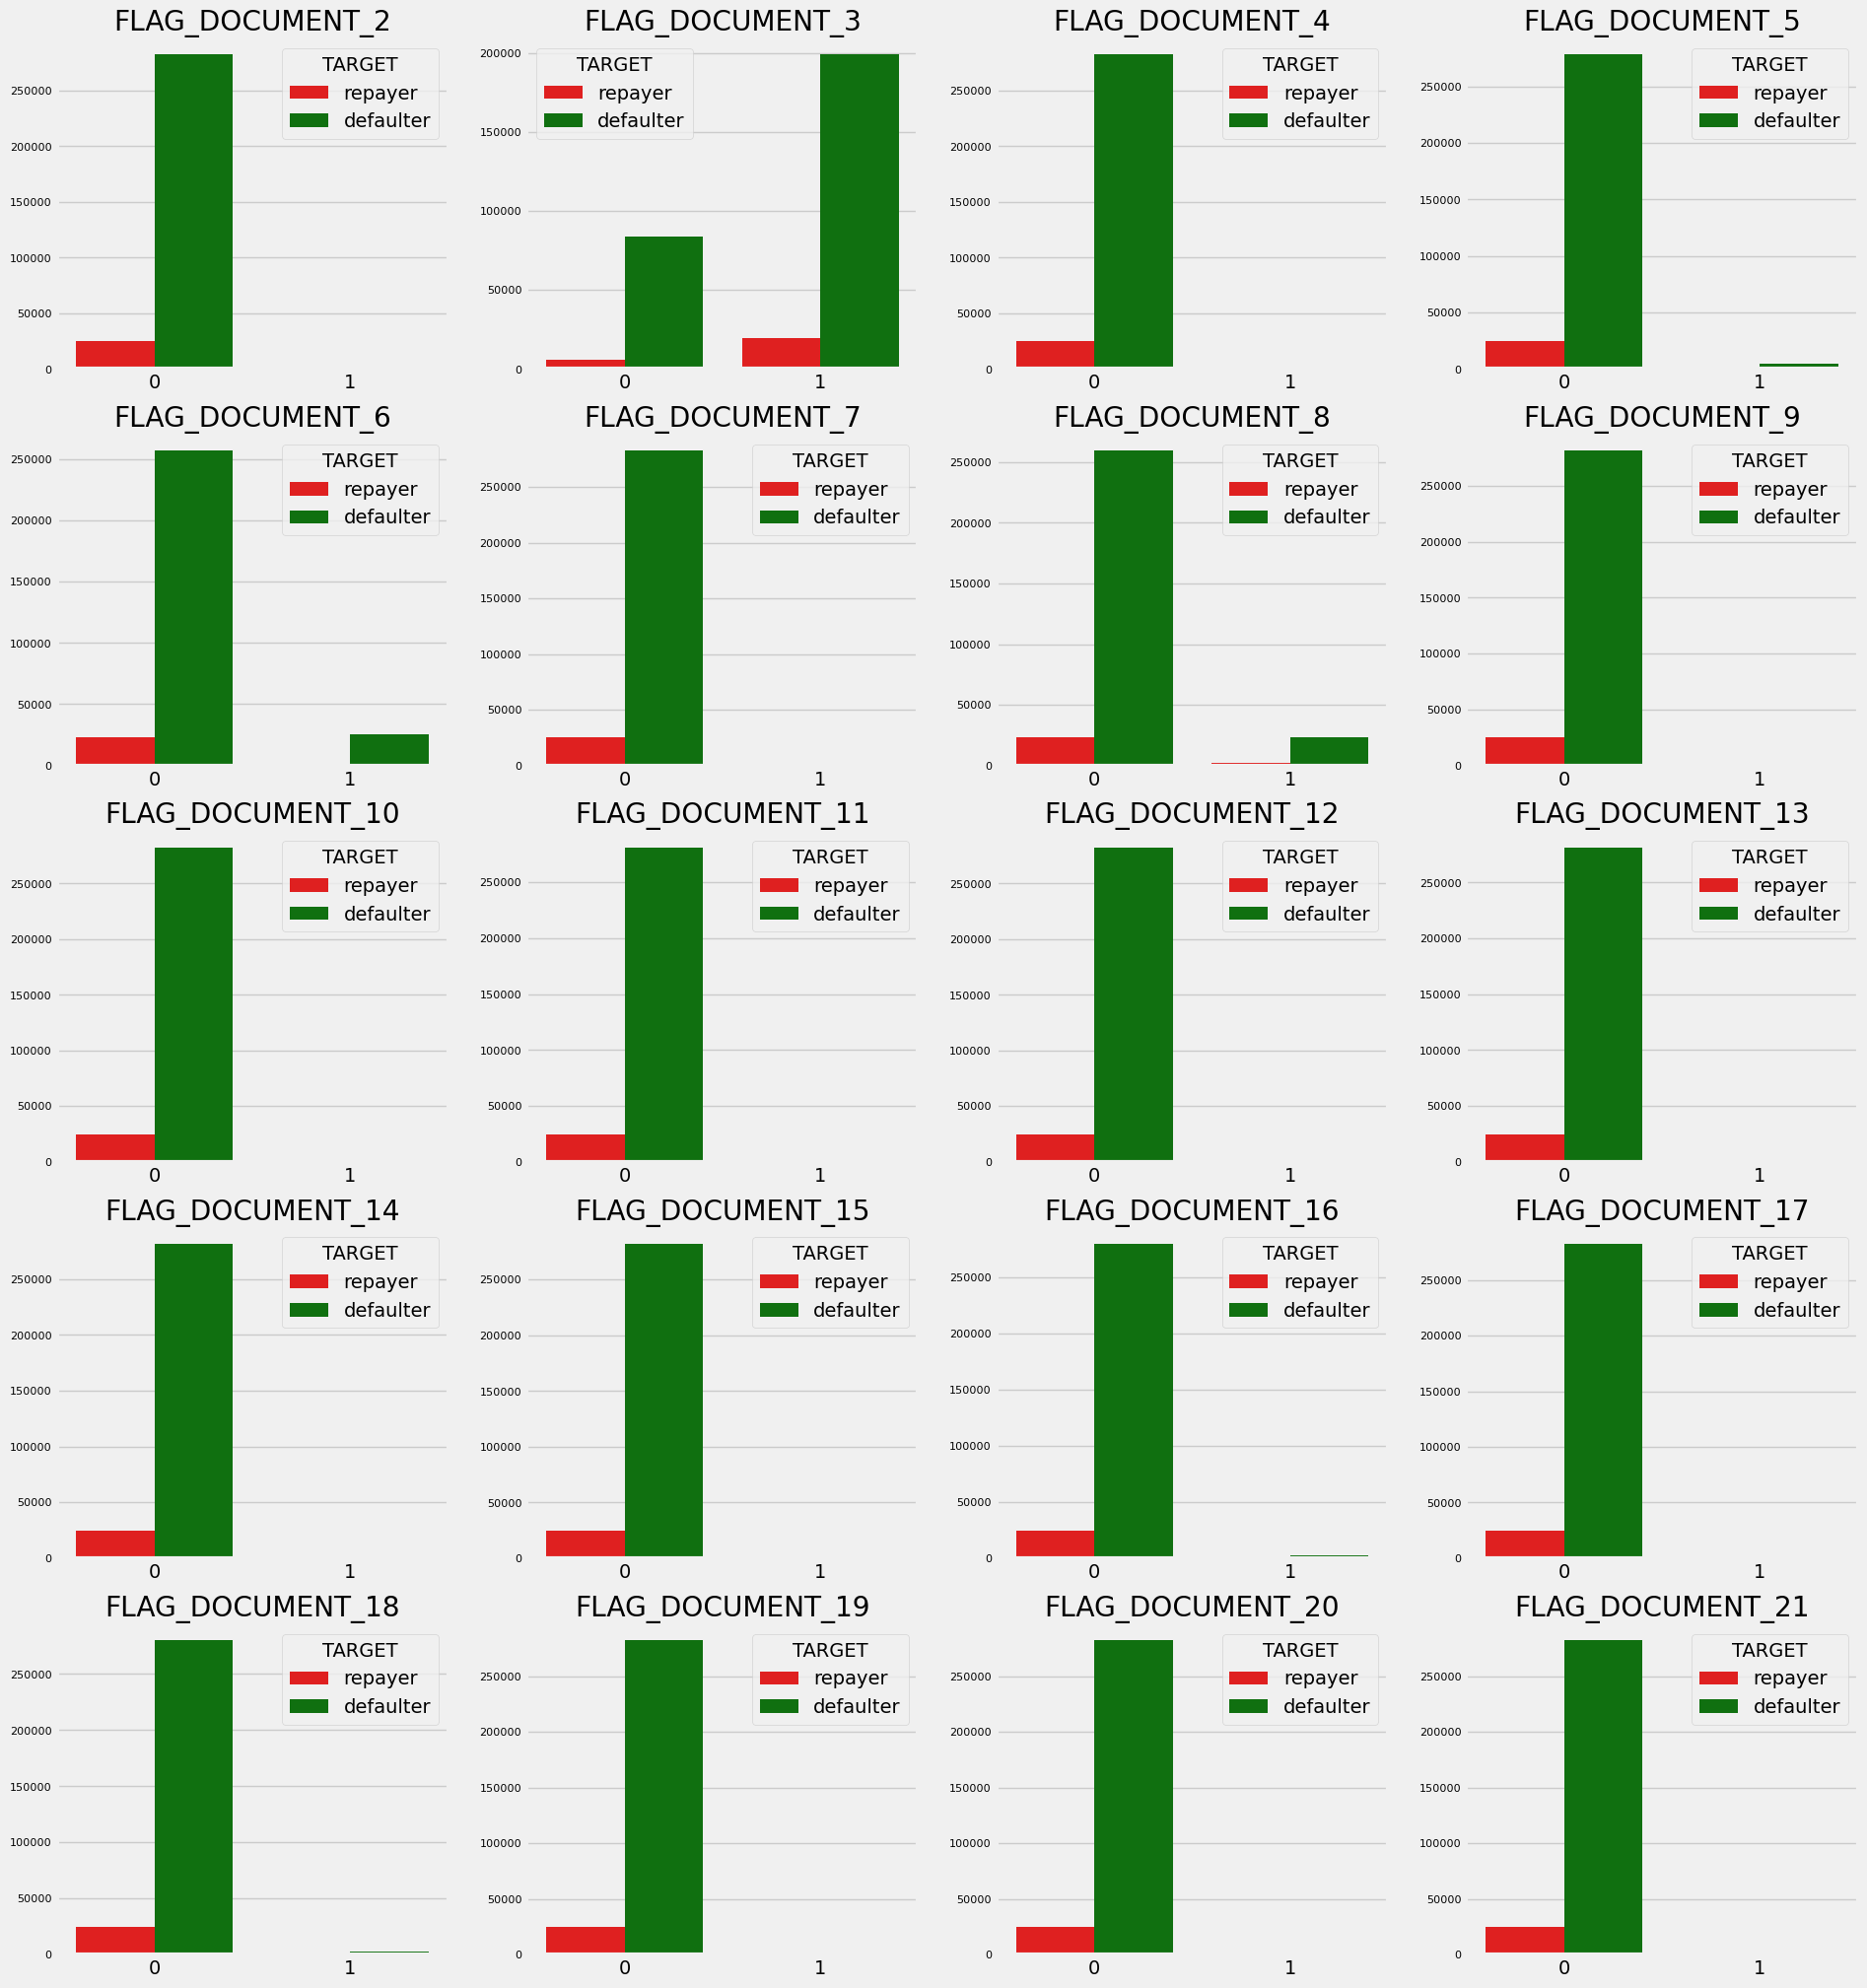

In [34]:
#Flag Document analysis
col_docs= ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
app_flag=app[col_docs+["TARGET"]]
length=len(col_docs)
app_flag["TARGET"]=app_flag["TARGET"].replace({0:'defaulter',1:'repayer'})
fig=plt.figure(figsize=(21,24))
for i,j in itertools.zip_longest(col_docs,range(length)):
    plt.subplot(5,4,j+1)
    ax=sns.countplot(x=app_flag[i], hue=app_flag['TARGET'], palette=['r','g'])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

The above graph illustrate that in most of the applications, clients has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.

In [35]:
col_docs.remove('FLAG_DOCUMENT_3')
unwanted_app=unwanted_app+col_docs
len(unwanted_app)

70

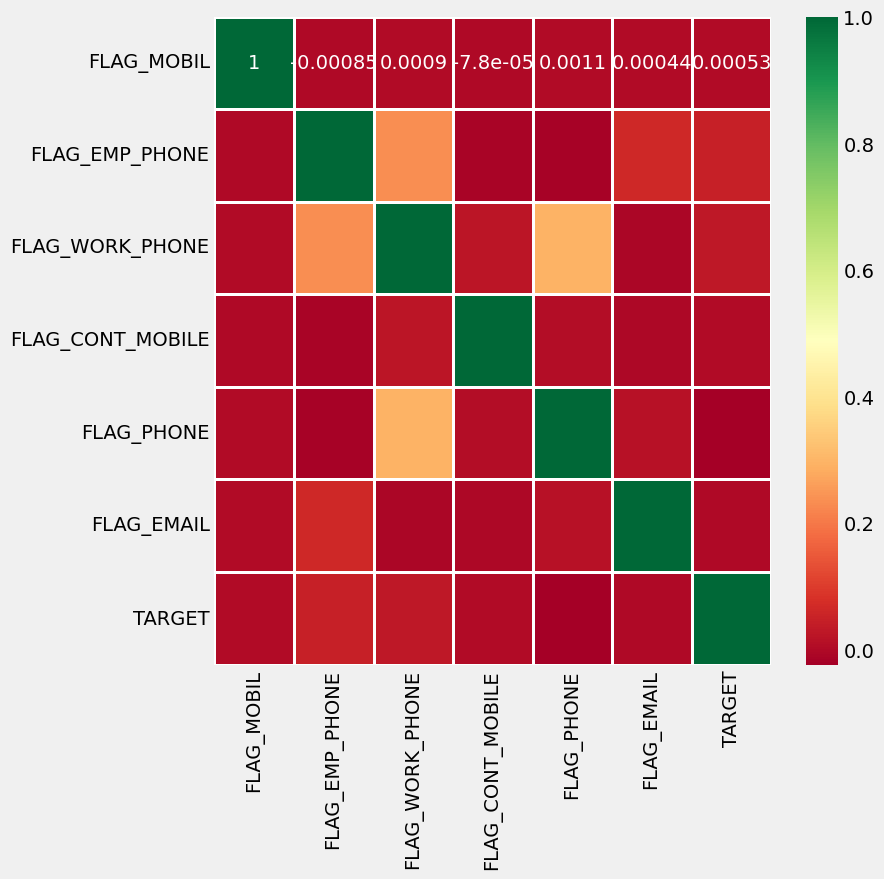

In [36]:
#Contact Parameters:
contact_col=['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','TARGET']
contact_corr=app[contact_col].corr()
fig=plt.figure(figsize=(8,8))
ax=sns.heatmap(contact_corr, xticklabels=contact_corr.columns,yticklabels=contact_corr.columns,annot=True, cmap='RdYlGn',linewidth=1)

There is no relation between contact information and loan repayment. So these columns can be removed

In [37]:
contact_col.remove('TARGET')
unwanted_app=unwanted_app+contact_col

len(unwanted_app)

76

In [38]:
unwanted_app

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [39]:
#76 columns to be deleted from the main application data
app.drop(columns=unwanted_app,inplace=True)

In [40]:
app.shape

(307511, 46)

In [41]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [42]:
unwanted_prev=null_prev40['Column Name'].tolist()

In [43]:
unwanted_prev

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [44]:
prev

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0           2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1           0.000000               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater                Mobile            POS               XNA             Country-wide                35          Connectivity         12.0           middle     POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1           2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                   XNA           Cash            x-sell           Contact center                -1                   XNA         36.0       low_action             Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2           2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                   XNA           Cash            x-sell  Credit and cash offices                -1                   XNA         12.0             high            Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3           2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                   XNA           Cash            x-sell  Credit and cash offices                -1                   XNA         12.0           middle          Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4           1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs  

In [45]:
unnecessary_prev=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
unwanted_prev=unwanted_prev+unnecessary_prev
len(unwanted_prev)

15

In [46]:
#dropping those 5 columns
prev.drop(labels=unwanted_prev,axis=1,inplace=True)

In [47]:
prev.shape

(1670214, 22)

In [48]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

After deleting the unneccesary columns in application and previous application data. we removed data with null values more than 40% and unwanted data. Finally we have 46 columns in application and 22 columns in previous application dataset.

In [49]:
app

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0           100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0
1           100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family         State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0
2           100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0
3           100006       0         Cash loans   

Next strategies for application dataset DAYS_BIRTH DAYS_EMPLOYED DAYS_REGISTRATION DAYS_ID_PUBLISH can't be negative calculate age and convert into categorical data *change range rating columns into categorical data

In [50]:
date_col=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for col in date_col:
    app[col]=abs(app[col])

In [51]:
app

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0           100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0
1           100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family         State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0
2           100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032       19046            225             4260.0             2531        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0
3           100006       0         Cash loans   

In [52]:
app['AMT_INCOME_TOTAL']=app['AMT_INCOME_TOTAL']/100000

bins=[0,1,2,3,4,5,6,7,8,9,10,11]
slots=['0-100k','100-200k','200-300k','300k-400k','400k-500k','500k-600k','600k-700k','700-800k','800-900k','900k-1M','1M Above']
app['AMT_INCOME_RANGE']=pd.cut(app['AMT_INCOME_TOTAL'],bins,labels=slots)

In [53]:
app

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE
0           100002       1         Cash loans           M            N               Y             0             2.025    406597.5      24700.5         351000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0         200-300k
1           100003       0         Cash loans           F            N               N             0             2.700   1293502.5      35698.5        1129500.0          Family         State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0         200-300k
2           100004       0    Revolving loans           M            Y               Y             0             0.675    135000.0       6750.0         135000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032       19046            225             4260.0             2531        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                0                         0.0                        0.0                         0.0                        0.0                        0.0                         0

In [54]:
app['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

AMT_INCOME_RANGE
100-200k     50.735000
200-300k     21.210691
0-100k       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800-900k      0.096980
700-800k      0.052721
900k-1M       0.009112
1M Above      0.005858
Name: proportion, dtype: float64

almost 50% of applicants has income in the range 100-200k. around 93% of loan applicants belongs low income range less than 300k

In [55]:
# Creating bins for Credit amount
app['AMT_CREDIT']=app['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

app['AMT_CREDIT_RANGE']=pd.cut(app['AMT_CREDIT'],bins=bins,labels=slots)

In [56]:
app['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

AMT_CREDIT_RANGE
200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: proportion, dtype: float64

In [57]:
app['AGE']=app['DAYS_BIRTH']//365

In [58]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CRED

In [59]:
bins=[0,20,30,40,50,100]
slots=['0-20','20-30','30-40','40-50','50&ABOVE']
app['AGE_GROUP']=pd.cut(app['AGE'],bins=bins,labels=slots)

In [60]:
app['AGE_GROUP'].value_counts(normalize=True)*100

AGE_GROUP
50&ABOVE    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: proportion, dtype: float64

More than 58% applicants has age more than 40 years

In [61]:
app['YEARS_EMPLOYED']=app['DAYS_EMPLOYED']//365
bins=[0,5,10,20,30,40,50,60,150]
slots=['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60-150']
app['EMPLOYMENT_YEAR']=pd.cut(app['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [62]:
app['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

EMPLOYMENT_YEAR
0-5       55.582363
5-10      24.966441
10-20     14.564315
20-30      3.750117
30-40      1.058720
40-50      0.078044
50-60      0.000000
60-150     0.000000
Name: proportion, dtype: float64

More than 55% persons have experience between 0 to 5 years. Only 17% applicants have more than 10 years experience

In [63]:
app.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AGE_GROUP                           5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYMENT_YEAR                     6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_S

In [64]:
#Data Conversion
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [65]:
#Conversion of Object and Numerical columns to Categorical Columns
category_col=['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','FLAG_OWN_CAR',\
              'FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',\
              'OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','LIVE_CITY_NOT_WORK_CITY',\
              'REG_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',\
              'WEEKDAY_APPR_PROCESS_START','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']
for col in category_col:
    app[col]=pd.Categorical(app[col])

In [66]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

Convert DAYS_DECISION from negative to positive values and create categorical bins columns. Convert loan purpose and few other columns to categorical.

In [67]:
#Checking the number of unique values each column possess to identify categorical columns
prev.nunique().sort_values()

NAME_PRODUCT_TYPE               3
NAME_PAYMENT_TYPE               4
NAME_CONTRACT_TYPE              4
NAME_CLIENT_TYPE                4
NAME_CONTRACT_STATUS            4
NAME_PORTFOLIO                  5
NAME_YIELD_GROUP                5
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
CNT_PAYMENT                    49
SELLERPLACE_AREA             2097
DAYS_DECISION                2922
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
AMT_APPLICATION             93885
SK_ID_CURR                 338857
AMT_ANNUITY                357959
SK_ID_PREV                1670214
dtype: int64

In [68]:
#now converting data types in previous application dataset
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [69]:
prev

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION
0           2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                    XAP             Approved            -73  Cash through the bank                XAP         Repeater                Mobile            POS               XNA             Country-wide                35          Connectivity         12.0           middle     POS mobile with interest
1           2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                    XNA             Approved           -164                    XNA                XAP         Repeater                   XNA           Cash            x-sell           Contact center                -1                   XNA         36.0       low_action             Cash X-Sell: low
2           2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    XNA             Approved           -301  Cash through the bank                XAP         Repeater                   XNA           Cash            x-sell  Credit and cash offices                -1                   XNA         12.0             high            Cash X-Sell: high
3           2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                    XNA             Approved           -512  Cash through the bank                XAP         Repeater                   XNA           Cash            x-sell  Credit and cash offices                -1                   XNA         12.0           middle          Cash X-Sell: middle
4           1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                Repairs              Refused           -781  Cash through the bank                 HC         Repeater                   XNA           Cash           walk-in  Credit and cash offices                -1                   XNA         24.0             high            Cash Street: high
...             ...         ...                ...          ...              ...         ...              ...                    ...                  ...            ...                    ...                ...              ...                   ...            ...               ...                      ...               ...                   ...          ...              ...                          ...
1670209     2300464      352015     Consumer loans    14704.290         267295.5    311400.0         267295.5                    XAP             Approved           -544  Cash through the bank                XAP        Refreshed             Furniture            POS               XNA                    Stone                43             Furniture         30.0       low_normal   POS industry with interest
1670210     2357031      334635     Consumer loans     6622.020          87750.0     64291.5          87750.0                    XAP             Approved          -1694  Cash through the bank                XAP              New             Furniture            POS               XNA                    Stone                43             Furniture         12.0           middle   POS industry with interest
1670211     2659632      249544     Consumer loans    11520.855         105237.0    102523.5         105237.0                    XAP             Approved          -1488  Cash through the bank                XAP         Repeater  Consumer Electronics            POS               XNA             Country-wide              1370  Consumer electronic

In [70]:
#converting negative to positive values
prev['DAYS_DECISION']=abs(prev['DAYS_DECISION'])

In [71]:
#age group calculation e.g. 388 will be grouped as 300-400
prev['DAYS_DECISION_GROUP'] = (prev['DAYS_DECISION']-(prev['DAYS_DECISION'] % 400)).astype(str)+'-'+ ((prev['DAYS_DECISION'] - (prev['DAYS_DECISION'] % 400)) + (prev['DAYS_DECISION'] % 400) + (400 - (prev['DAYS_DECISION'] % 400))).astype(str)

In [72]:
prev['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

DAYS_DECISION_GROUP
0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: proportion, dtype: float64

Almost 37% applicants reapplied for the loan within 400 days after the previous loan decision

In [73]:
#Converting Categorical columns from Object to categorical 
category_col_p=['NAME_CONTRACT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',\
                'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE',\
                'CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION','DAYS_DECISION_GROUP']
for col in category_col_p:
    prev[col]=pd.Categorical(prev[col])

In [74]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

In [75]:
#imputing null values

# checking null value percentage
round(app.isnull().sum()/app.shape[0]*100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

In [76]:
app['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [77]:
#filling null values with mode
app['NAME_TYPE_SUITE'].fillna((app['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

OCCUPATION_TYPE has highest NaN of 31.5%, Replacing with another category affect the analysis. So we are assigning new category as Unknown and will replace NaN with 'Unknown

In [78]:
#filling null values with unknown variable
app['OCCUPATION_TYPE']=app['OCCUPATION_TYPE'].cat.add_categories('Unknown')
app['OCCUPATION_TYPE'].fillna('Unknown',inplace=True)

In [79]:
app

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE AMT_CREDIT_RANGE  AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYMENT_YEAR
0           100002       1         Cash loans           M            N               Y             0             2.025    4.065975      24700.5         351000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120        Laborers              1.0                    2                           2                  WEDNESDAY                       10                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0         200-300k        400k-500k   25     20-30               1             0-5
1           100003       0         Cash loans           F            N               N             0             2.700   12.935025      35698.5        1129500.0          Family         State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                     MONDAY                       11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0         200-300k         1M Above   45     40-50               3             0-5
2           100004       0    Revolving loans           M            Y               Y             0             0.675    1.350000       6750.0         135000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032       19046            225             4260.0             2531        Laborers              1.0                    2                           2                     MONDAY                        9                           0                          0                           0                      0                      0                       0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                

In [80]:
app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL     AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR            AGE  YEARS_EMPLOYED
count  307511.000000  307511.000000  307511.000000     307511.000000  307511.000000  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000    307509.000000            307511.000000               307511.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000    307511.000000               265992.000000              265992.000000               265992.000000              265992.000000              265992.000000               265992.000000  307511.000000   307511.000000
mean   278180.518577       0.080729       0.417052          1.687979       5.990260   27108.573909     5.383962e+05                    0.020868   16036.995067   67724.742149        4986.120328      2994.202373         2.152665                12.063419                    0.015144                  1.422245                  0.143421                  1.405292                  0.100049             -962.858788         0.710023                    0.006402                   0.007000                    0.034362                   0.267395                   0.265474                    1.899974      43.435968      185.021521
std    102790.175348       0.272419       0.722121          2.371231       4.024908   14493.737315     3.694465e+05                    0.013831    4363.988632  139443.751806        3522.886321      1509.450419         0.910682                 3.265832                    0.122126                  2.400989                  0.446698                  2.379803                  0.362291              826.808487         0.453752                    0.083849                   0.110757                    0.204685                   0.916002                   0.794056                    1.869295      11.954593      381.972190
min    100002.000000       0.000000       0.000000          0.256500       0.450000    1615.500000     4.050000e+04                    0.000290    7489.000000       0.000000           0.000000         0.000000         1.000000                 0.000000                    0.000000                  0.000000                  0.000000                  0.000000                  0.000000            -4292.000000         0.000000                    0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000      20.000000        0.000000
25%    189145.500000       0.000000       0.000000          1.125000       2.700000   16524.000000     2.385000e+05                    0.010006   12413.000000     933.000000        2010.000000      1720.000000         2.000000                10.000000                    0.000000                  0.000000                  0.000000                  0.000000                  0.000000            -1570.000000         0.000000                    0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000      34.000000        2.000000
50%    278202.000000       0.000000       0.000000          1.471500       5.135310   24903.000000     4.500000e+05                    0.018850   15750.000000    2219.000000        4504.000000      3254.000000         2.000000                12.000000                    0.000000     

In [81]:
app[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count               265992.000000              265992.000000               265992.000000              265992.000000              265992.000000               265992.000000
mean                     0.006402                   0.007000                    0.034362                   0.267395                   0.265474                    1.899974
std                      0.083849                   0.110757                    0.204685                   0.916002                   0.794056                    1.869295
min                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
25%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
50%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    1.000000
75%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    3.000000
max                      4.000000                   9.000000                    8.000000                  27.000000                 261.000000                   25.000000

Impute with median as mean has decimals and this is number of requests

In [82]:
# fill null values with median
amount=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for col in amount:
    app[col].fillna(app[col].median(),inplace=True)

In [83]:
round(app.isnull().sum()/app.shape[0]*100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

Above table shows that there are few null values. As they are of very less percentage can be ignored

In [84]:
round(prev.isnull().sum()/prev.shape[0]*100.00,2)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
DAYS_DECISION_GROUP        0.00
dtype: float64

In [85]:
prev.describe().T

count          mean            std        min         25%        50%         75%          max
SK_ID_PREV        1670214.0  1.923089e+06  532597.958696  1000001.0  1461857.25  1923110.5  2384279.75  2845382.000
SK_ID_CURR        1670214.0  2.783572e+05  102814.823849   100001.0   189329.00   278714.5   367514.00   456255.000
AMT_ANNUITY       1297979.0  1.595512e+04   14782.137335        0.0     6321.78    11250.0    20658.42   418058.145
AMT_APPLICATION   1670214.0  1.752339e+05  292779.762387        0.0    18720.00    71046.0   180360.00  6905160.000
AMT_CREDIT        1670213.0  1.961140e+05  318574.616546        0.0    24160.50    80541.0   216418.50  6905160.000
AMT_GOODS_PRICE   1284699.0  2.278473e+05  315396.557937        0.0    50841.00   112320.0   234000.00  6905160.000
DAYS_DECISION     1670214.0  8.806797e+02     779.099667        1.0      280.00      581.0     1300.00     2922.000
SELLERPLACE_AREA  1670214.0  3.139511e+02    7127.443459       -1.0       -1.00        3.0       82.00  4000000.000
CNT_PAYMENT       1297984.0  1.605408e+01      14.567288        0.0        6.00       12.0       24.00       84.000

immute values with median

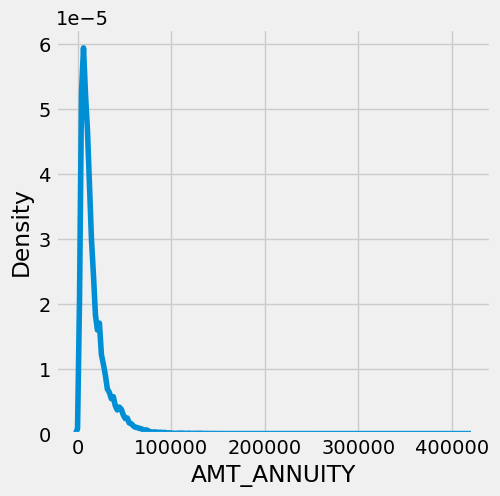

In [86]:
plt.figure(figsize=(5,5))
sns.kdeplot(prev['AMT_ANNUITY'])
plt.show()

In [87]:
prev['AMT_ANNUITY'].fillna(prev['AMT_ANNUITY'].median(),inplace=True)

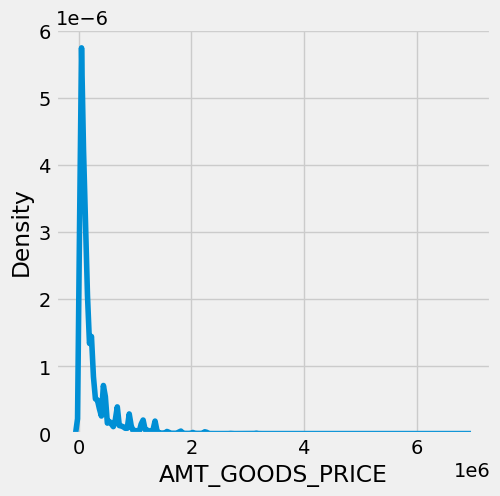

In [88]:
plt.figure(figsize=(5,5))
sns.kdeplot(prev['AMT_GOODS_PRICE'][pd.notnull(prev['AMT_GOODS_PRICE'])])
plt.show()

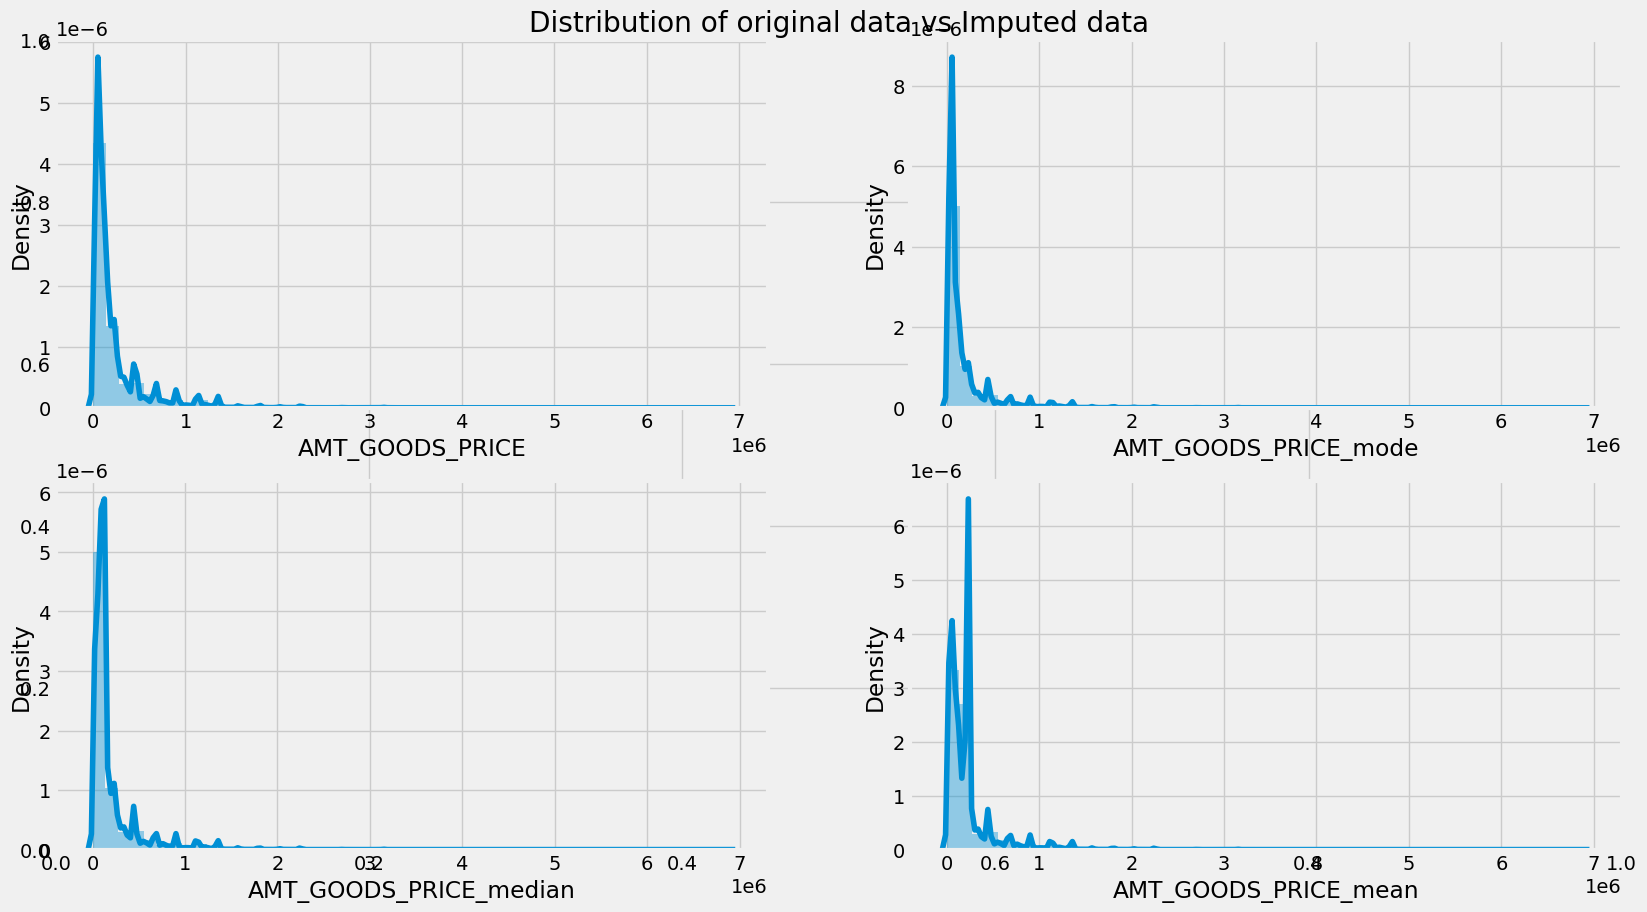

In [89]:
statsp=pd.DataFrame()
statsp['AMT_GOODS_PRICE_mode']=prev['AMT_GOODS_PRICE'].fillna(prev['AMT_GOODS_PRICE'].mode()[0])
statsp['AMT_GOODS_PRICE_median']=prev['AMT_GOODS_PRICE'].fillna(prev['AMT_GOODS_PRICE'].median())
statsp['AMT_GOODS_PRICE_mean']=prev['AMT_GOODS_PRICE'].fillna(prev['AMT_GOODS_PRICE'].mean())
cols=['AMT_GOODS_PRICE_mode','AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']
plt.figure(figsize=(18,10))
plt.title('Distribution of original data vs Imputed data')
plt.subplot(221)
sns.distplot(prev['AMT_GOODS_PRICE'][pd.notnull(prev['AMT_GOODS_PRICE'])]);
for i in enumerate(cols):
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsp[i[1]])

from the above graph, wecan clearly see that original data is a perfect match with AMT_GOODS_PRICE_mode. so we will immute values with mode for AMT_GOODS_PRICE

In [90]:
prev['AMT_GOODS_PRICE'].fillna(prev['AMT_GOODS_PRICE'].mode()[0],inplace=True)

In [91]:
prev

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION DAYS_DECISION_GROUP
0           2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                    XAP             Approved             73  Cash through the bank                XAP         Repeater                Mobile            POS               XNA             Country-wide                35          Connectivity         12.0           middle     POS mobile with interest               0-400
1           2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                    XNA             Approved            164                    XNA                XAP         Repeater                   XNA           Cash            x-sell           Contact center                -1                   XNA         36.0       low_action             Cash X-Sell: low               0-400
2           2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    XNA             Approved            301  Cash through the bank                XAP         Repeater                   XNA           Cash            x-sell  Credit and cash offices                -1                   XNA         12.0             high            Cash X-Sell: high               0-400
3           2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                    XNA             Approved            512  Cash through the bank                XAP         Repeater                   XNA           Cash            x-sell  Credit and cash offices                -1                   XNA         12.0           middle          Cash X-Sell: middle             400-800
4           1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                Repairs              Refused            781  Cash through the bank                 HC         Repeater                   XNA           Cash           walk-in  Credit and cash offices                -1                   XNA         24.0             high            Cash Street: high             400-800
...             ...         ...                ...          ...              ...         ...              ...                    ...                  ...            ...                    ...                ...              ...                   ...            ...               ...                      ...               ...                   ...          ...              ...                          ...                 ...
1670209     2300464      352015     Consumer loans    14704.290         267295.5    311400.0         267295.5                    XAP             Approved            544  Cash through the bank                XAP        Refreshed             Furniture            POS               XNA                    Stone                43             Furniture         30.0       low_normal   POS industry with interest             400-800
1670210     2357031      334635     Consumer loans     6622.020          87750.0     64291.5          87750.0                    XAP             Approved           1694  Cash through the bank                XAP              New             Furniture            POS               XNA                    Stone                43             Furniture         12.0           middle   POS industry with interest           1600-2000
1670211     2659632      249544     Consumer loans    11520.855         105237.0    102523.5         105237.0                    XAP             Approved           14

In [92]:
prev.loc[prev['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: count, dtype: int64

In [93]:
prev['CNT_PAYMENT'].fillna(0,inplace=True)

In [94]:
round(prev.isnull().sum()/prev.shape[0]*100.00,2)

SK_ID_PREV                0.00
SK_ID_CURR                0.00
NAME_CONTRACT_TYPE        0.00
AMT_ANNUITY               0.00
AMT_APPLICATION           0.00
AMT_CREDIT                0.00
AMT_GOODS_PRICE           0.00
NAME_CASH_LOAN_PURPOSE    0.00
NAME_CONTRACT_STATUS      0.00
DAYS_DECISION             0.00
NAME_PAYMENT_TYPE         0.00
CODE_REJECT_REASON        0.00
NAME_CLIENT_TYPE          0.00
NAME_GOODS_CATEGORY       0.00
NAME_PORTFOLIO            0.00
NAME_PRODUCT_TYPE         0.00
CHANNEL_TYPE              0.00
SELLERPLACE_AREA          0.00
NAME_SELLER_INDUSTRY      0.00
CNT_PAYMENT               0.00
NAME_YIELD_GROUP          0.00
PRODUCT_COMBINATION       0.02
DAYS_DECISION_GROUP       0.00
dtype: float64

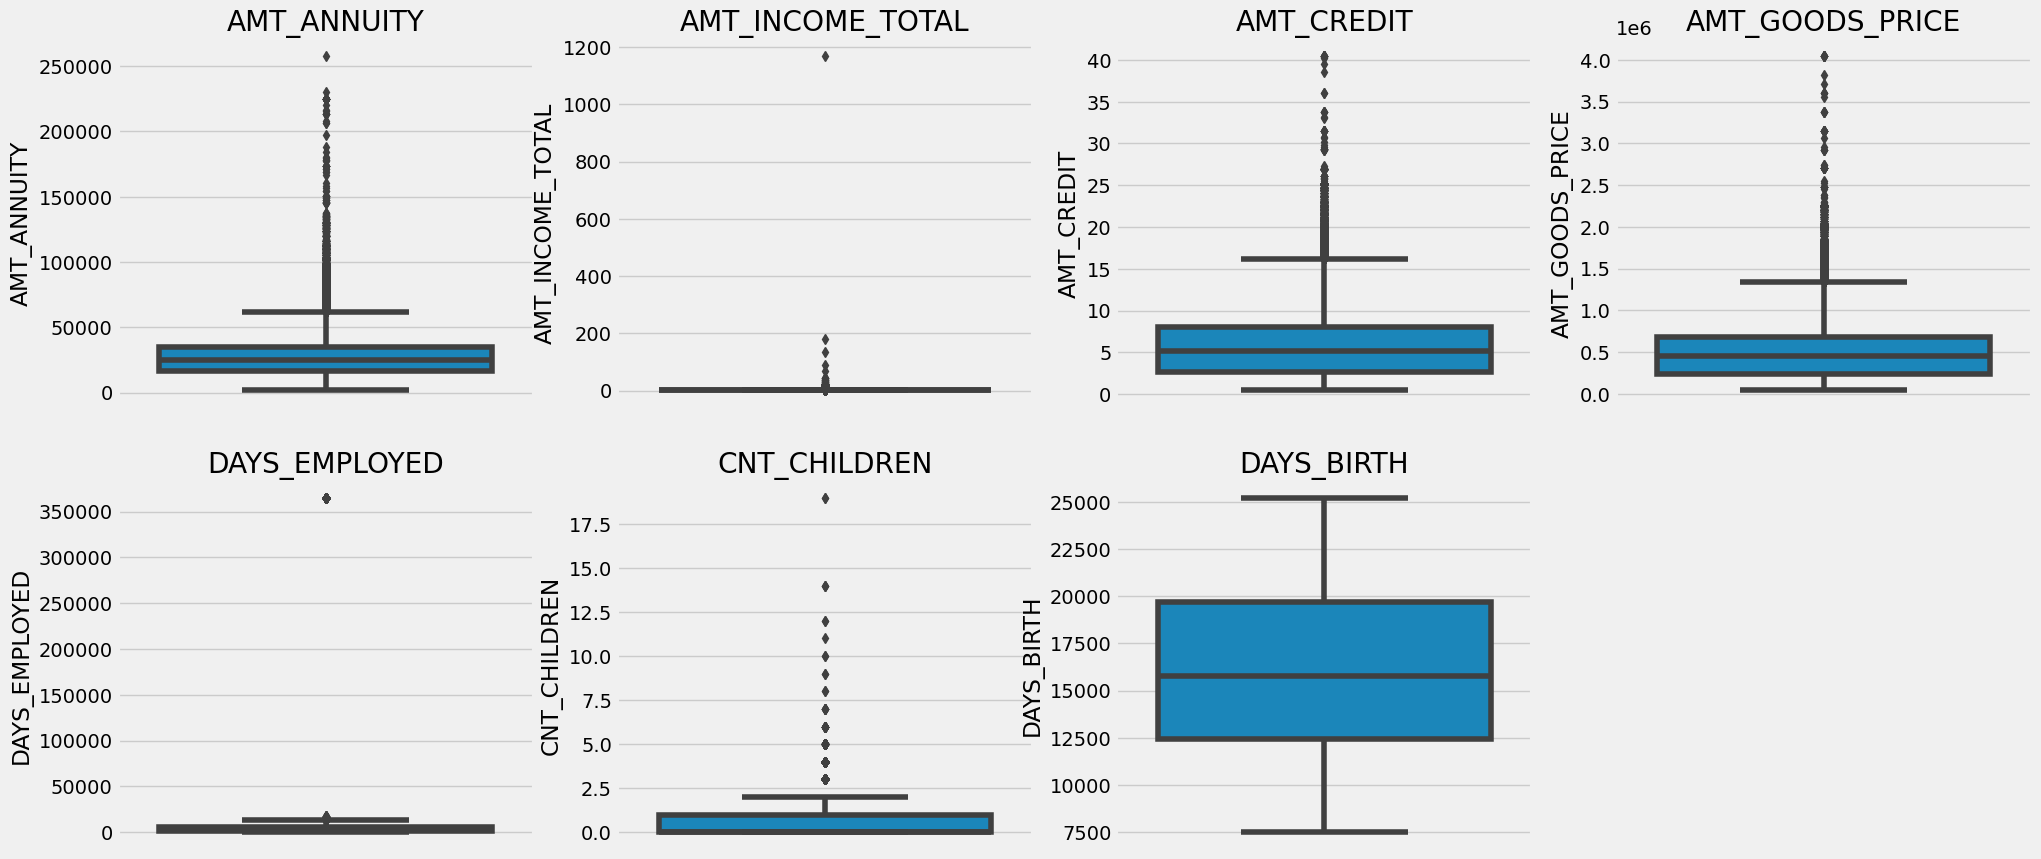

In [95]:
#finding outliers
plt.figure(figsize=(22,10))

app_outlier_col1=['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col2=['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=app[i[1]])
    plt.title(i[1])

for i in enumerate(app_outlier_col2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=app[i[1]])
    plt.title(i[1])

AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_CHILDREN' have some outliers DAYS_EMPLOYED has outlier at more than 350000 which is impossible.So, it can be a typo error. DAYS_BIRTH has no outliers, which states that data is reliable AMT_INCOME_TOTAL has outliers which states that few people income is higher than others

In [96]:
app[['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_CHILDREN','DAYS_BIRTH']].describe()

AMT_ANNUITY  AMT_INCOME_TOTAL     AMT_CREDIT  AMT_GOODS_PRICE  DAYS_EMPLOYED   CNT_CHILDREN     DAYS_BIRTH
count  307499.000000     307511.000000  307511.000000     3.072330e+05  307511.000000  307511.000000  307511.000000
mean    27108.573909          1.687979       5.990260     5.383962e+05   67724.742149       0.417052   16036.995067
std     14493.737315          2.371231       4.024908     3.694465e+05  139443.751806       0.722121    4363.988632
min      1615.500000          0.256500       0.450000     4.050000e+04       0.000000       0.000000    7489.000000
25%     16524.000000          1.125000       2.700000     2.385000e+05     933.000000       0.000000   12413.000000
50%     24903.000000          1.471500       5.135310     4.500000e+05    2219.000000       0.000000   15750.000000
75%     34596.000000          2.025000       8.086500     6.795000e+05    5707.000000       1.000000   19682.000000
max    258025.500000       1170.000000      40.500000     4.050000e+06  365243.000000      19.000000   25229.000000

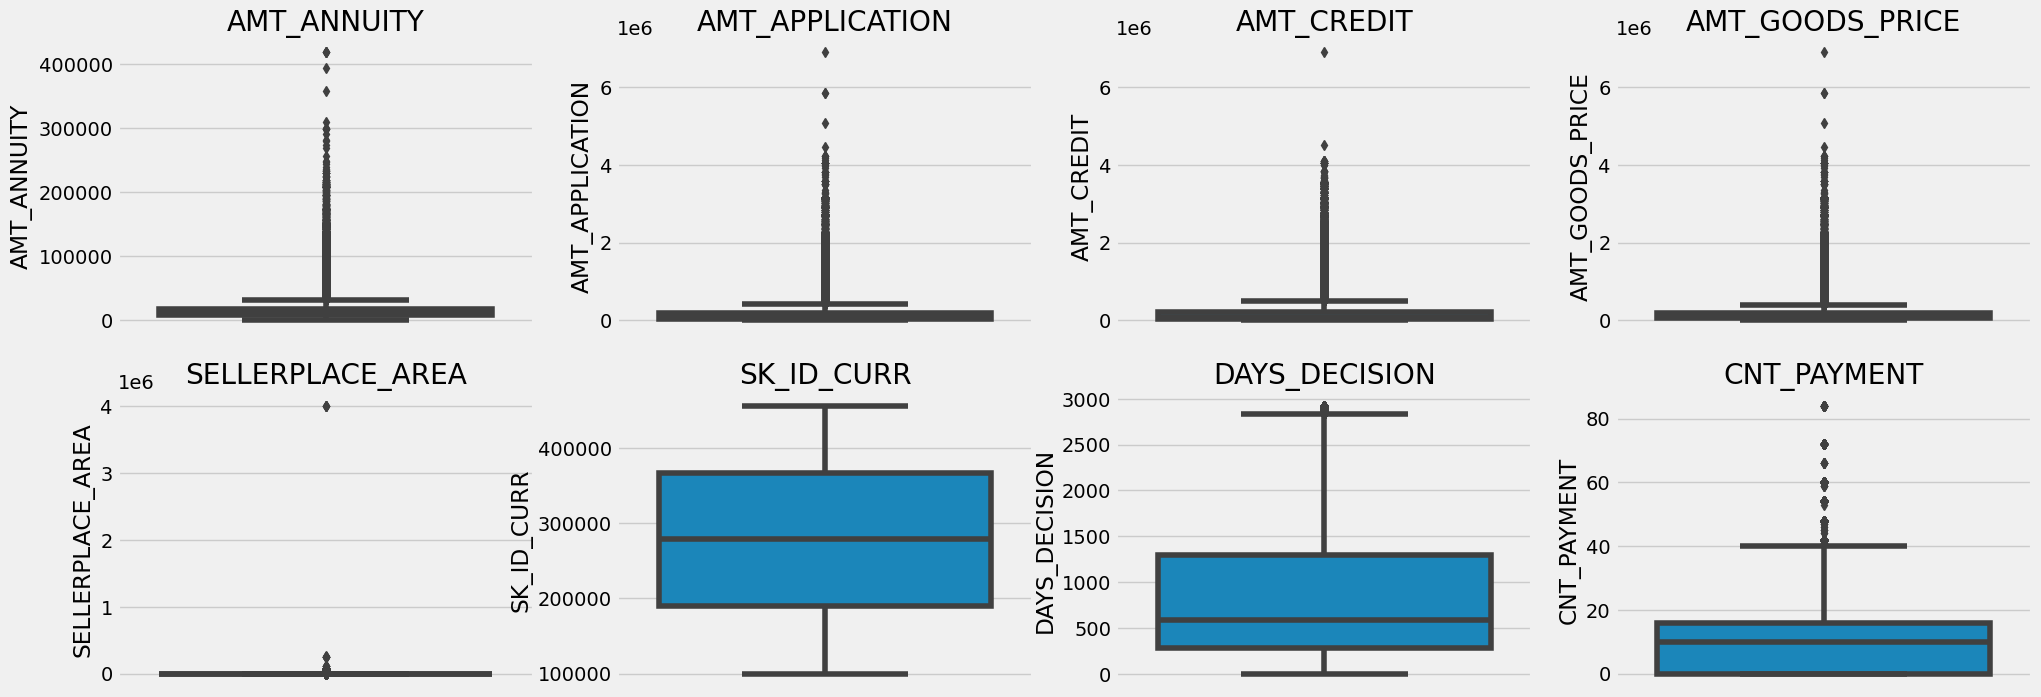

In [97]:
#finding outliers previous applicant
plt.figure(figsize=(22,8))
prev_outlier_col1=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col2=['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']

for i in enumerate(prev_outlier_col1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=prev[i[1]])
    plt.title(i[1])

for i in enumerate(prev_outlier_col2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=prev[i[1]])
    plt.title(i[1])



AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA has so many outliers SK_ID_CURR is an ID so there is no outliers

DAYS_DECISION states that outlier are only few which states that previous decisions were taken long back

*CNT_PAYMENT has few outliers


In [98]:
prev[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()

AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_DECISION
count  1.670214e+06     1.670214e+06  1.670213e+06     1.670214e+06      1.670214e+06  1.670214e+06   1.670214e+06
mean   1.490651e+04     1.752339e+05  1.961140e+05     1.856429e+05      3.139511e+02  1.247621e+01   8.806797e+02
std    1.317751e+04     2.927798e+05  3.185746e+05     2.871413e+05      7.127443e+03  1.447588e+01   7.790997e+02
min    0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00     -1.000000e+00  0.000000e+00   1.000000e+00
25%    7.547096e+03     1.872000e+04  2.416050e+04     4.500000e+04     -1.000000e+00  0.000000e+00   2.800000e+02
50%    1.125000e+04     7.104600e+04  8.054100e+04     7.105050e+04      3.000000e+00  1.000000e+01   5.810000e+02
75%    1.682403e+04     1.803600e+05  2.164185e+05     1.804050e+05      8.200000e+01  1.600000e+01   1.300000e+03
max    4.180581e+05     6.905160e+06  6.905160e+06     6.905160e+06      4.000000e+06  8.400000e+01   2.922000e+03

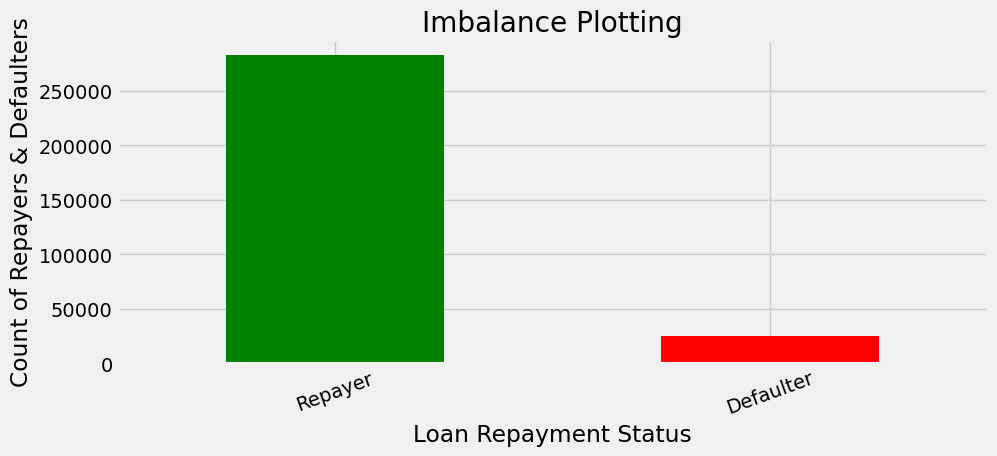

In [99]:
#ANALYSIS
#IMABALANCE ANALYSIS
imbalance=app['TARGET'].value_counts().reset_index()
plt.figure(figsize=(10,4))
app["TARGET"].value_counts().plot(kind="bar",color=['g','r'])
plt.xticks([0, 1], ['Repayer','Defaulter'],rotation=20)
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

In [100]:
imbalance1=app['TARGET'].value_counts()
count_0=imbalance1.iloc[0]
count_1=imbalance1.iloc[1]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Ratios of imbalance in relative with respect to Repayer and Defaulter datas is %.2f : 1 (approx)'%(count_0/count_1))

Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 91.93 and 8.07
Ratios of imbalance in relative with respect to Repayer and Defaulter datas is 11.39 : 1 (approx)


***function for plotting repetitive countplots in bivariate categorical analysis***

In [ ]:
def bivariate_bar(x,y,df,hue,figsize):

plt.figure(figsize = figsize)
sns.barplot(x=x,
              y=y,
              data=df, 
              hue=hue, 
              palette =['g','r'])     

# Defining aesthetics of Labels and Title of the plot using style dictionaries
plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
plt.xticks(rotation=90, ha='right')
plt.legend(labels = ['Repayer','Defaulter'])
plt.show()


***function for plotting repetitive rel plots in bivaritae numerical analysis on applicationDF***

In [ ]:
def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):

plt.figure(figsize=figsize)
sns.relplot(x=x, 
            y=y, 
            data=app, 
            hue="TARGET",
            kind=kind,
            palette = ['g','r'],
            legend = False)
plt.legend(['Repayer','Defaulter'])
plt.xticks(rotation=90, ha='right')
plt.show()

***function for plotting repetitive countplots in univariate categorical analysis on the merged df***

def univariate_merged(col,df,hue,palette,ylog,figsize): plt.figure(figsize=figsize) ax=sns.countplot(x=col, data=df, hue= hue, palette= palette, order=df[col].value_counts().index)

In [ ]:
def univariate_merged(col,df,hue,palette,ylog,figsize): plt.figure(figsize=figsize) ax=sns.countplot(x=col, data=df, hue= hue, palette= palette, order=df[col].value_counts().index)

if ylog:
    plt.yscale('log')
    plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
else:
    plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
plt.legend(loc = "upper right")
plt.xticks(rotation=90, ha='right')

plt.show()


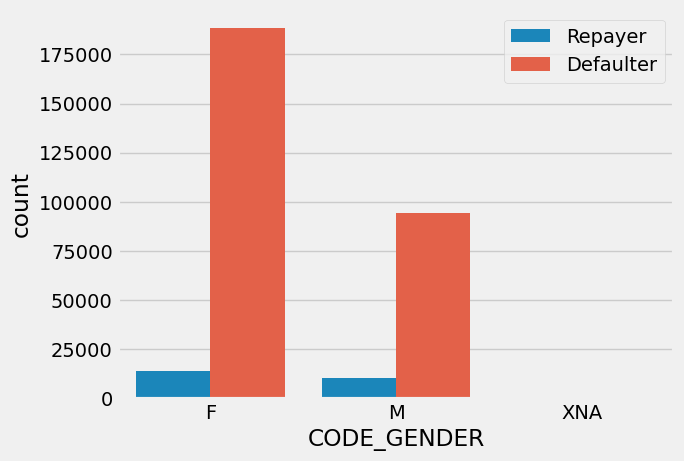

In [104]:
# type of Gender on loan repayment status
#univariate_categorical('CODE_GENDER')
app['TARGET'] = app['TARGET'].astype(str)
sns.countplot(x='CODE_GENDER',data=app,hue='TARGET')
plt.legend(['Repayer','Defaulter'])

In [105]:
def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = app[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})
    app['TARGET'] = app['TARGET'].astype(int)   
    # Calculate the percentage of target=1 per category value
    cat_perc = app[[feature, 'TARGET']].groupby([feature],as_index=False).mean(numeric_only=True)
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
    app['TARGET'] = app['TARGET'].astype(str) 
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=app,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['r','g'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Defaulter','Repayer'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

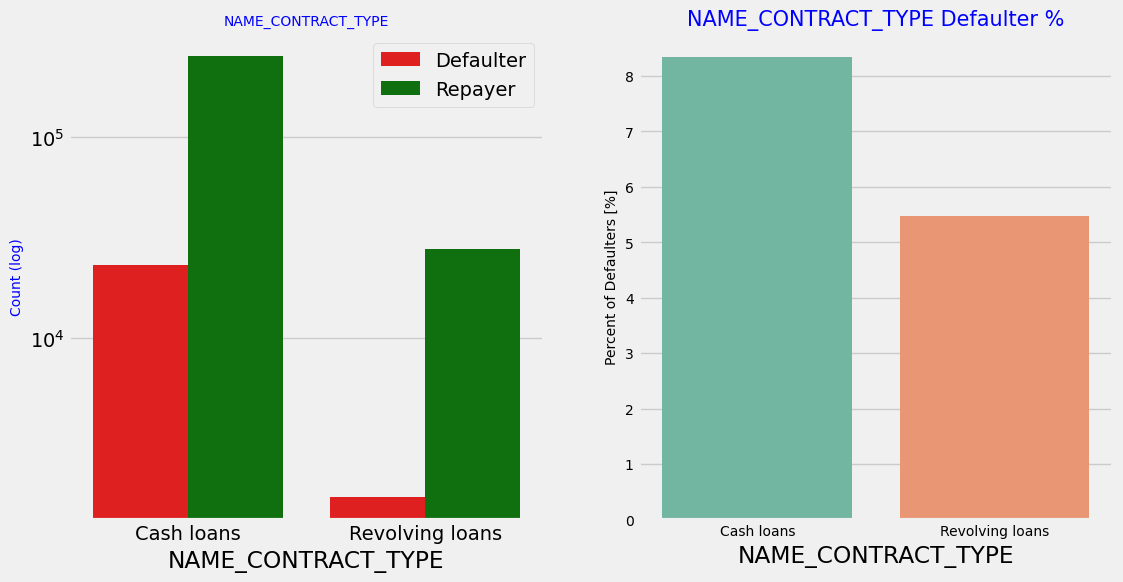

In [106]:
univariate_categorical('NAME_CONTRACT_TYPE',True)

Revolving loans are less compared to the cash loans and many revolving loans were not paid

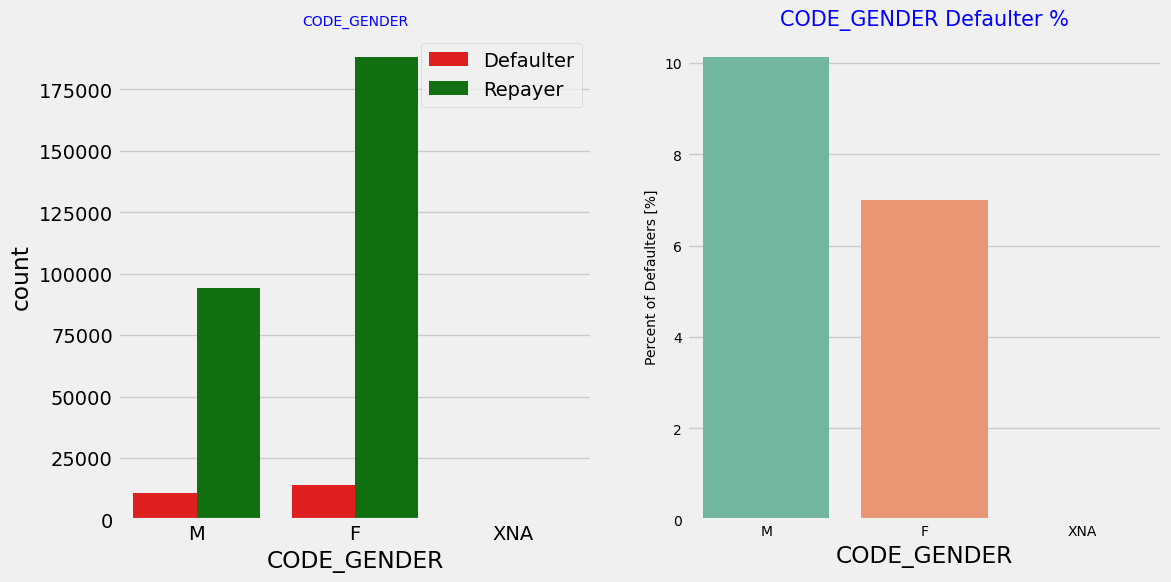

In [107]:
univariate_categorical('CODE_GENDER')

The number of female clients are higher than the number of male clients. Based on the above graph, males have a higher chance of not returning their loans in comparision with female clients.

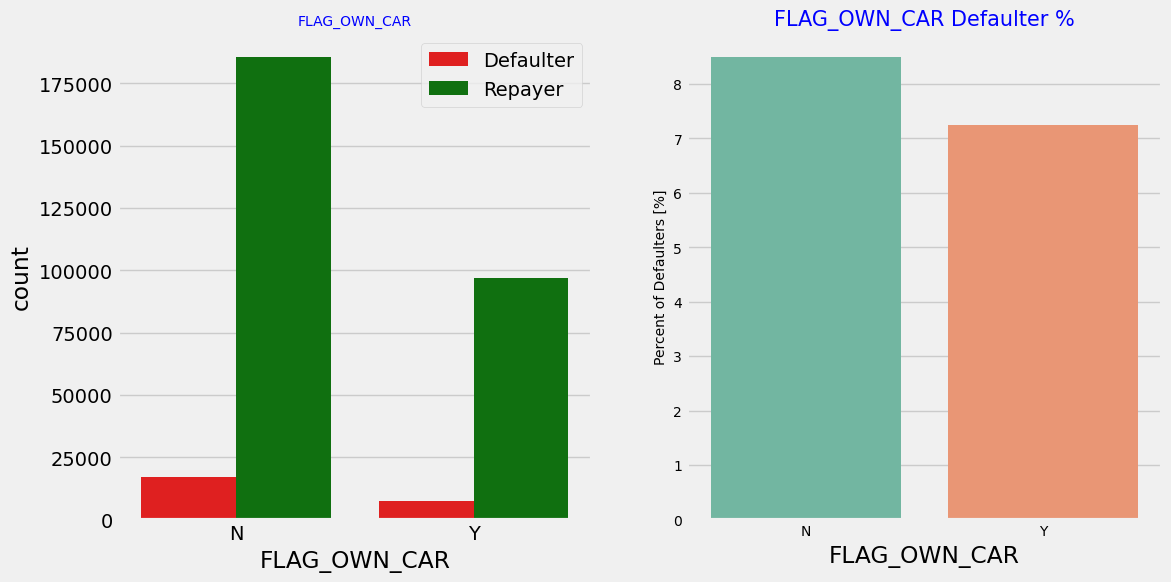

In [108]:
univariate_categorical('FLAG_OWN_CAR')

Almost half clients have car and others have no car. percentage graph states that loan repayment has no relation with owning car as the percentage of defaulters was almost equal.

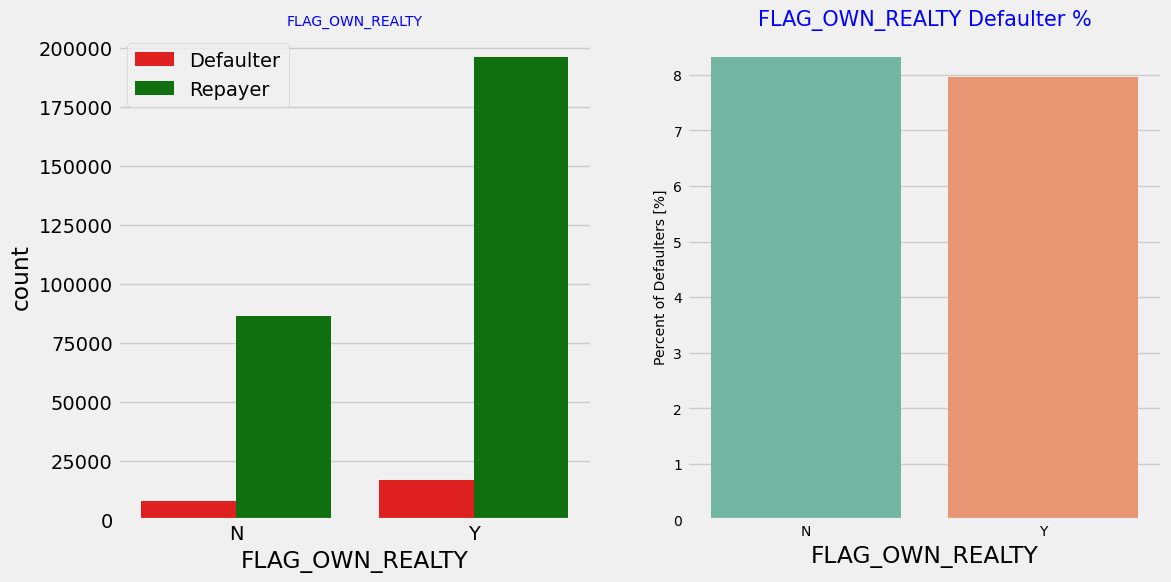

In [109]:
univariate_categorical('FLAG_OWN_REALTY')

The clients who own real estate are more than double of the ones that don't own. But the defaulting rate of both categories are around the same (~8%). Thus there is no correlation between owning a reality and defaulting the loan

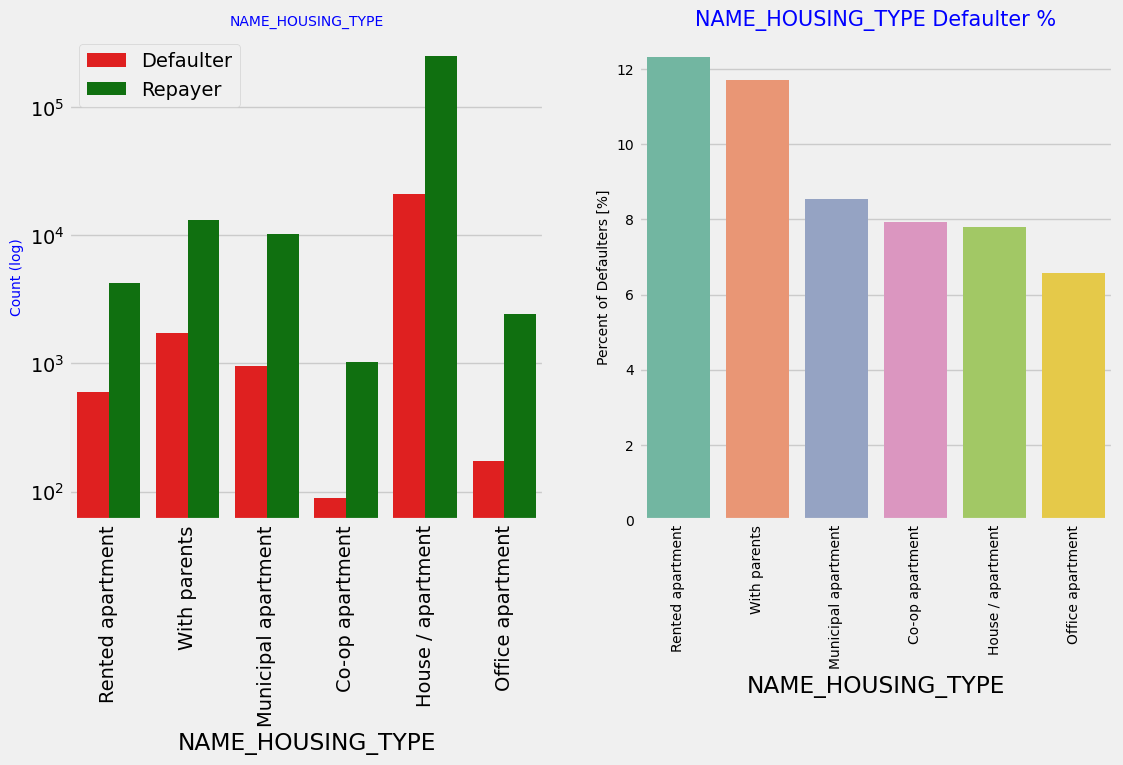

In [110]:
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

Majority of people live in House/apartment and their percentage of Defaulters is around 8% People living in office apartments have lowest default rate whereas people living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting

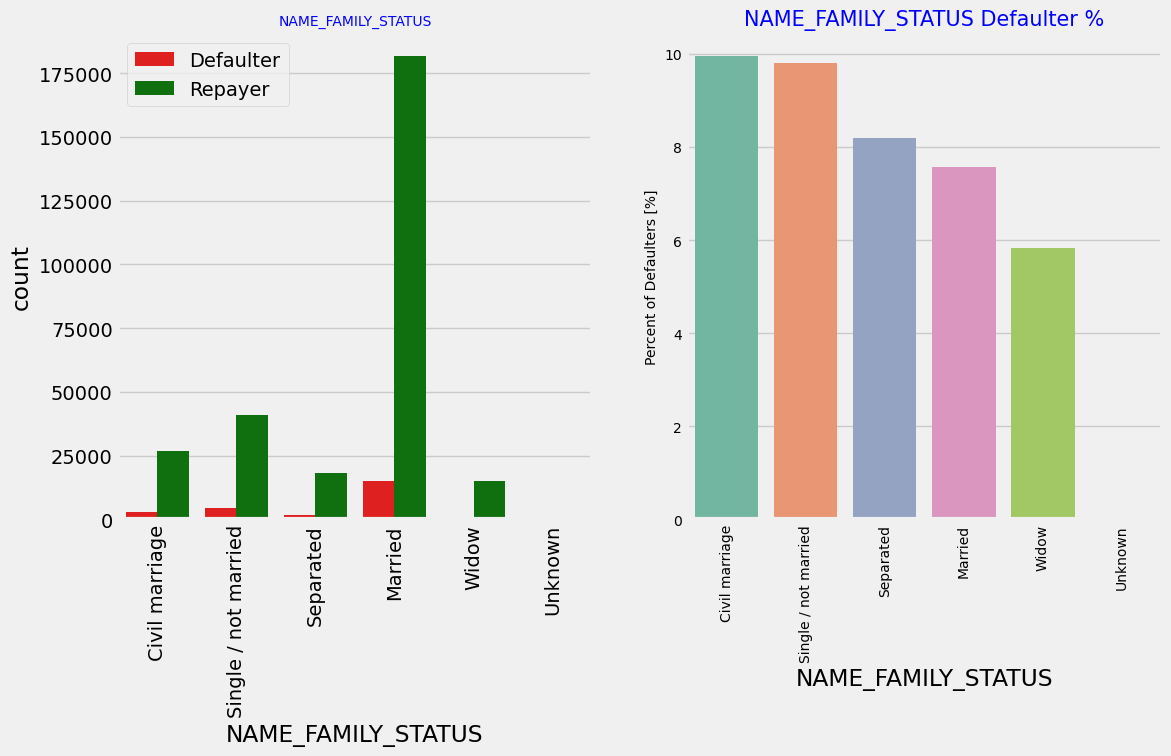

In [111]:
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

Most loans were taken by married clients and then followed by Single/not married and then civil marriage. Civil marriage has the highest percent of defaulters (10%) whereas Widow was the lowest (exception being Unknown).

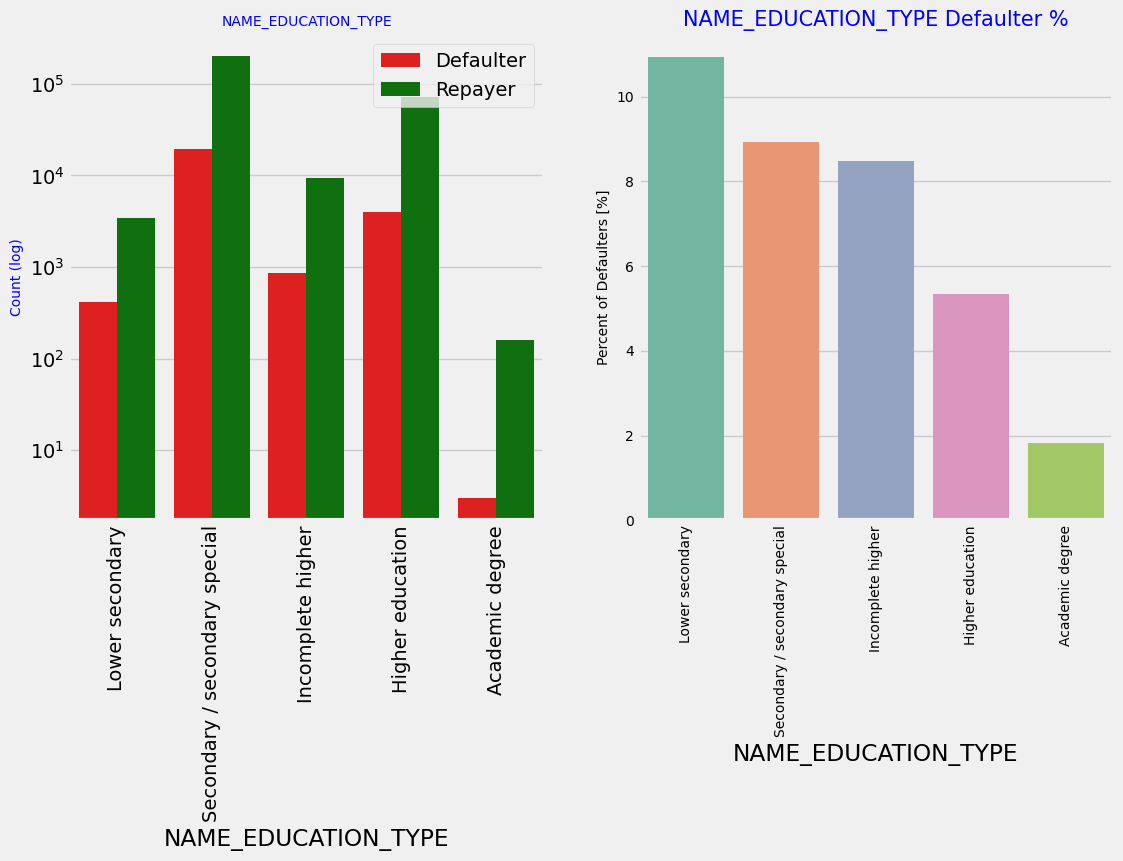

In [112]:
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree. The Lower secondary clients are few but have the largest rate of not returning the loan (11%) whereas Academic degree clients have less than 2% defaulting rate

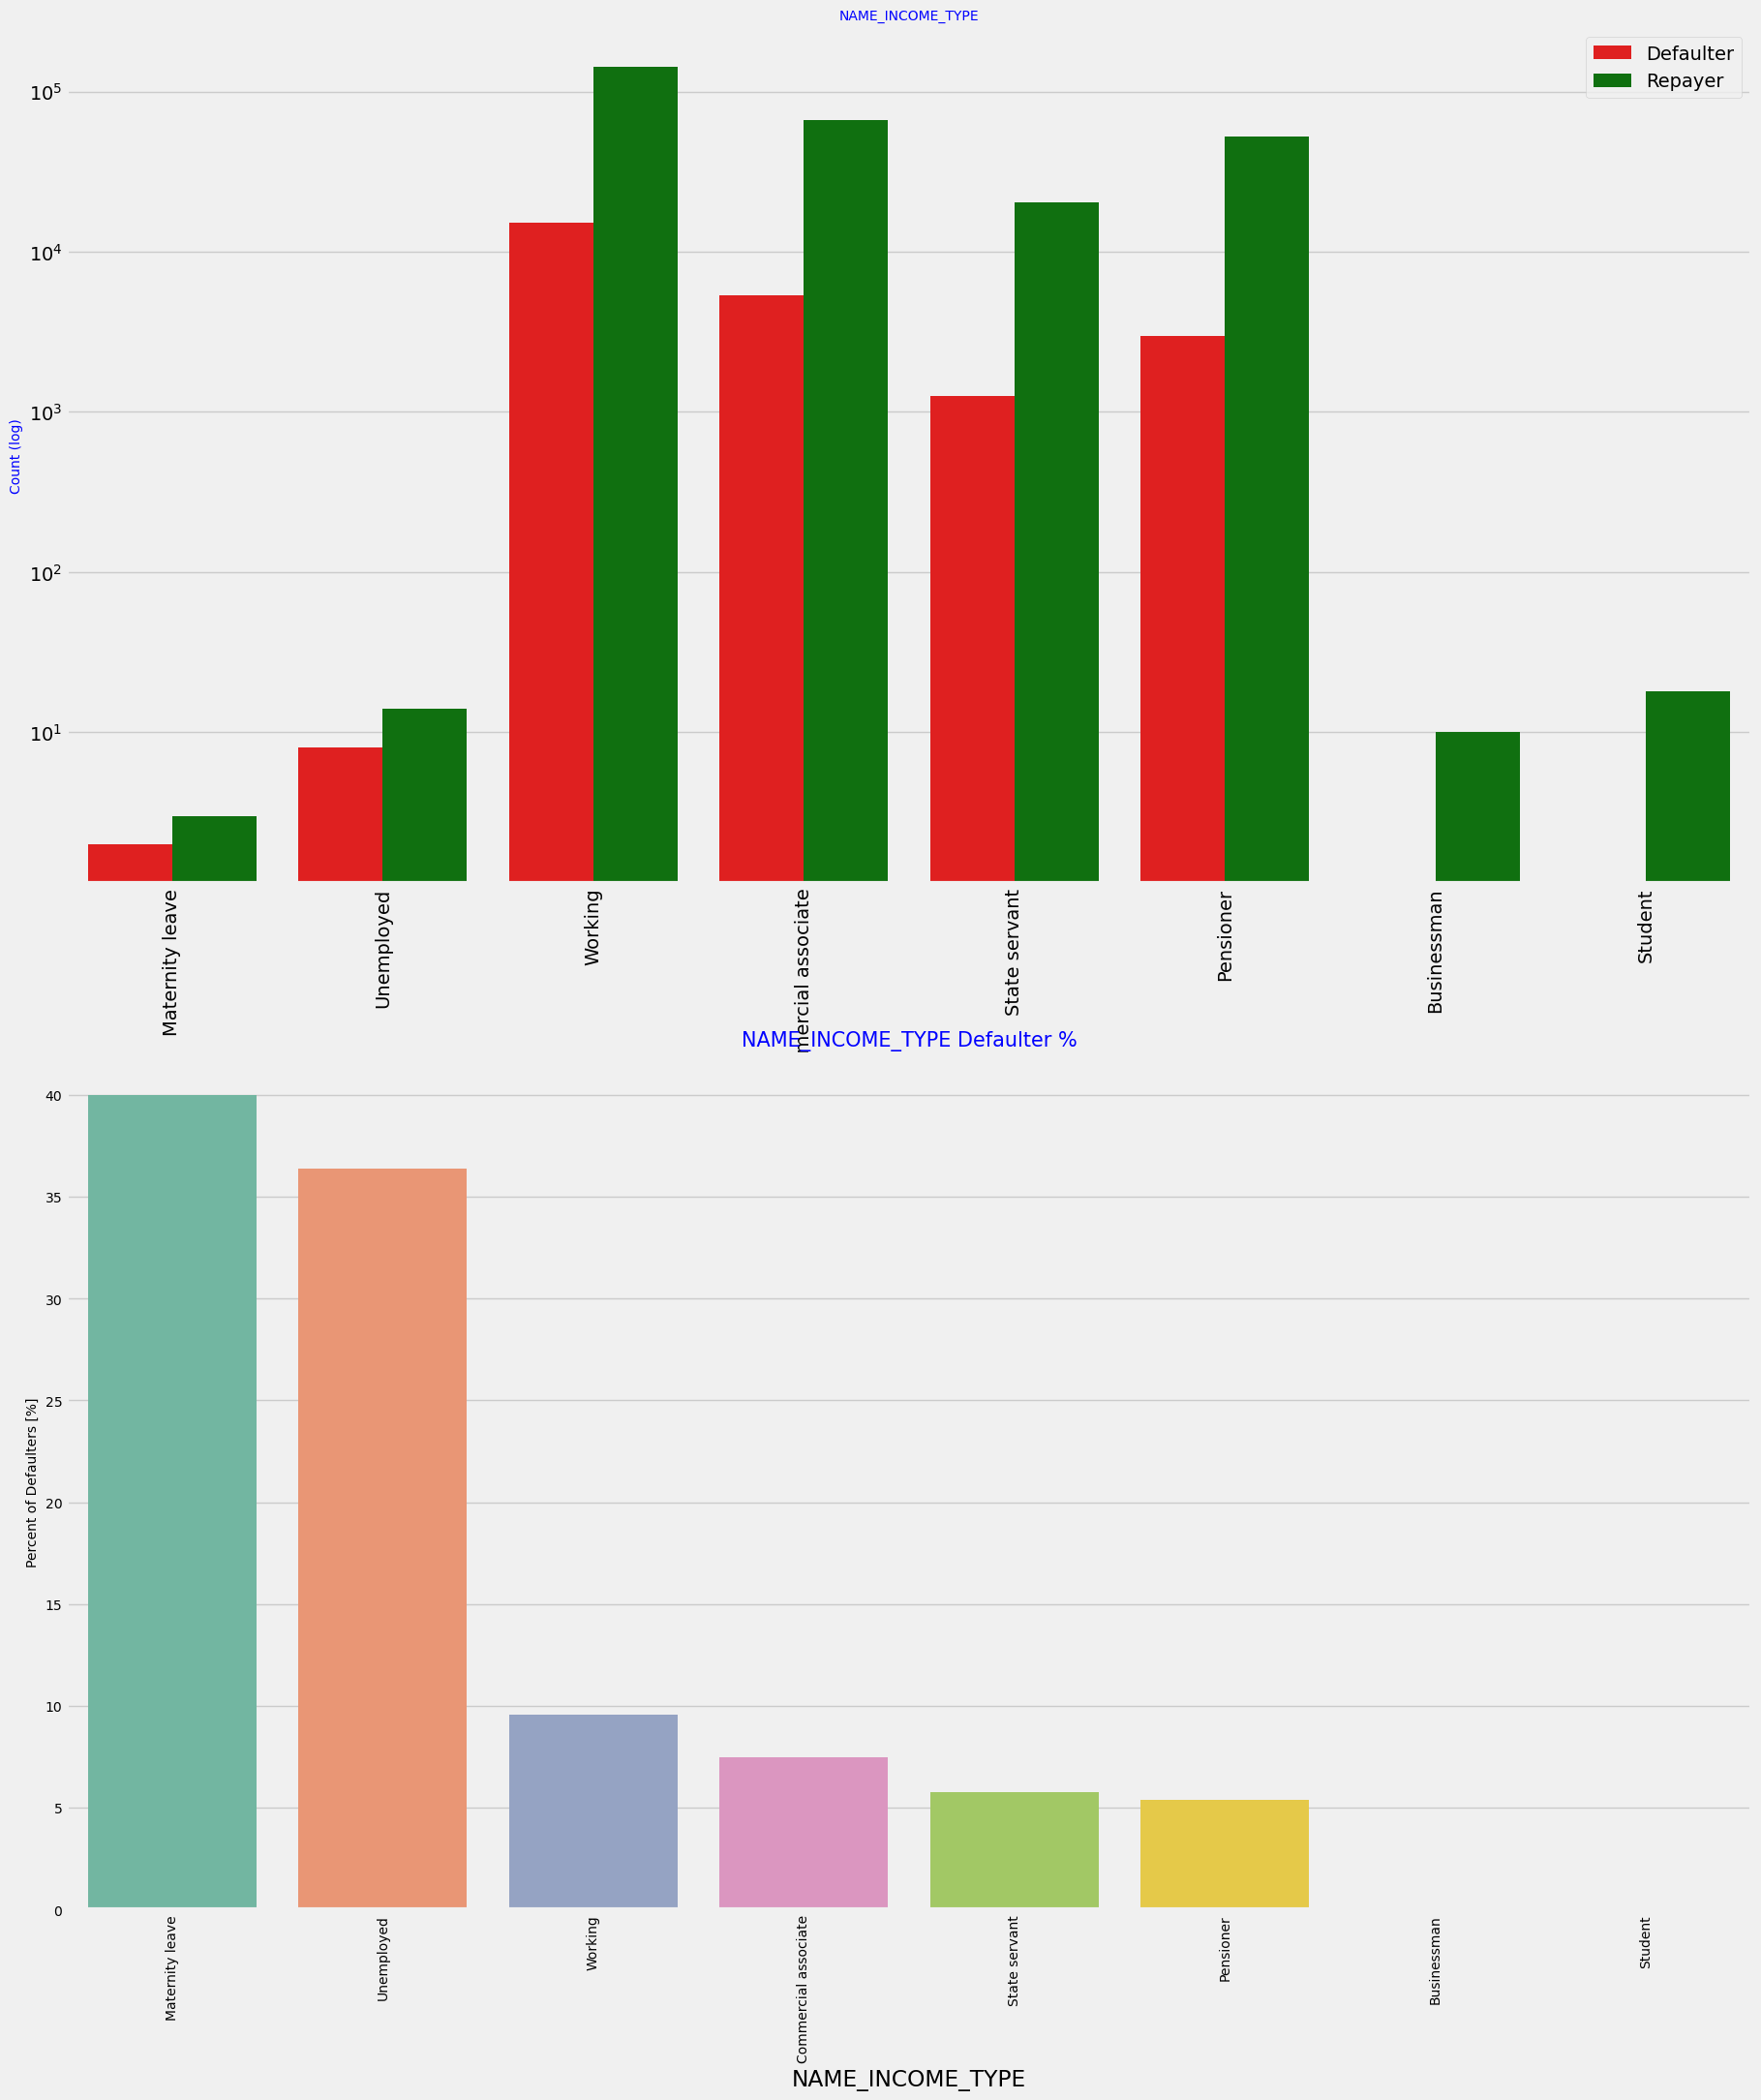

In [113]:
univariate_categorical("NAME_INCOME_TYPE",True,True,False)

Most of the loan applicants have income type as Working, followed by Commercial associate, Pensioner and State servant. The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans. Student and Businessmenapplicants are less in numbers but there are no defaulteers. Thus these two category are safest for providing loan.

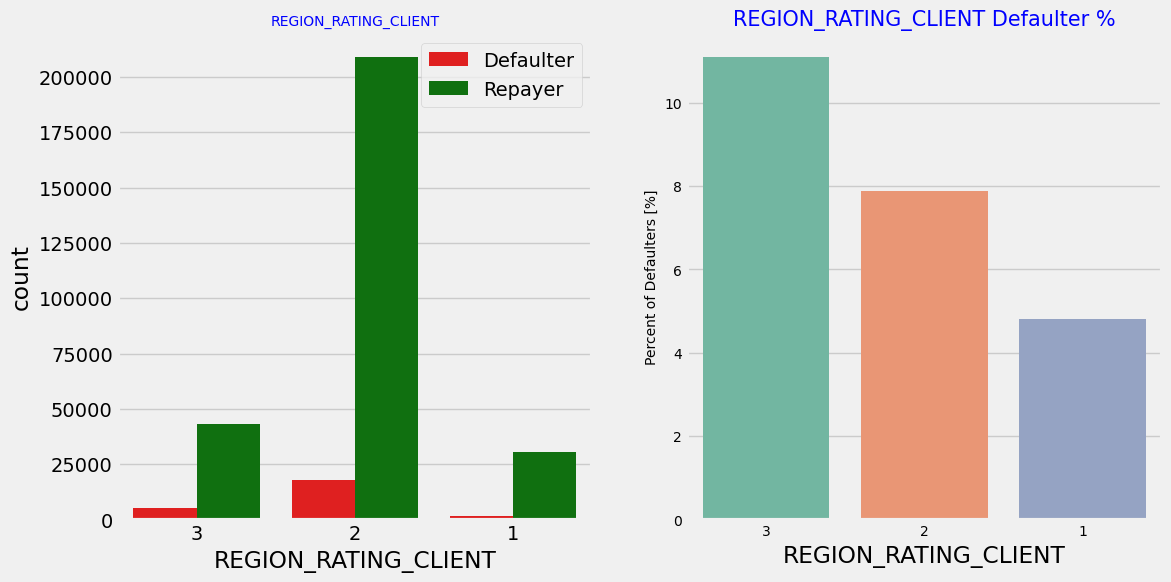

In [114]:
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

Loan Applications are from three different places, Region_Rating_2 has more number of clients then followed by Region_Rating_3 and Region_Rating_1. Region_Rating_3 has more than 11% of defaulters. Region_Rating_1 has very less applicants and defaulter are around 5%

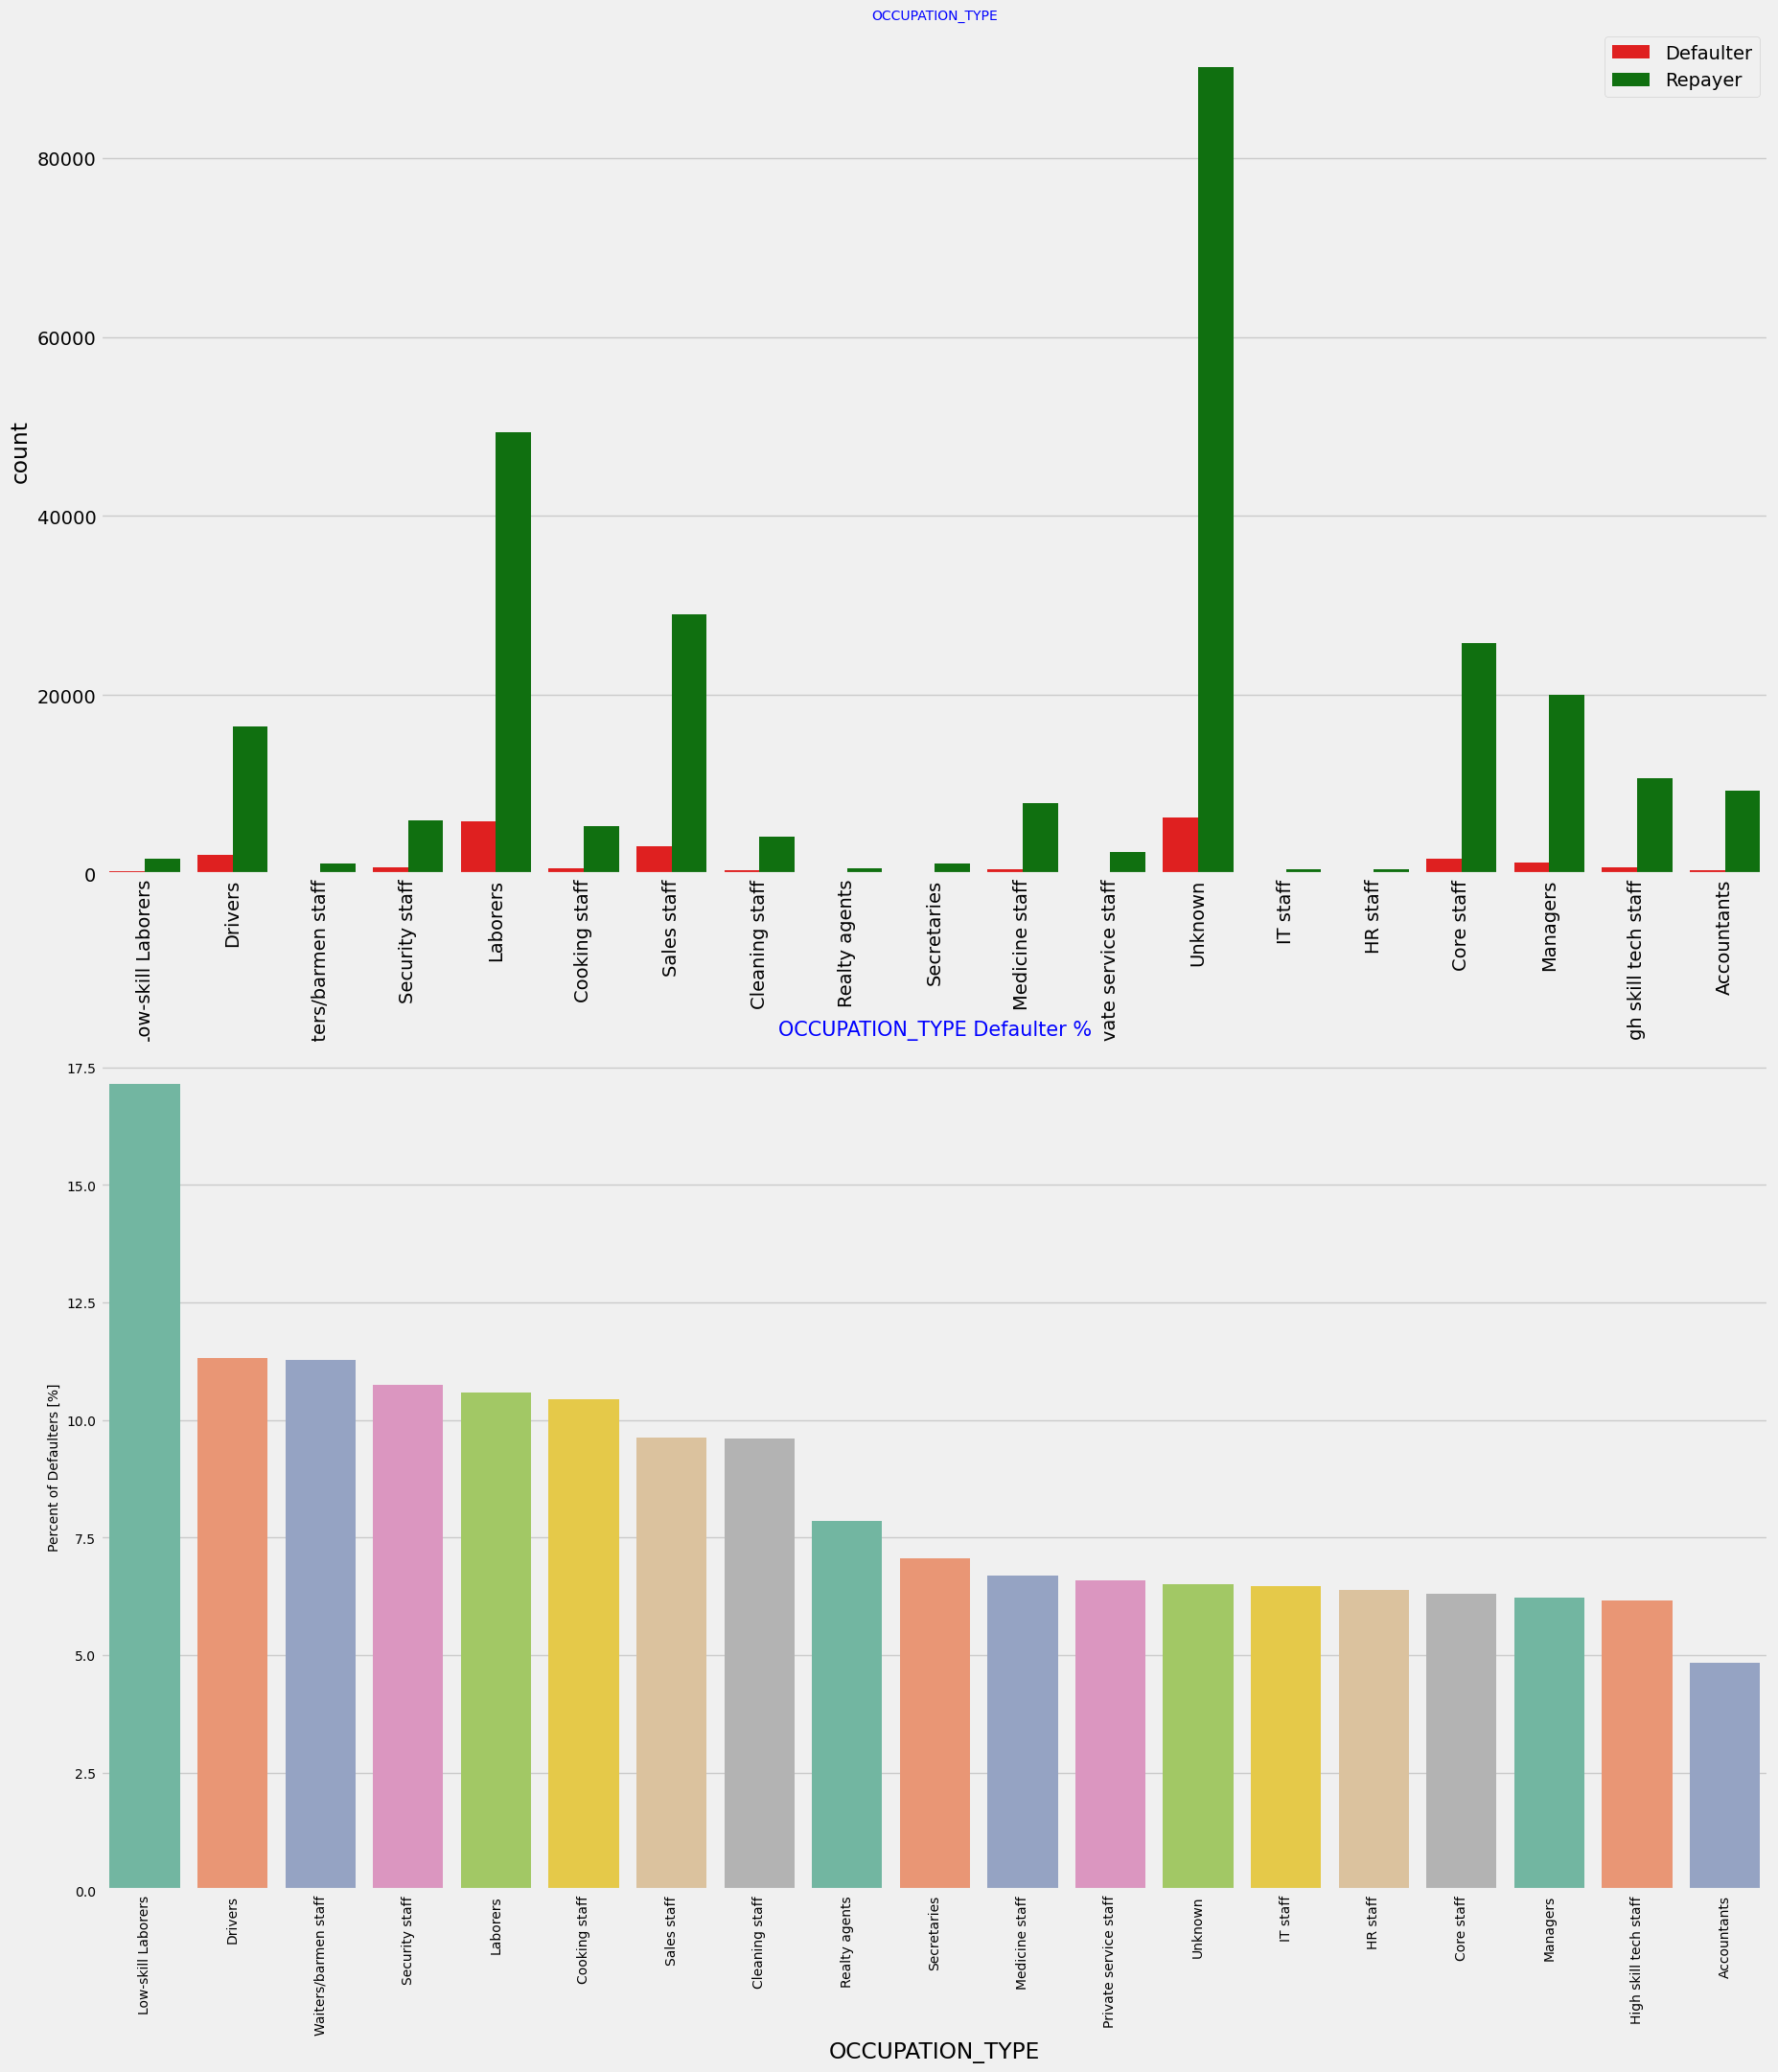

In [115]:
univariate_categorical("OCCUPATION_TYPE",False,True,False)

Most of the loan applicants are Unknown, Laborers, followed by Sales staff. IT staff and realty agents take the lowest amount of loans. The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff. Accountants applicants are very less but their percentage of defaulters are less than 5%.

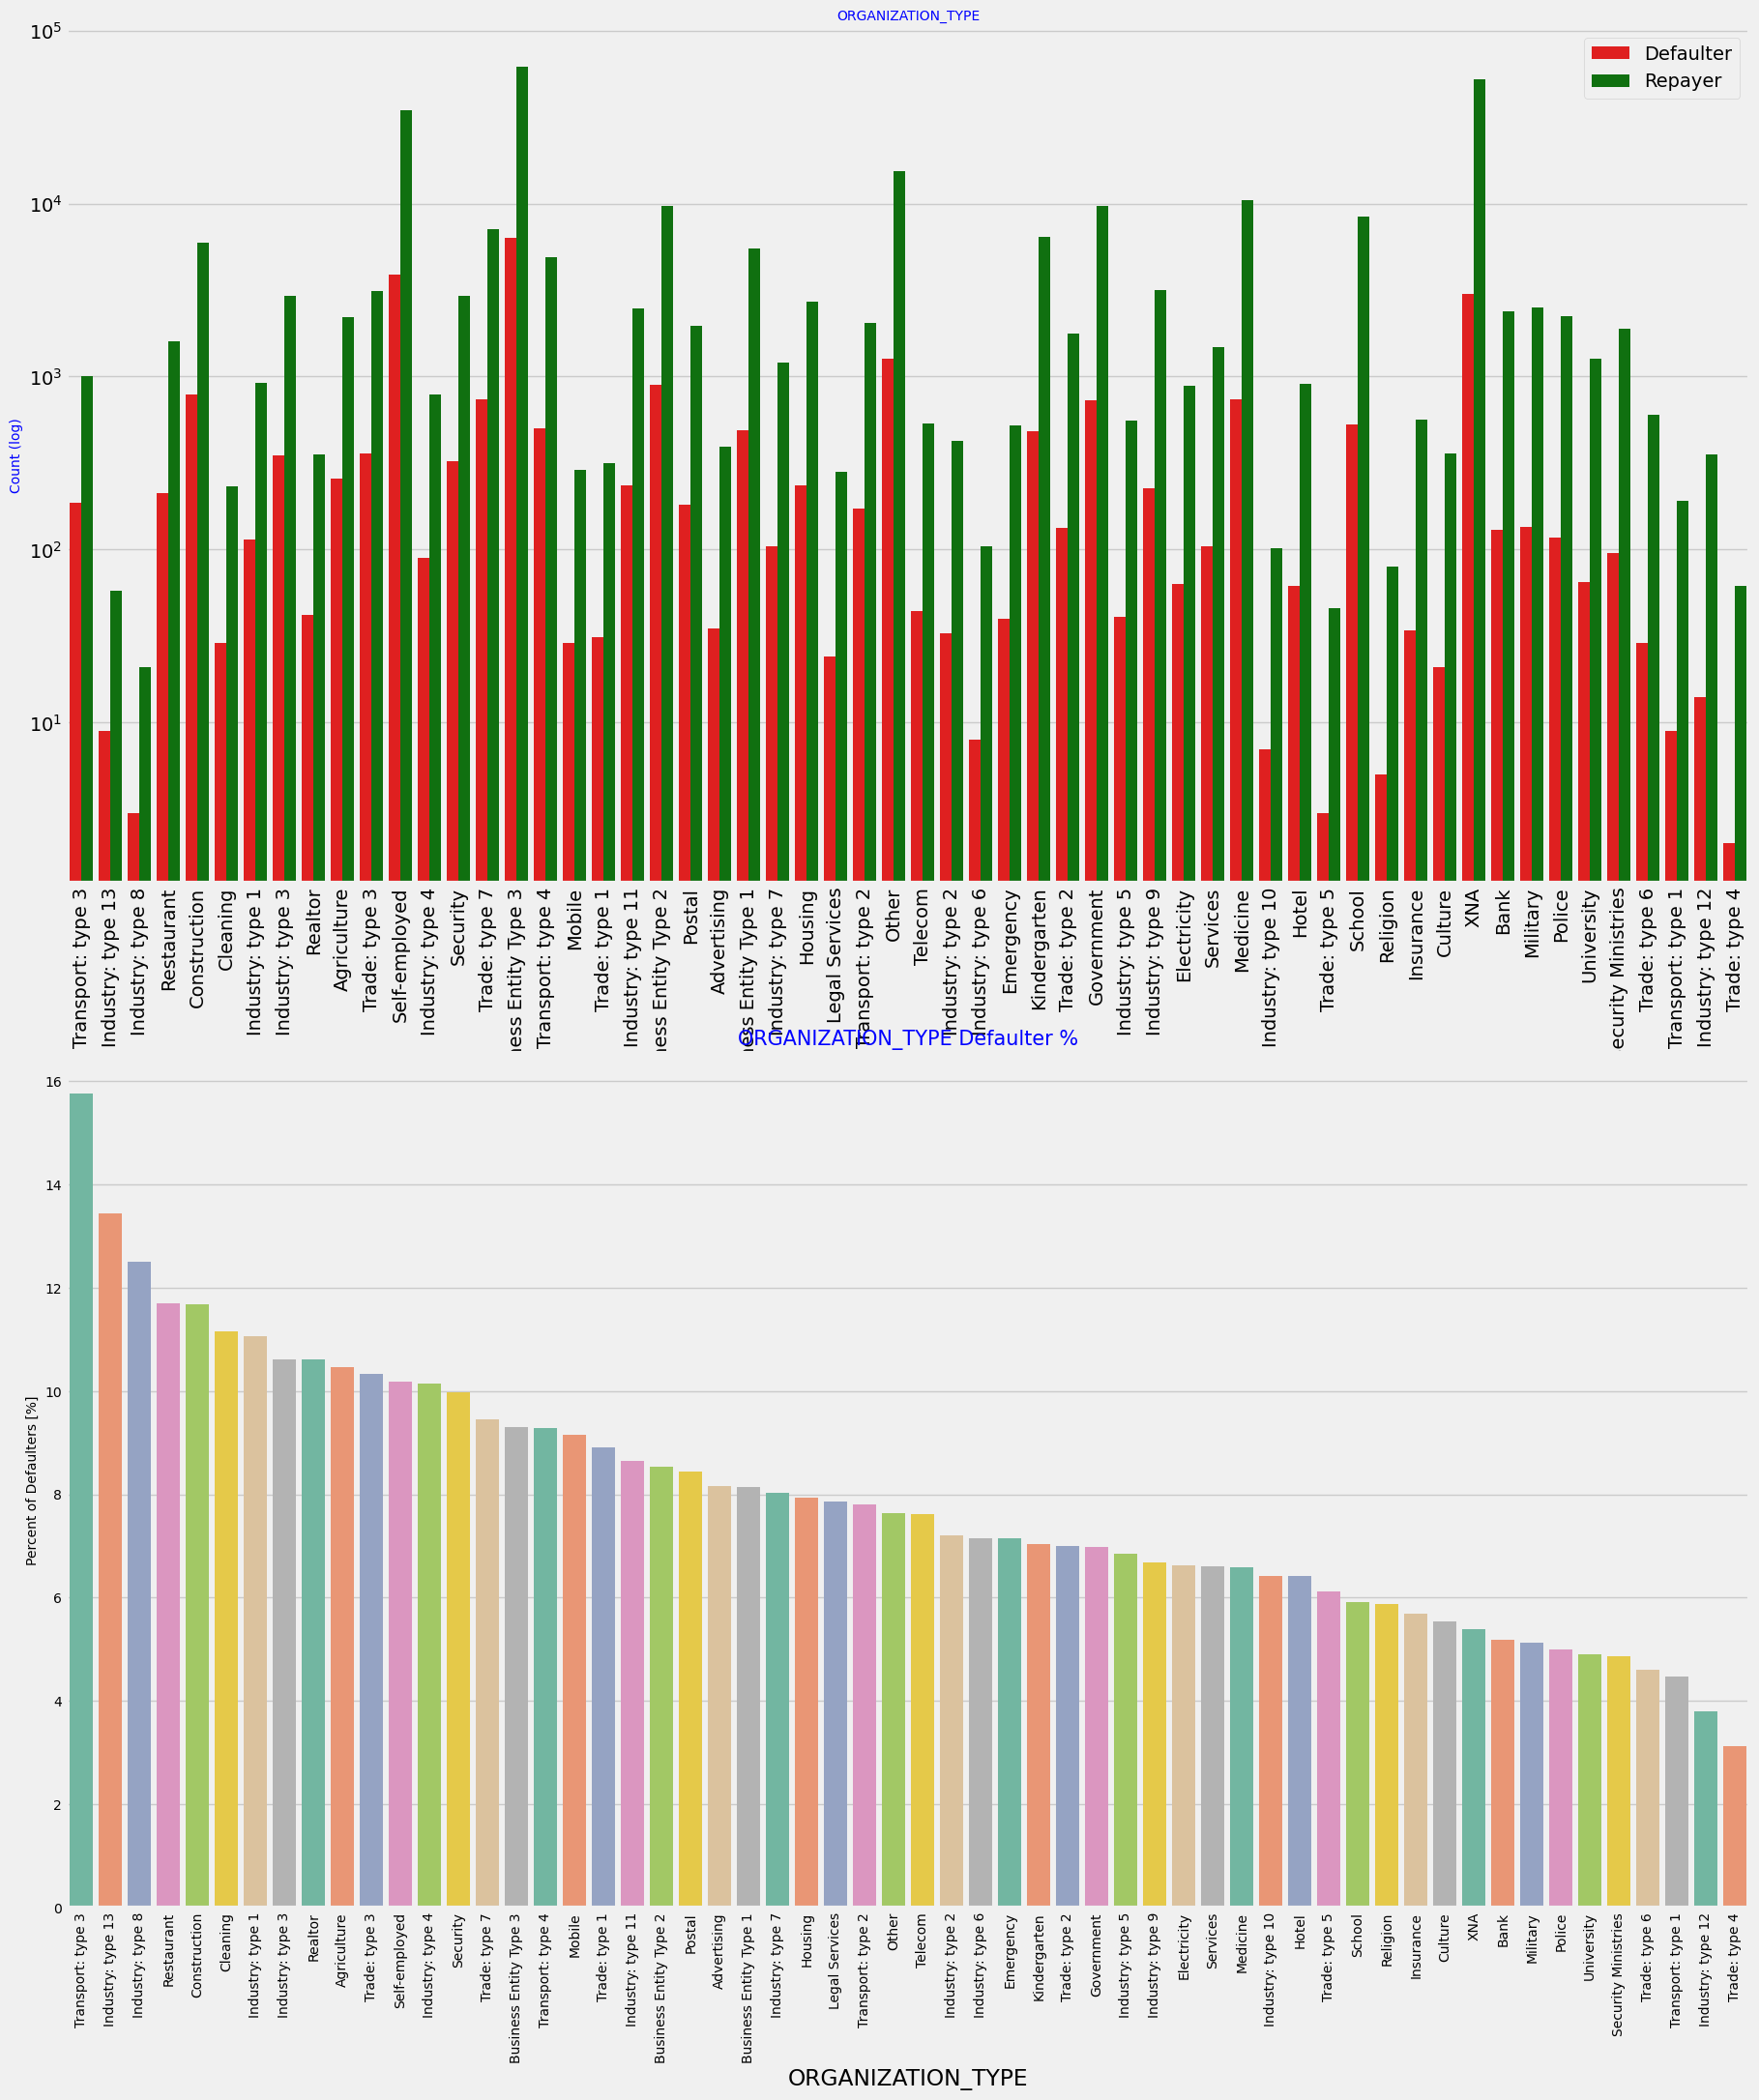

In [116]:
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

Trade type 4,5 and industry type8 is safe to provide loan as % of defaulters is less than 5%

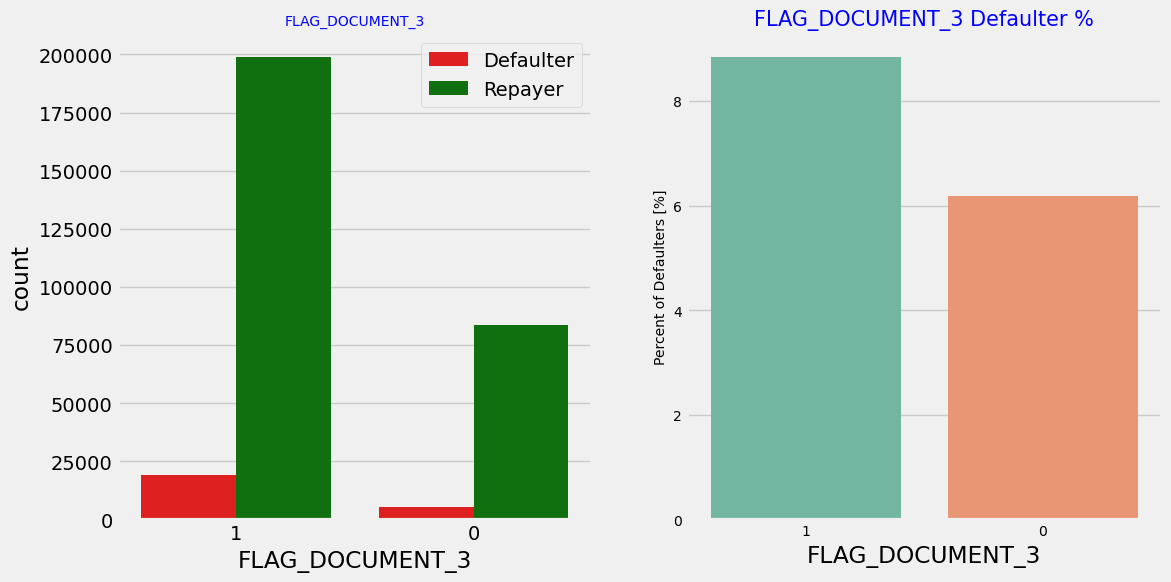

In [117]:
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)

Flag_Document was subbmitted by few clients but their percentage of defaulter is almost equal therefore this has no correlation

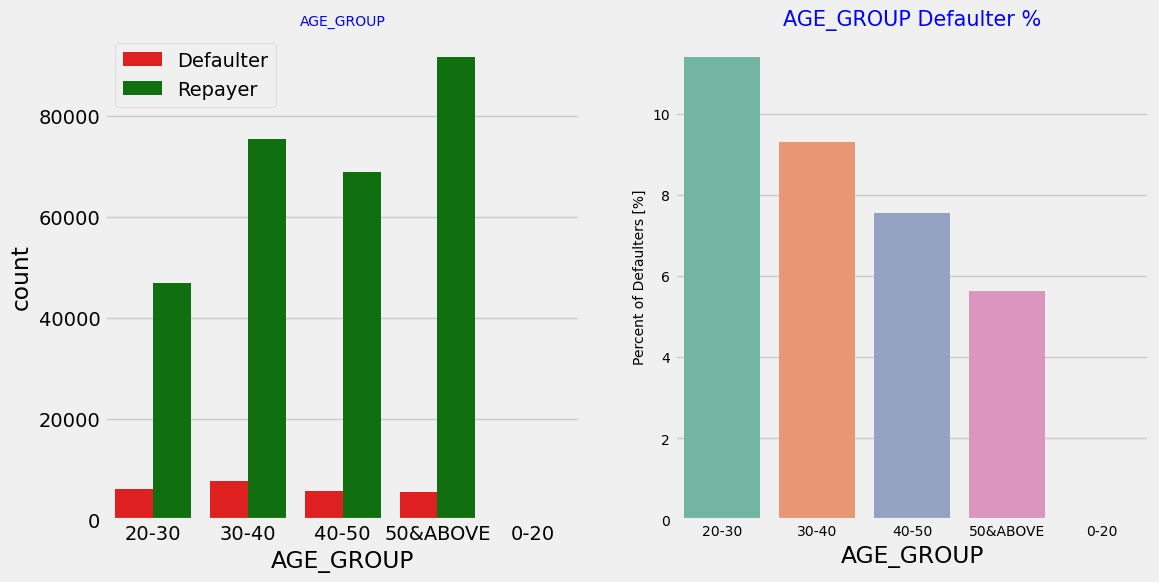

In [118]:
univariate_categorical("AGE_GROUP",False,False,True)

Clients with age between 20-40 have high percentage of defaulters. Age above 50 had low defaulters

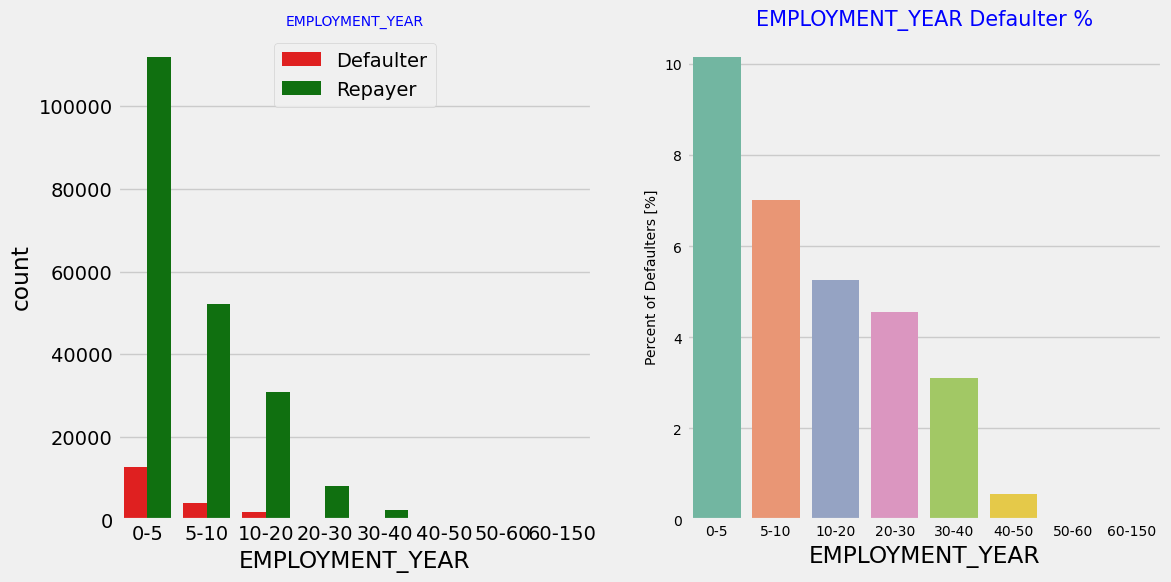

In [119]:
univariate_categorical("EMPLOYMENT_YEAR",False,False,True)

Applicants from 0-5 years employing clients have high probability of defaulting whereas people working for more than 30years have very low defaulting % . Clients with more than 30 years are safe for providing loan

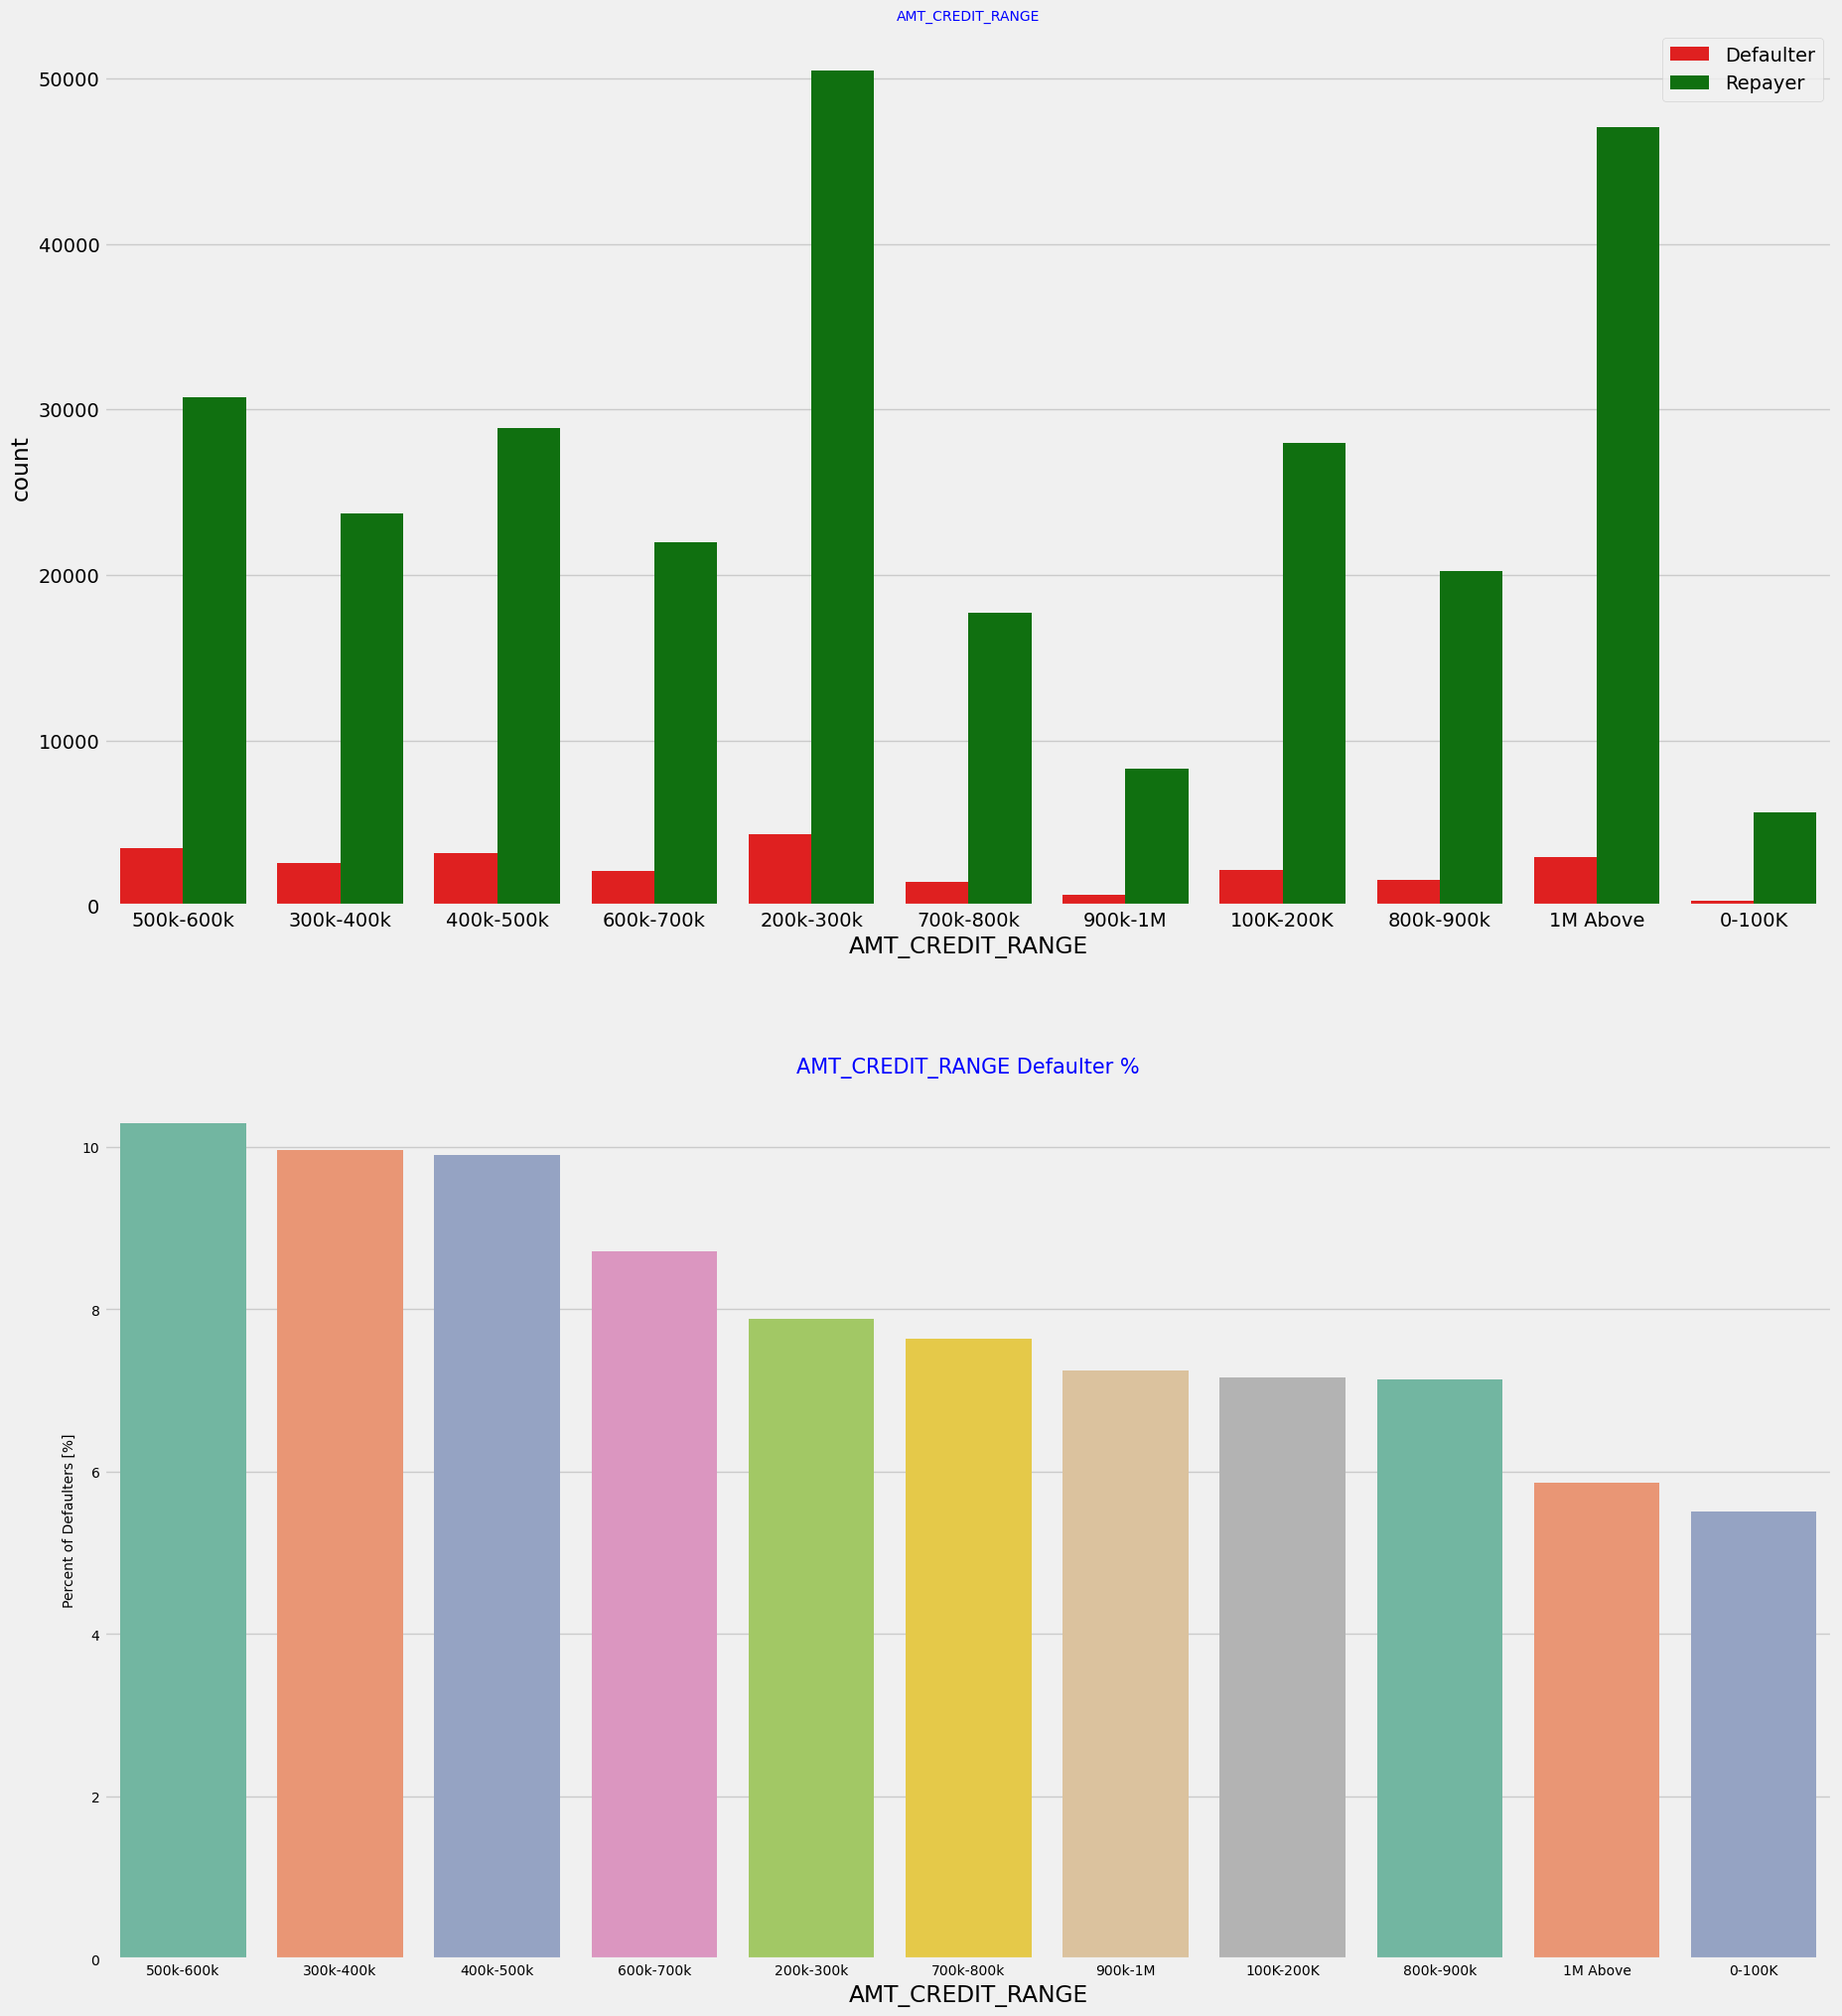

In [120]:
univariate_categorical("AMT_CREDIT_RANGE",False,False,False)

People who get loan amount of 300-600k tend to default more than others

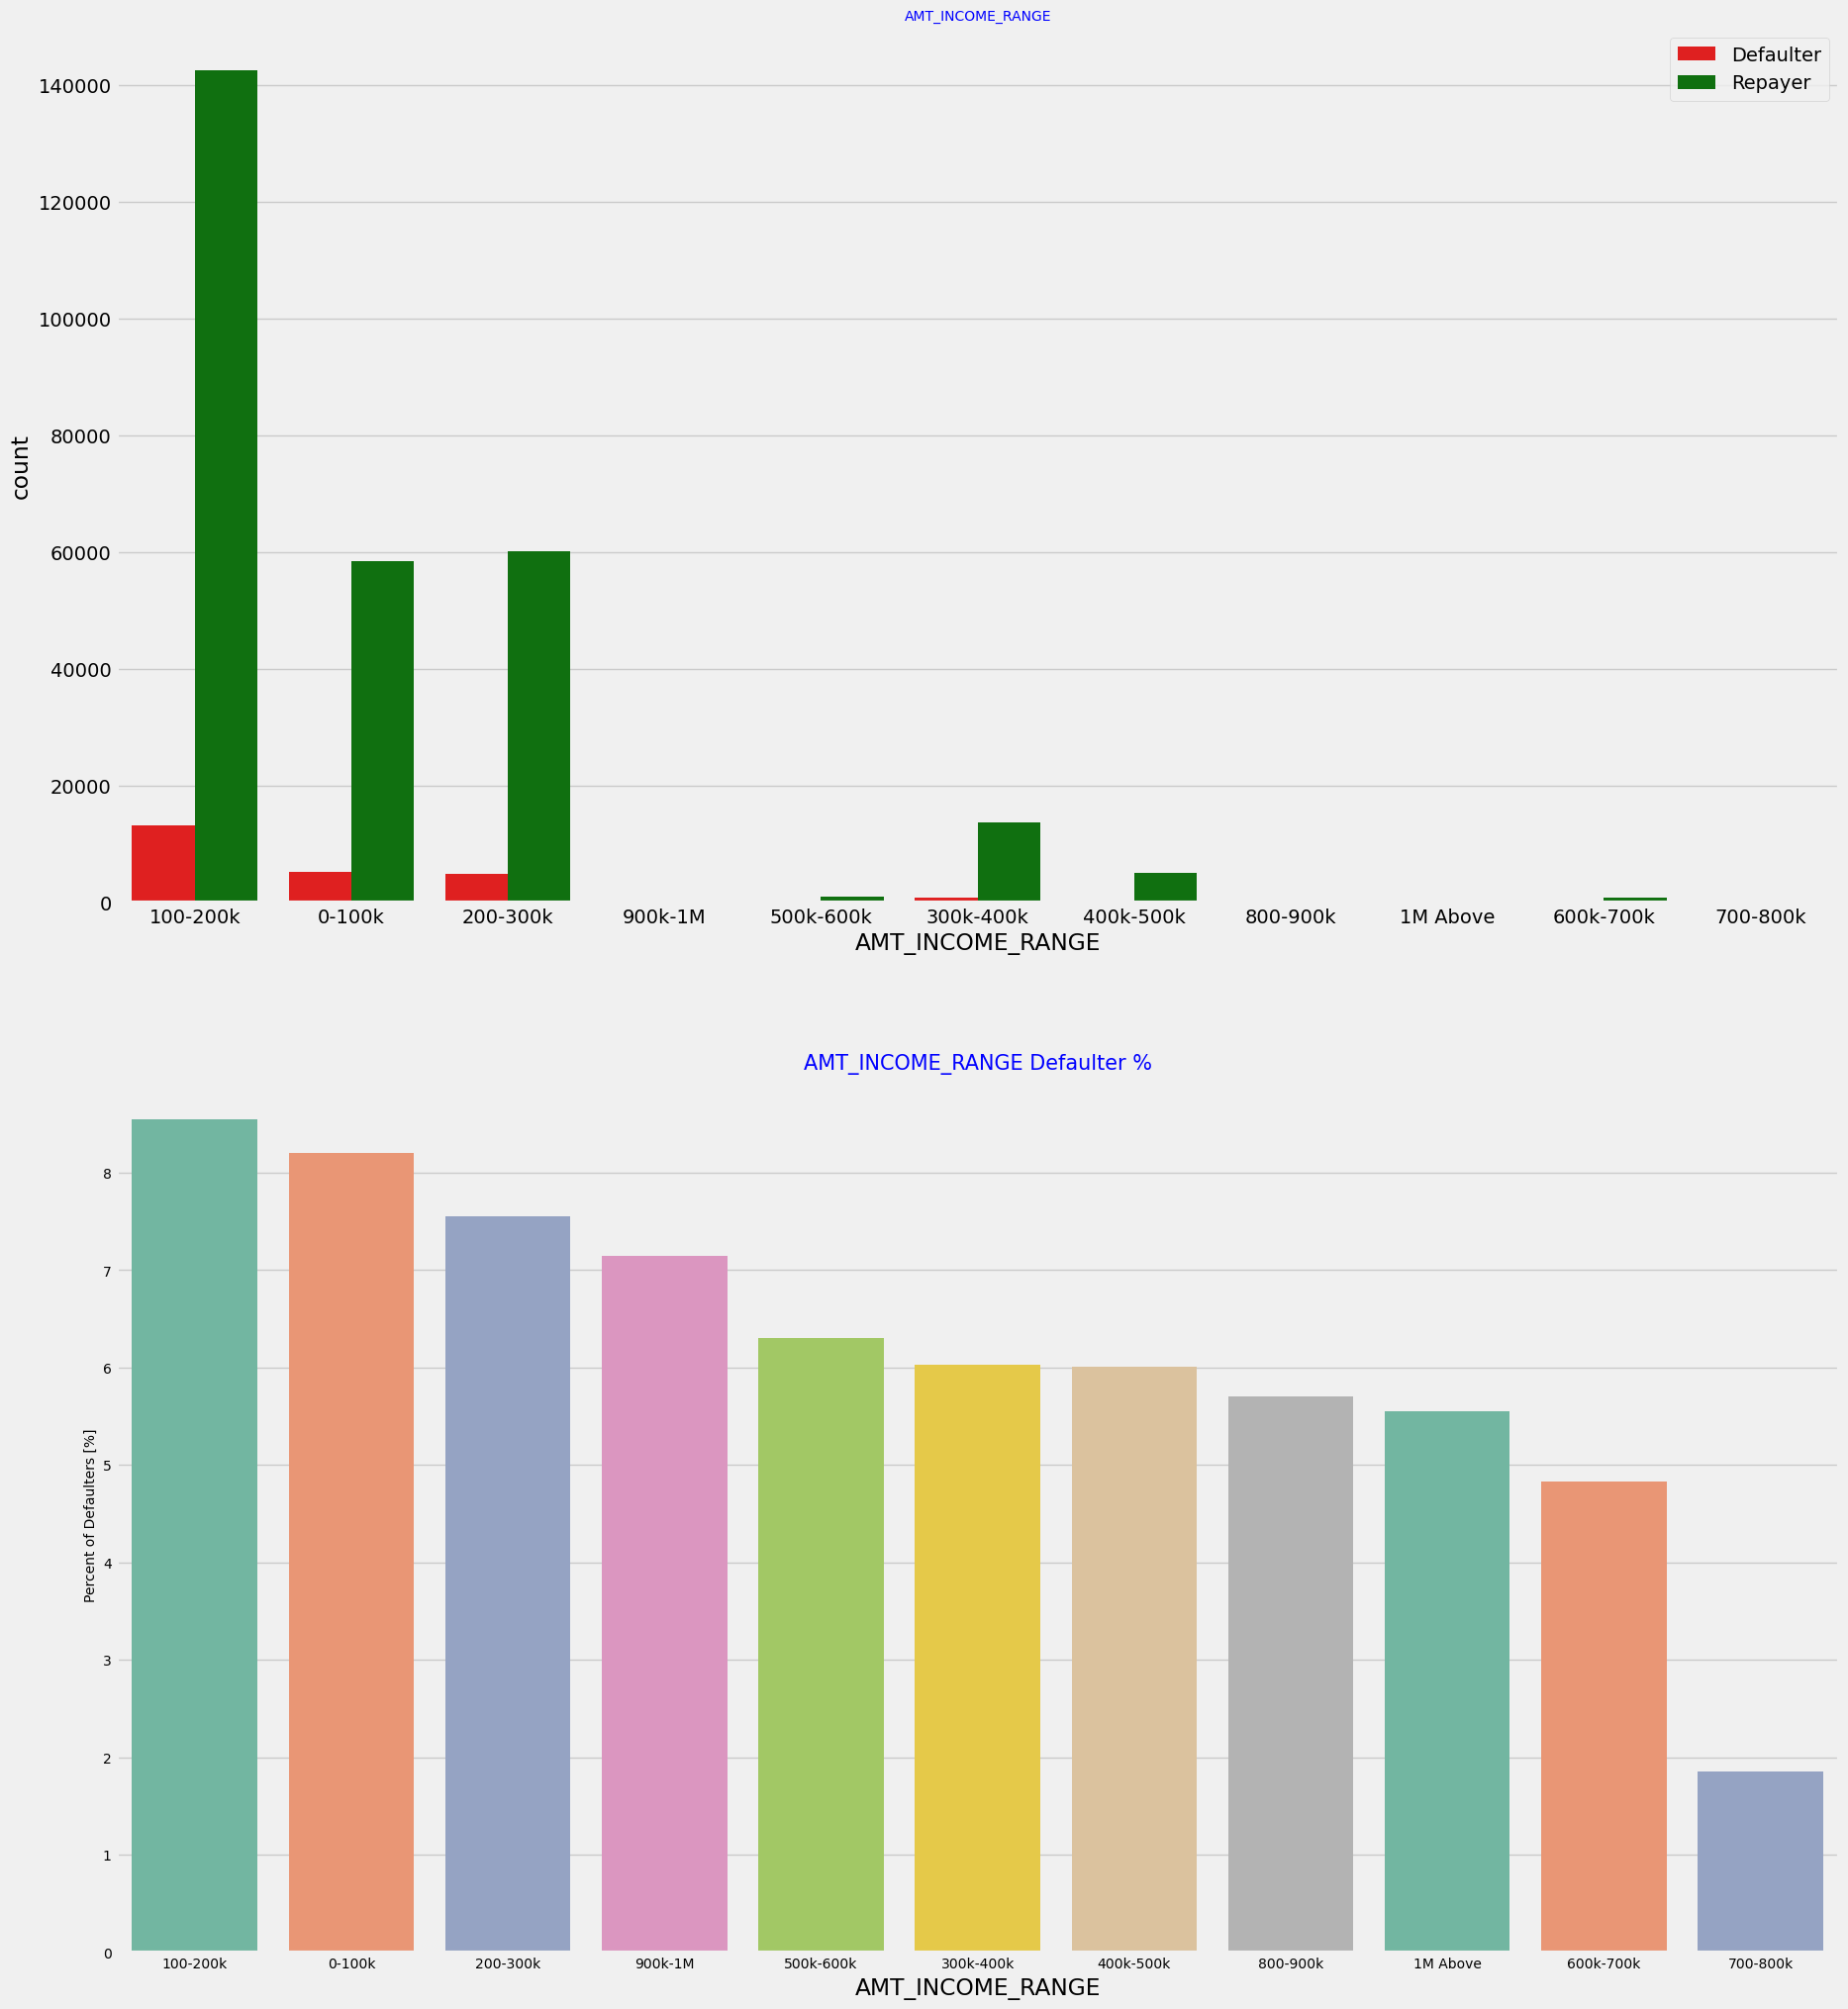

In [121]:
univariate_categorical("AMT_INCOME_RANGE",False,False,False)

Most of the applicants have salary less than 300k and applicants with salary more than 700k are less likely to default

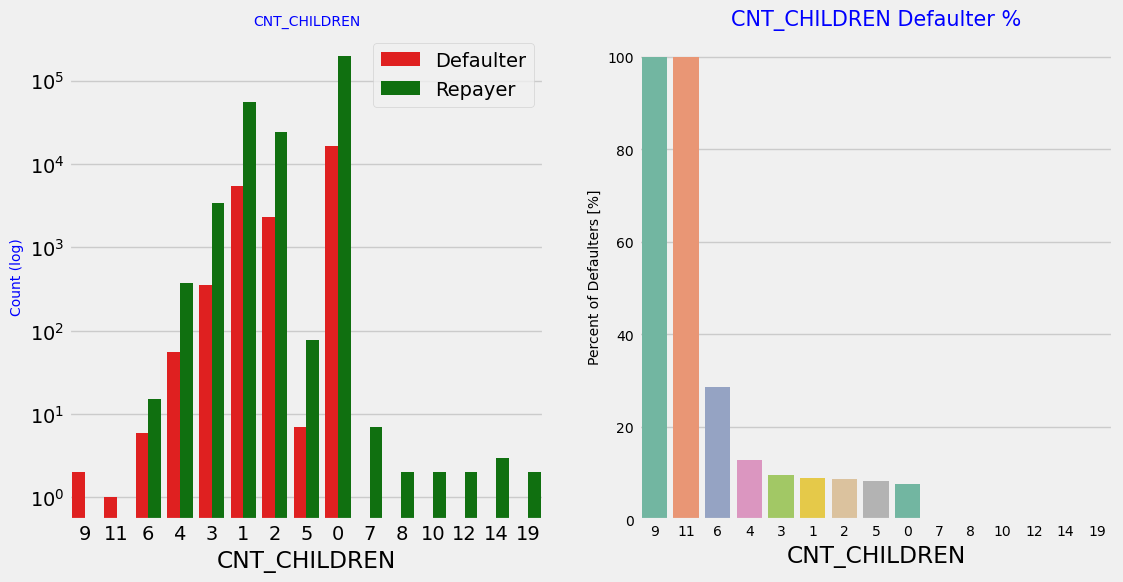

In [122]:
univariate_categorical("CNT_CHILDREN",True)

Most of the applicants do not have children. Very few clients have more than 3 children. Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate client with childern less than 3 have low defaulting

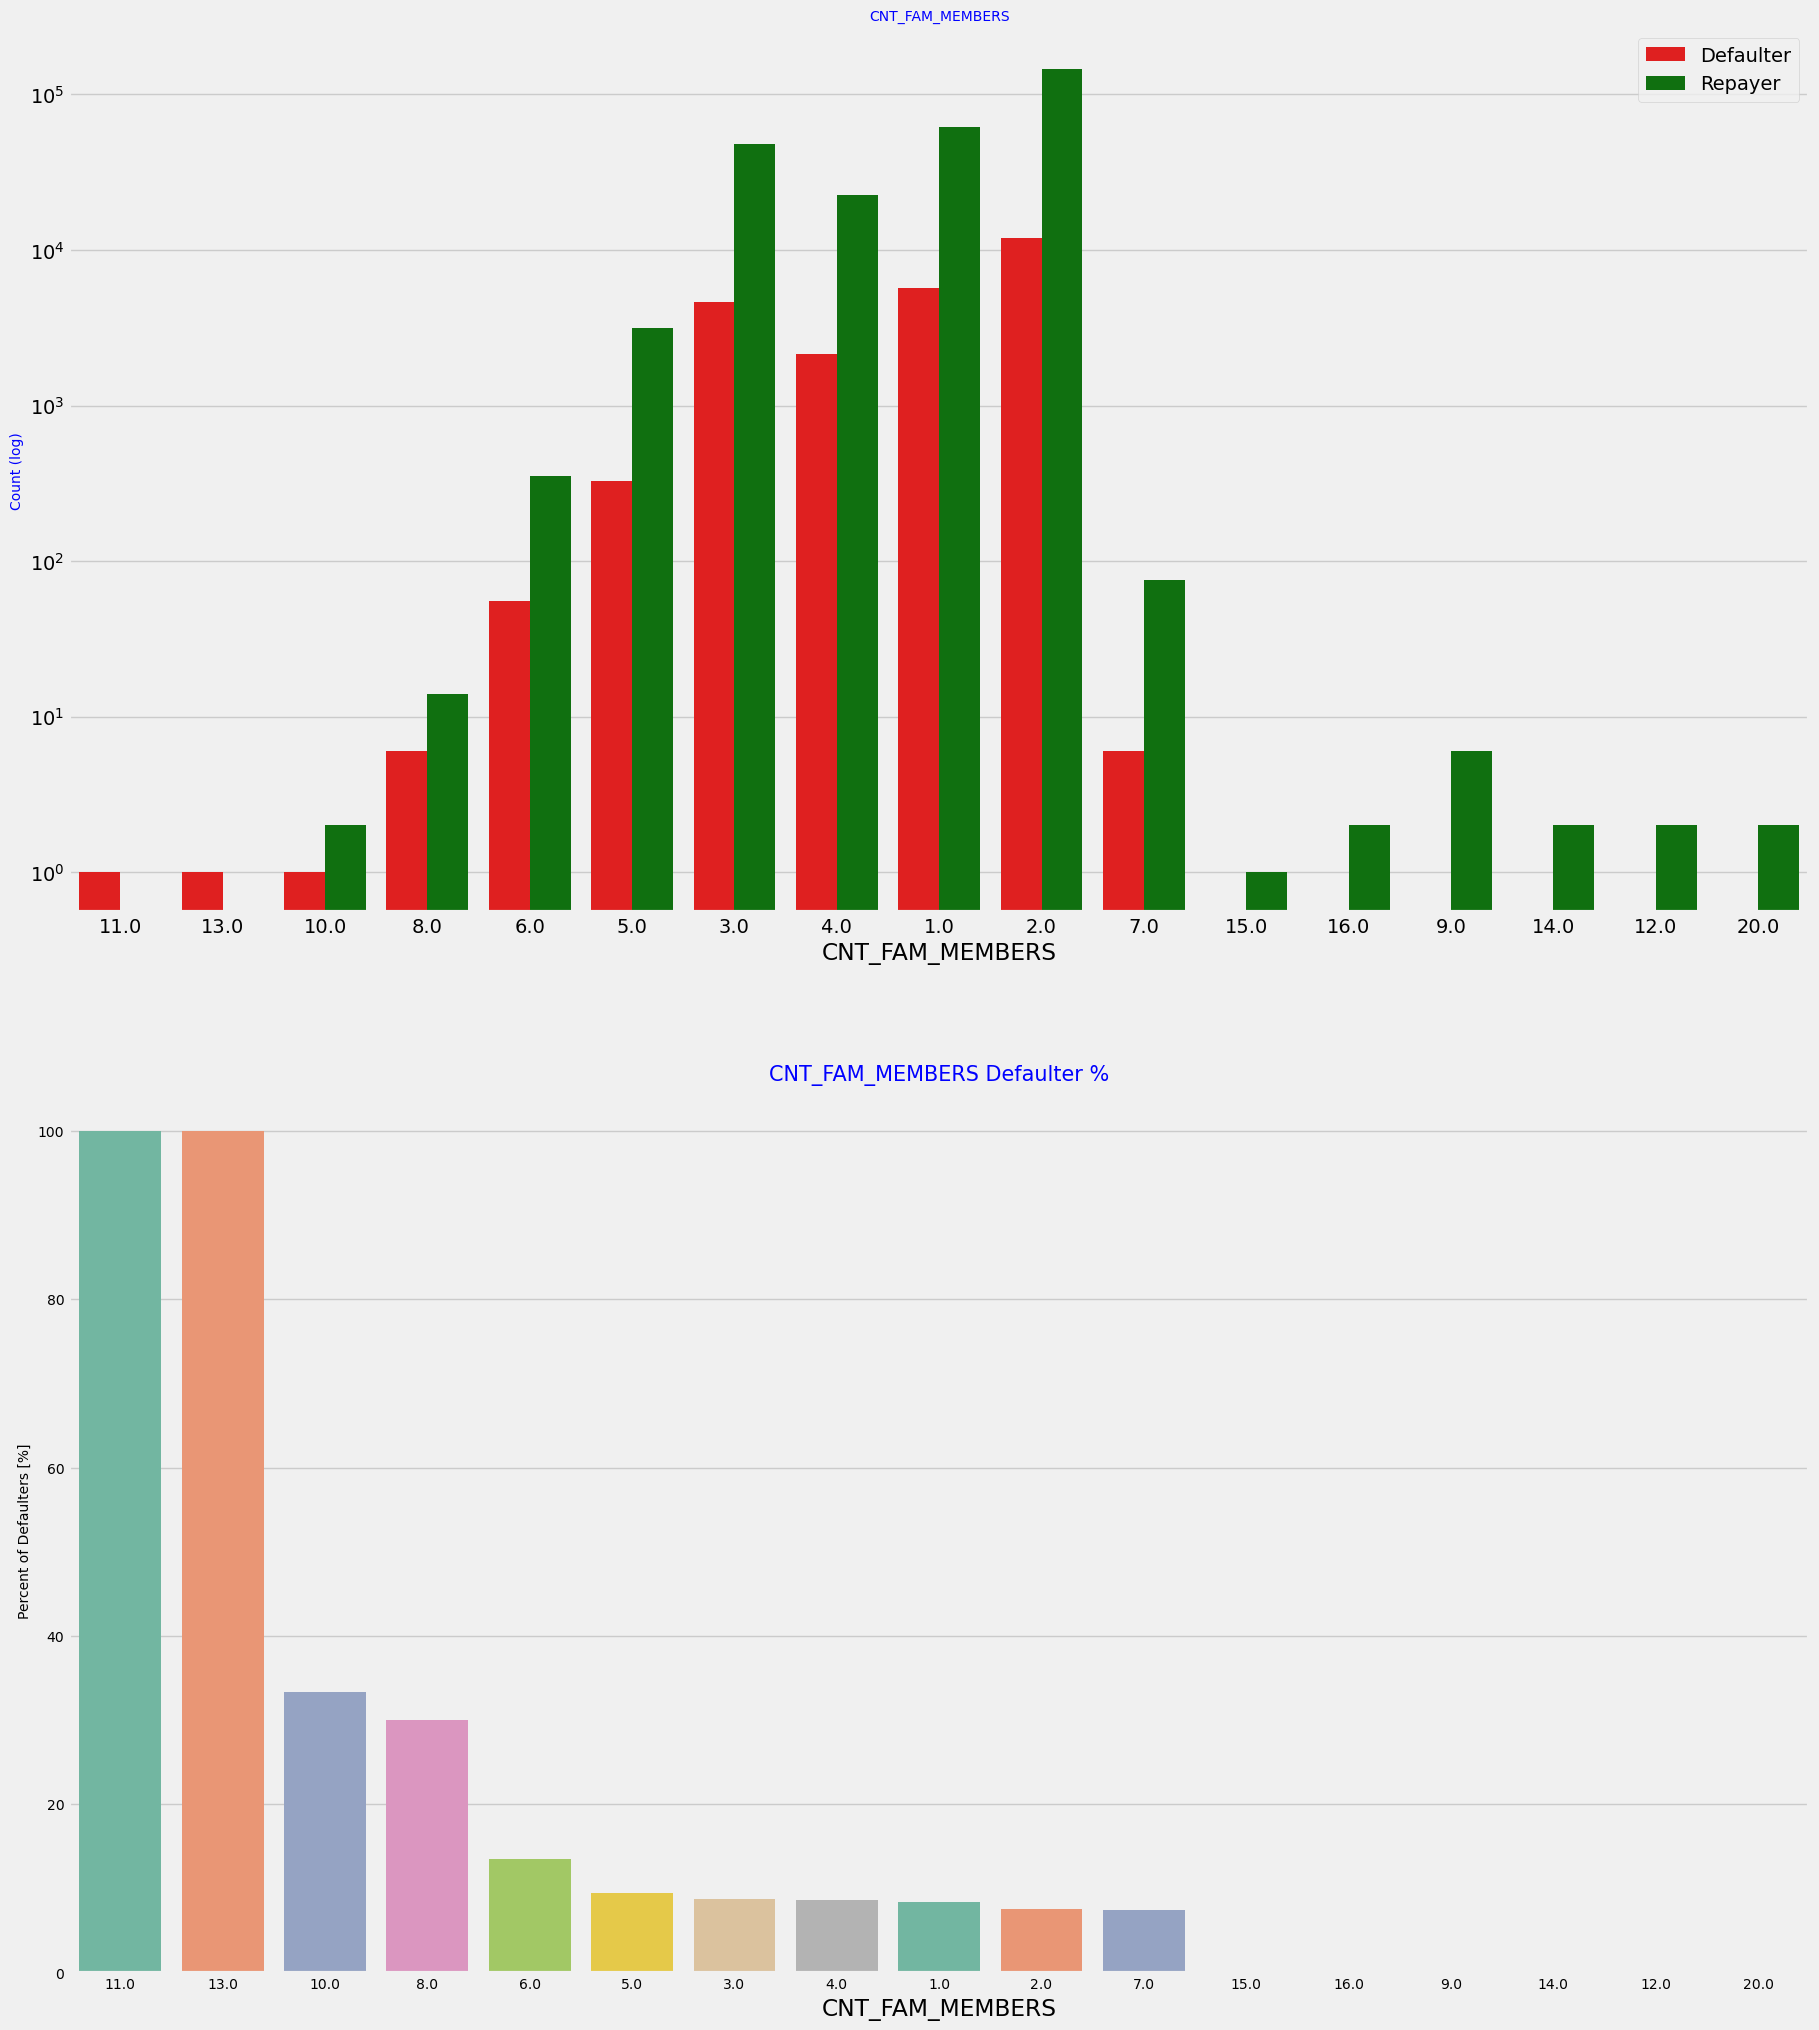

In [123]:
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

client with family members less than 5 people are less likely to default payment

In [124]:
#Multivariate Analysis
app.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

count      mean       std     min    25%     50%      75%        max
NAME_INCOME_TYPE                                                                             
Businessman               10.0  6.525000  6.272260  1.8000  2.250  4.9500  8.43750    22.5000
Commercial associate   71617.0  2.029553  1.479742  0.2655  1.350  1.8000  2.25000   180.0009
Maternity leave            5.0  1.404000  1.268569  0.4950  0.675  0.9000  1.35000     3.6000
Pensioner              55362.0  1.364013  0.766503  0.2565  0.900  1.1700  1.66500    22.5000
State servant          21703.0  1.797380  1.008806  0.2700  1.125  1.5750  2.25000    31.5000
Student                   18.0  1.705000  1.066447  0.8100  1.125  1.5750  1.78875     5.6250
Unemployed                22.0  1.105364  0.880551  0.2655  0.540  0.7875  1.35000     3.3750
Working               158774.0  1.631699  3.075777  0.2565  1.125  1.3500  2.02500  1170.0000

bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",app,"TARGET",(18,10))

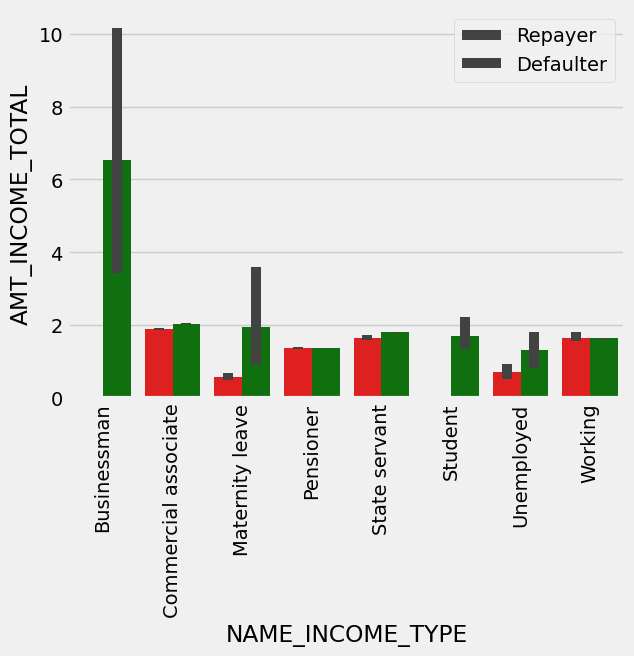

In [125]:
app['TARGET']=app['TARGET'].astype('str')
sns.barplot(x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',data= app,hue='TARGET',palette=['r','g'])
plt.xticks(rotation=90)
plt.legend(['Repayer','Defaulter'])

Businessman have high salary compared to all other occupations

In [126]:
#Numeric Analysis
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CRED

In [127]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  object  
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [128]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis
app['TARGET'] = app['TARGET'].astype(int)
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = app.loc[app['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = app.loc[app['TARGET']==1, cols_for_correlation] # Defaulters

OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, AGe,yeARS_EMPLOYED ,EMPLOYMENT_YEAR were not used in the above formula

In [129]:
#Correlation between numeric variable
corr_repayer = Repayer_df.corr(numeric_only=True)#computing correlation for only numeric columns
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(bool))# Select upper triangle of correlation matrix
corr_df_repayer = corr_repayer.unstack().reset_index()# list highly correlated pairs from large coorelation matrix
corr_df_repayer.columns =['VAR1','VAR2','Correlation']#adding column names
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)# DataFrame with NA entries dropped from it or None if ``inplace=True``
corr_df_repayer['Correlation']=corr_df_repayer['Correlation'].abs()
corr_df_repayer.sort_values(by='Correlation',ascending=False,inplace=True)#sort correlation values in decreasing order
corr_df_repayer.head(10)

VAR1              VAR2  Correlation
94     AMT_GOODS_PRICE        AMT_CREDIT     0.987250
230    CNT_FAM_MEMBERS      CNT_CHILDREN     0.878571
95     AMT_GOODS_PRICE       AMT_ANNUITY     0.776686
71         AMT_ANNUITY        AMT_CREDIT     0.771309
167      DAYS_EMPLOYED        DAYS_BIRTH     0.626114
70         AMT_ANNUITY  AMT_INCOME_TOTAL     0.418953
93     AMT_GOODS_PRICE  AMT_INCOME_TOTAL     0.349462
47          AMT_CREDIT  AMT_INCOME_TOTAL     0.342799
138         DAYS_BIRTH      CNT_CHILDREN     0.336966
190  DAYS_REGISTRATION        DAYS_BIRTH     0.333151

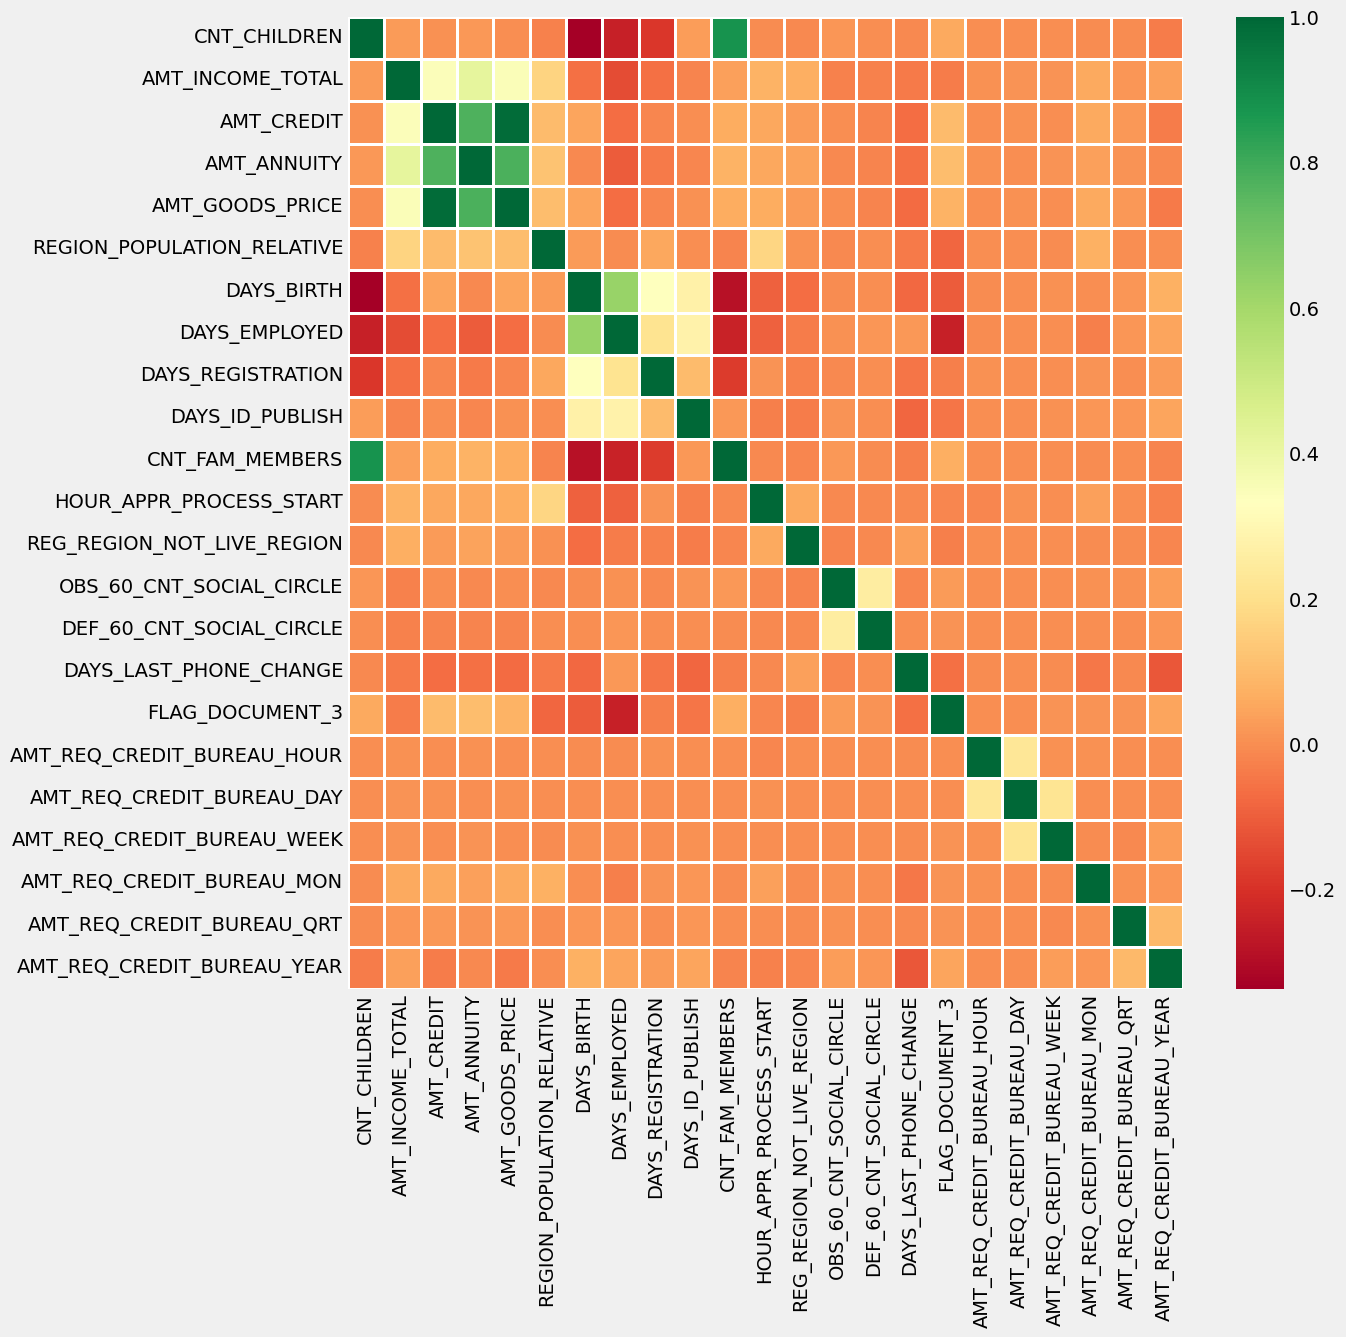

In [130]:
#Correlation heat map of Repayers
fig=plt.figure(figsize=(12,12))
ax = sns.heatmap(Repayer_df.corr(numeric_only=True), cmap="RdYlGn",annot=False,linewidth =1)

Amount of Goods price, Amount Annuity and Income has high correlation with Amount Credit

In [131]:
#Getting top 10 correlation for Defaulter data
Corr_Defaulter=Defaulter_df.corr(numeric_only=True)
Corr_Defaulter=Corr_Defaulter.where(np.triu(np.ones(Corr_Defaulter.shape),k=1).astype(bool))
Corr_df_Defaulter=Corr_Defaulter.unstack().reset_index()
Corr_df_Defaulter.columns=['var1','var2','Correlation']
Corr_df_Defaulter.dropna(subset='Correlation',inplace=True)
Corr_df_Defaulter['Correlation']=Corr_df_Defaulter['Correlation'].abs()
Corr_df_Defaulter.sort_values(by='Correlation',ascending=False, inplace=True)   
Corr_df_Defaulter.head(10)

var1                      var2  Correlation
94            AMT_GOODS_PRICE                AMT_CREDIT     0.983103
230           CNT_FAM_MEMBERS              CNT_CHILDREN     0.885484
95            AMT_GOODS_PRICE               AMT_ANNUITY     0.752699
71                AMT_ANNUITY                AMT_CREDIT     0.752195
167             DAYS_EMPLOYED                DAYS_BIRTH     0.582185
190         DAYS_REGISTRATION                DAYS_BIRTH     0.289114
375           FLAG_DOCUMENT_3             DAYS_EMPLOYED     0.272169
335  DEF_60_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE     0.264159
138                DAYS_BIRTH              CNT_CHILDREN     0.259109
213           DAYS_ID_PUBLISH                DAYS_BIRTH     0.252863

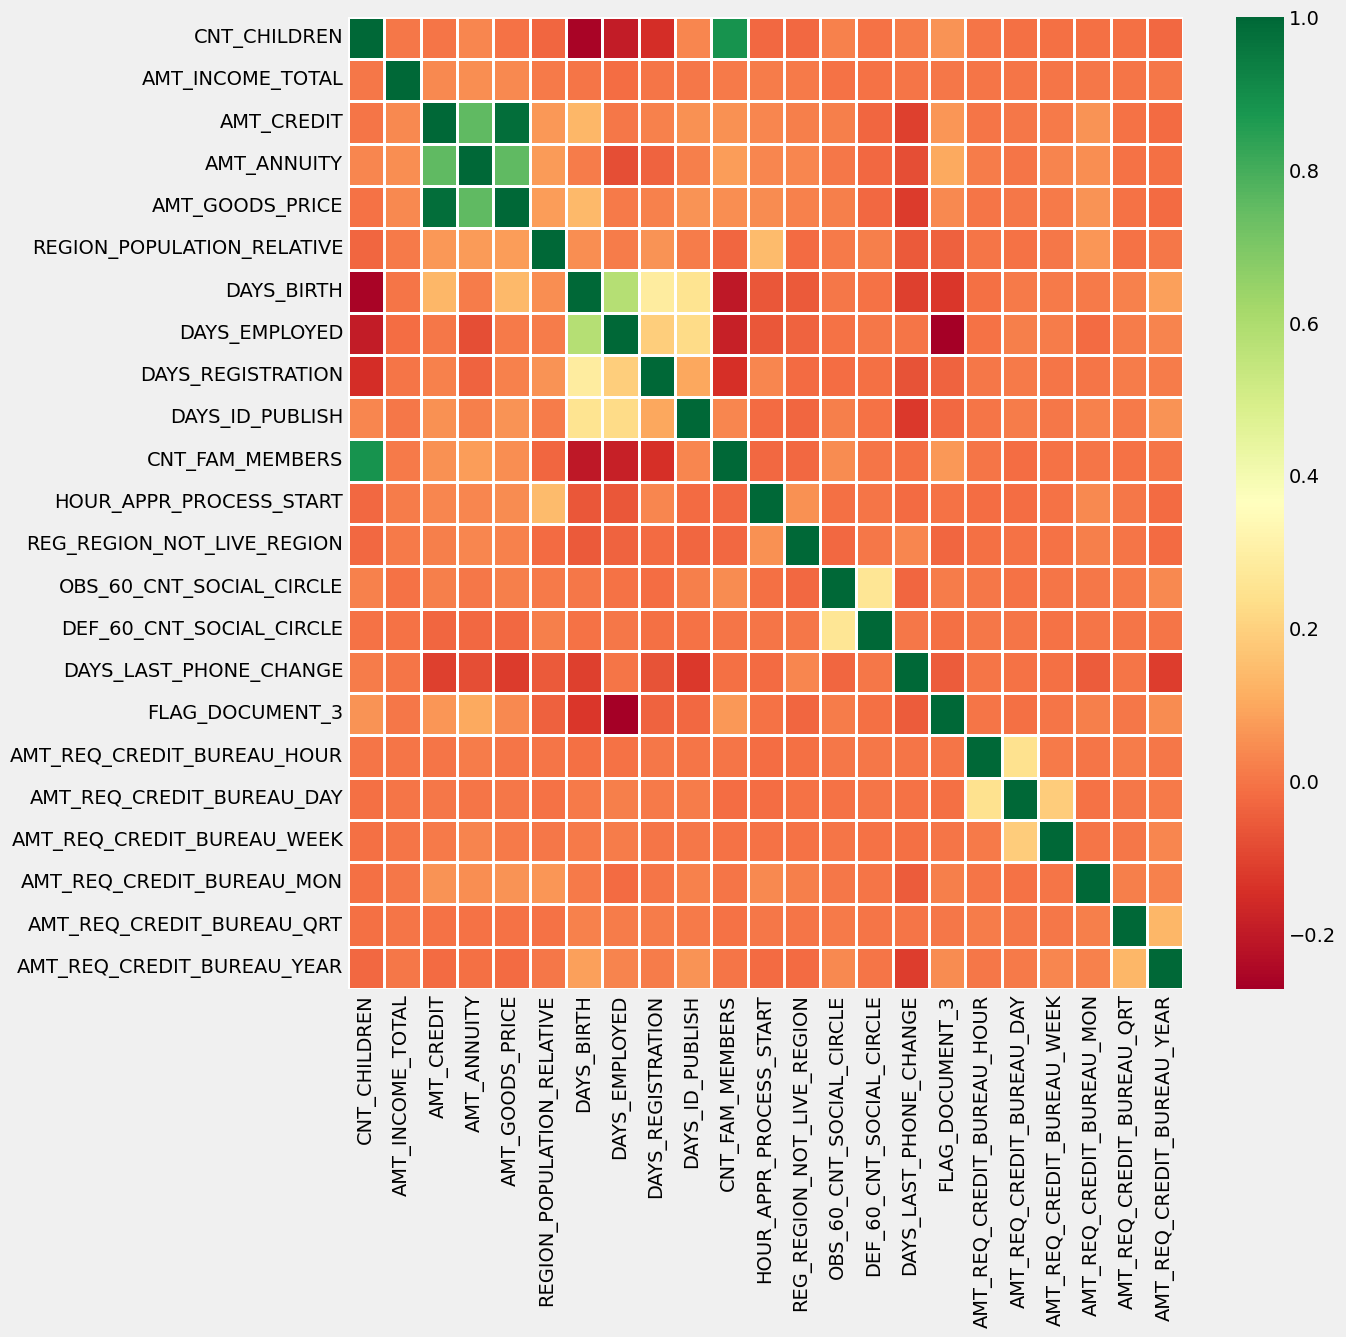

In [132]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Defaulter_df.corr(numeric_only=True), cmap="RdYlGn",annot=False,linewidth =1)

AMT_CREDIT,AMT_ANNUITY and AMT_GOODS_PRICE show high correlation. AMT_INCOME_TOTAL and AMT_ANNUITY has more coorelation with repayers when compared to defaulters DAYS_EMPLOYED and DAYS_BIRTH has correlation 0.62 with repayers whereas defaulters has 0.58 lower than defaulters DAYS_BIRTH and CNT_CHILDREN has 0.34 correlation with repayer and 0.26 with defaulters

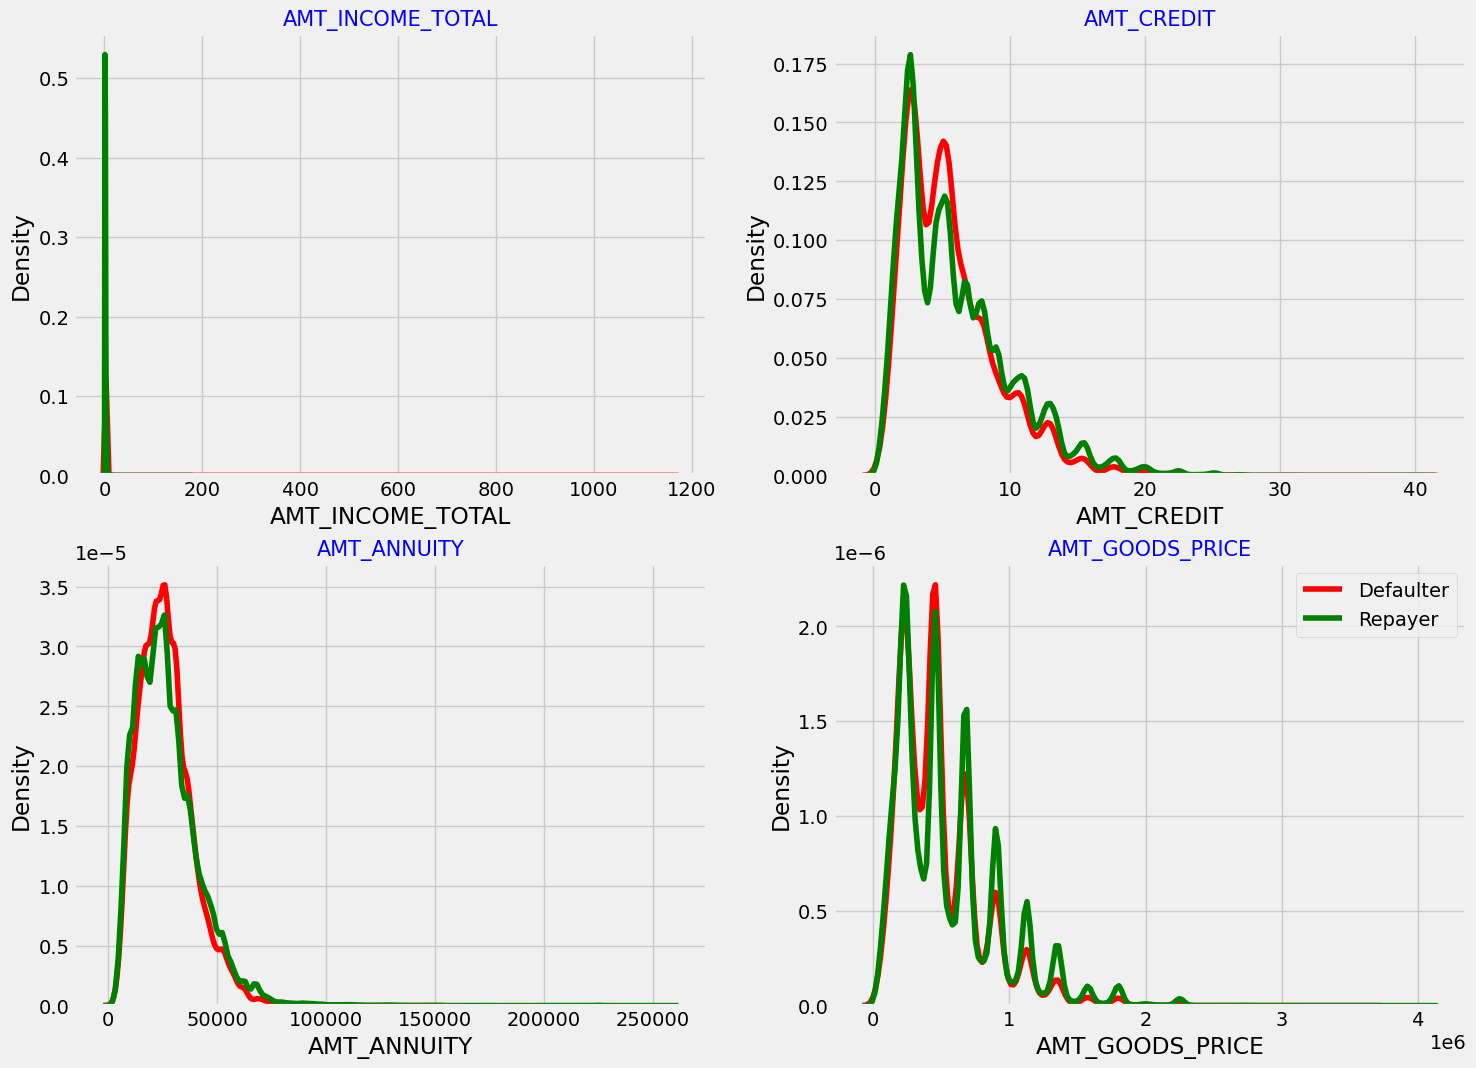

In [133]:
#Numerical Univariate Analysis
amount=app[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']]
fig=plt.figure(figsize=(16,12))
for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]],hist=False,color='r',label='Defaulter')
    sns.distplot(Repayer_df[i[1]],hist=False,color='g',label='Repayer')
    plt.title(i[1], fontdict={'fontsize': 15,'fontweight': 5,'color': 'Blue'})
plt.legend()
plt.show()

The repayers and defaulters distribution overlap in all the attributes and hence we cannot use these parameters for taking thr decision. Most of the loans are given for good pricre below 10 lakhs. Credit amount is less than 10 lakhs and pay annuity less than 50000

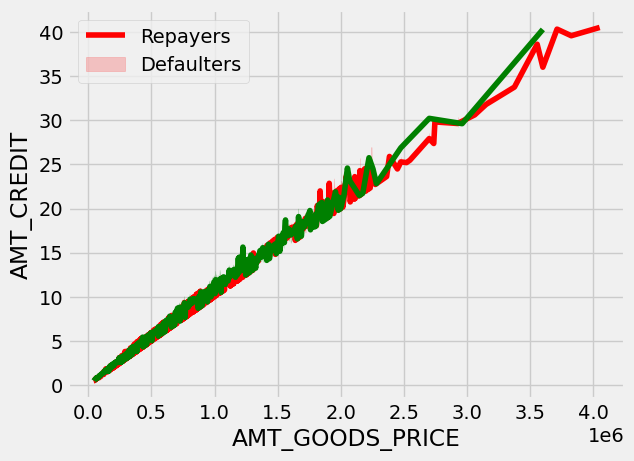

In [134]:
sns.lineplot(x='AMT_GOODS_PRICE',y='AMT_CREDIT',data=app,hue='TARGET',palette=['r','g'])
plt.legend(['Repayers','Defaulters'])

with the increase in 'AMT_GOODS_PRICE',defaulters are also increased

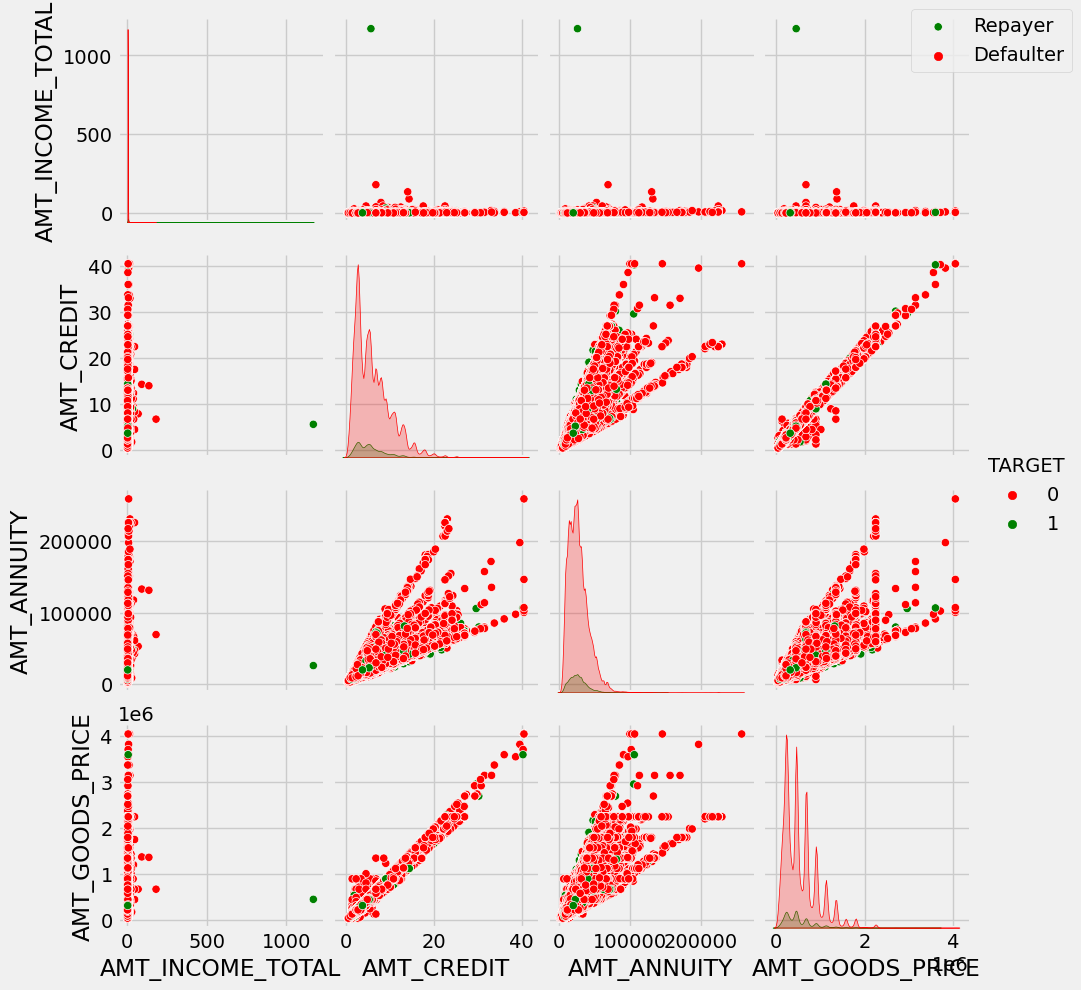

In [135]:
amount = app[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["r","g"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

Amount Credit and Amount Good price has high correlation based on the scatterplot which looks like a line.

In [136]:
loan_process=pd.merge(app,prev,how='inner',on='SK_ID_CURR')
loan_process.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE AMT_CREDIT_RANGE  AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYMENT_YEAR  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION DAYS_DECISION_GROUP
0      100002       1           Cash loans           M            N               Y             0             2.025      4.065975        24700.5           351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120        Laborers              1.0                    2                           2                  WEDNESDAY                       10                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0         200-300k        400k-500k   25     20-30               1             0-5     1038818       Consumer loans       9251.775         179055.0      179055.0           179055.0                    XAP             Approved            606                    XNA                XAP              New              Vehicles            POS               XNA                    Stone               500       Auto technology         24.0       low_normal      POS other with interest             400-800
1      100003       0           Cash loans           F            N               N             0             2.700     12.935025        35698.5          1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                     MONDAY                       11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0         200-300k         1M Above   45     40-50               3    

In [137]:
#checking details of Loan Data
loan_process.shape

(1413701, 74)

In [138]:
#counting number of elements
loan_process.size

104613874

In [139]:
loan_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 74 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int32   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [140]:
loan_process.describe().T

count          mean            std           min           25%           50%           75%           max
SK_ID_CURR                  1413701.0  2.784813e+05  102811.788043  1.000020e+05  1.893640e+05  2.789920e+05  3.675560e+05  4.562550e+05
TARGET                      1413701.0  8.655296e-02       0.281179  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00
CNT_CHILDREN                1413701.0  4.048933e-01       0.717345  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  1.900000e+01
AMT_INCOME_TOTAL            1413701.0  1.733160e+00       1.985734  2.565000e-01  1.125000e+00  1.575000e+00  2.070000e+00  1.170000e+03
AMT_CREDIT_x                1413701.0  5.875537e+00       3.849173  4.500000e-01  2.700000e+00  5.084955e+00  8.079840e+00  4.050000e+01
AMT_ANNUITY_x               1413608.0  2.701702e+04   13951.164803  1.615500e+03  1.682100e+04  2.492550e+04  3.454200e+04  2.250000e+05
AMT_GOODS_PRICE_x           1412493.0  5.277186e+05  353246.491860  4.050000e+04  2.385000e+05  4.500000e+05  6.795000e+05  4.050000e+06
REGION_POPULATION_RELATIVE  1413701.0  2.074985e-02       0.013347  2.900000e-04  1.003200e-02  1.885000e-02  2.866300e-02  7.250800e-02
DAYS_BIRTH                  1413701.0  1.632105e+04    4344.557089  7.489000e+03  1.273900e+04  1.604400e+04  1.998000e+04  2.520100e+04
DAYS_EMPLOYED               1413701.0  7.266347e+04  143337.360991  0.000000e+00  1.042000e+03  2.401000e+03  6.313000e+03  3.652430e+05
DAYS_REGISTRATION           1413701.0  5.003233e+03    3551.050912  0.000000e+00  2.001000e+03  4.508000e+03  7.510000e+03  2.467200e+04
DAYS_ID_PUBLISH             1413701.0  3.034563e+03    1507.376375  0.000000e+00  1.783000e+03  3.330000e+03  4.319000e+03  7.197000e+03
CNT_FAM_MEMBERS             1413701.0  2.150501e+00       0.900679  1.000000e+00  2.000000e+00  2.000000e+00  3.000000e+00  2.000000e+01
HOUR_APPR_PROCESS_START     1413701.0  1.198433e+01       3.232181  0.000000e+00  1.000000e+01  1.200000e+01  1.400000e+01  2.300000e+01
REG_REGION_NOT_LIVE_REGION  1413701.0  1.207327e-02       0.109213  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00
OBS_30_CNT_SOCIAL_CIRCLE    1410555.0  1.544176e+00       2.530715  0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00  3.480000e+02
DEF_30_CNT_SOCIAL_CIRCLE    1410555.0  1.540436e-01       0.465897  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  3.400000e+01
OBS_60_CNT_SOCIAL_CIRCLE    1410555.0  1.526303e+00       2.508953  0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00  3.440000e+02
DEF_60_CNT_SOCIAL_CIRCLE    1410555.0  1.080426e-01       0.379059  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.400000e+01
DAYS_LAST_PHONE_CHANGE      1413701.0 -1.084701e+03     799.936851 -4.292000e+03 -1.683000e+03 -1.011000e+03 -3.960000e+02  0.000000e+00
FLAG_DOCUMENT_3             1413701.0  7.385600e-01       0.439419  0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
AMT_REQ_CREDIT_BUREAU_HOUR  1413701.0  5.484894e-03       0.077026  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00
AMT_REQ_CREDIT_BUREAU_DAY   1413701.0  6.028149e-03       0.100197  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  9.000000e+00
AMT_REQ_CREDIT_BUREAU_WEEK  1413701.0  3.410198e-02       0.201290  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  8.000000e+00
AMT_REQ_CREDIT_BUREAU_MON   1413701.0  2.664913e-01       0.926843  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.700000e+01
AMT_REQ_CREDIT_BUREAU_QRT   1413701.0  3.196935e-01       0.878144  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  2.610000e+02
AMT_REQ_CREDIT_BUREAU_YEAR  1413701.0  2.691239e+00       2.157176  0.000000e+00  1.000000e+00  2.000000e+00  4.000000e+00  2.500000e+01
AGE                         1413701.0  4.421384e+01      11.902166  2.000000e+01  3.400000e+01  4.300000e+01  5.400000e+01  6.900000e+01
YEARS_EMPLOYED              1413701.0  1.985500e+02     392

In [141]:
#Splitting data based on Target

L0=loan_process[loan_process['TARGET']==0]#Repayer
L1=loan_process[loan_process['TARGET']==1]#Defaulter

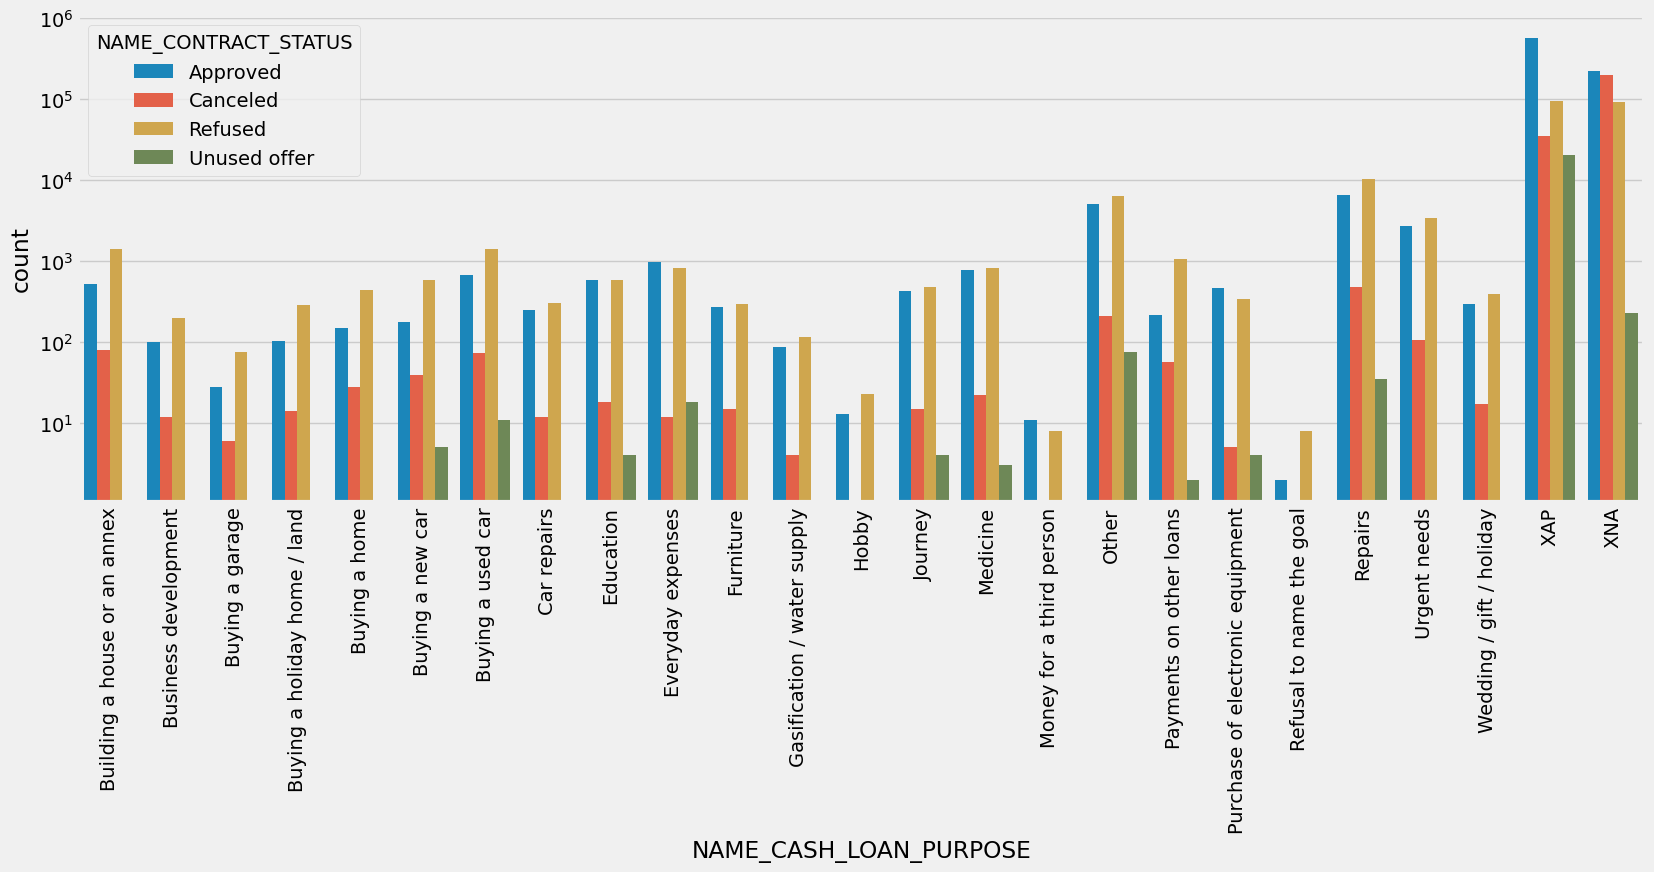

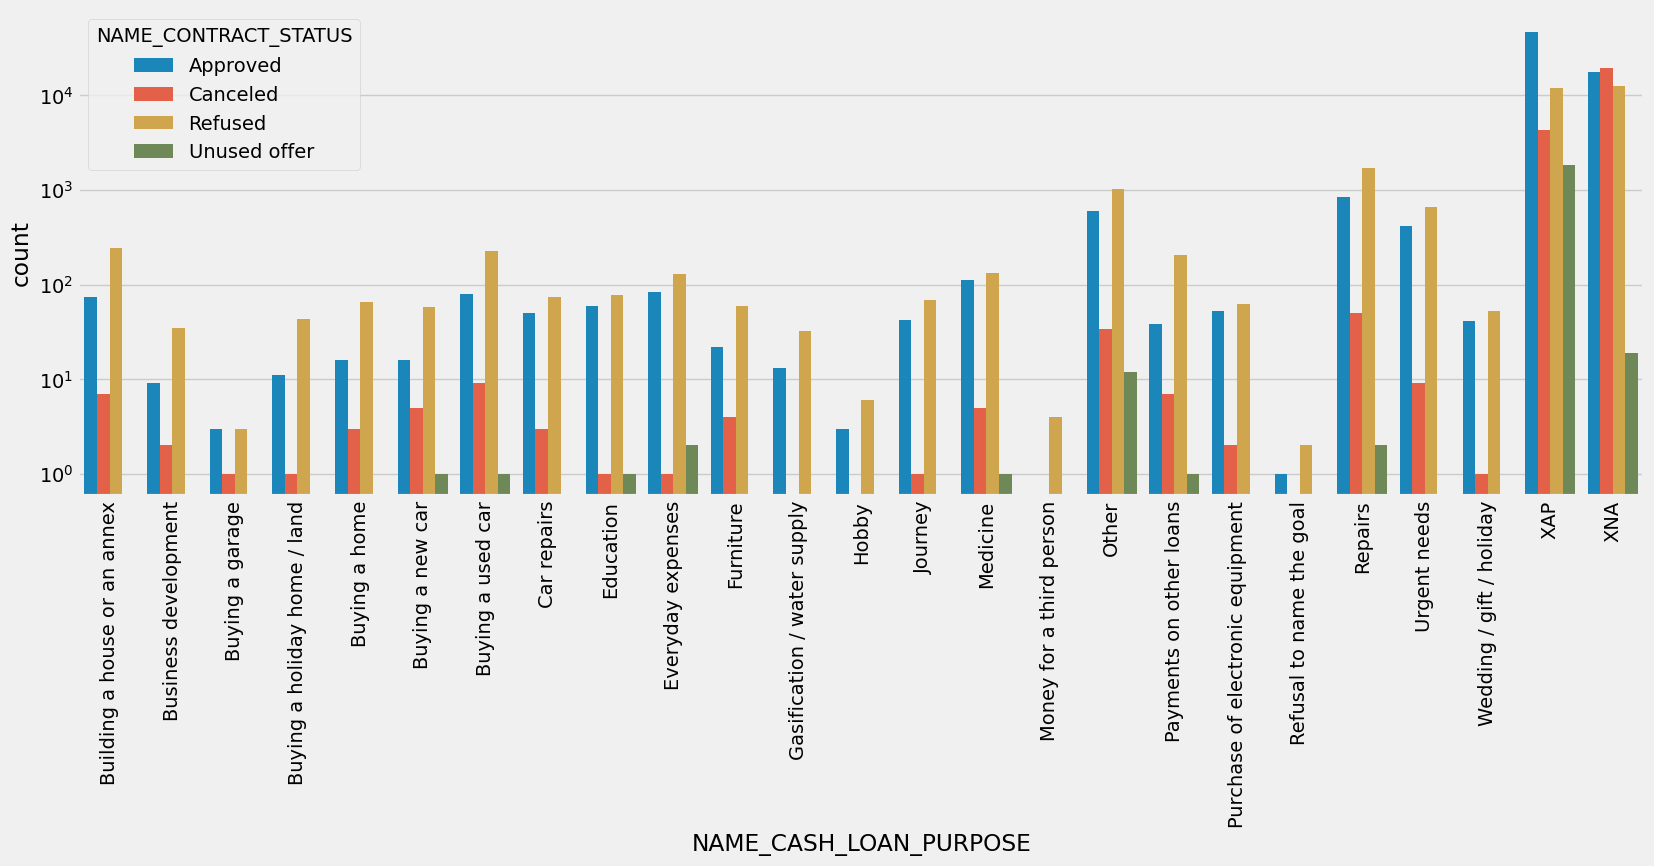

In [142]:
#code for graph (practice)
x1=plt.subplots(figsize=(18,6))
x1=sns.countplot(x='NAME_CASH_LOAN_PURPOSE',data=L0,hue='NAME_CONTRACT_STATUS')
x1=plt.xticks(rotation=90)
x1=plt.yscale('log')
x2=plt.subplots(figsize=(18,6))
x2=sns.countplot(x='NAME_CASH_LOAN_PURPOSE',data=L1,hue='NAME_CONTRACT_STATUS')
x2=plt.xticks(rotation=90)
x2=plt.yscale('log')

Loan purpose have lot of unknown values. Loans take for repairs has been more defaulted. Therefore giving loan for repairs is highly risk

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Building a house or an annex'),
  Text(1, 0, 'Business development'),
  Text(2, 0, 'Buying a garage'),
  Text(3, 0, 'Buying a holiday home / land'),
  Text(4, 0, 'Buying a home'),
  Text(5, 0, 'Buying a new car'),
  Text(6, 0, 'Buying a used car'),
  Text(7, 0, 'Car repairs'),
  Text(8, 0, 'Education'),
  Text(9, 0, 'Everyday expenses'),
  Text(10, 0, 'Furniture'),
  Text(11, 0, 'Gasification / water supply'),
  Text(12, 0, 'Hobby'),
  Text(13, 0, 'Journey'),
  Text(14, 0, 'Medicine'),
  Text(15, 0, 'Money for a third person'),
  Text(16, 0, 'Other'),
  Text(17, 0, 'Payments on other loans'),
  Text(18, 0, 'Purchase of electronic equipment'),
  Text(19, 0, 'Refusal to name the goal'),
  Text(20, 0, 'Repairs'),
  Text(21, 0, 'Urgent needs'),
  Text(22, 0, 'Wedding / gift / holiday'),
  Text(23, 0, 'XAP'),
  Text(24, 0, 'XNA')])

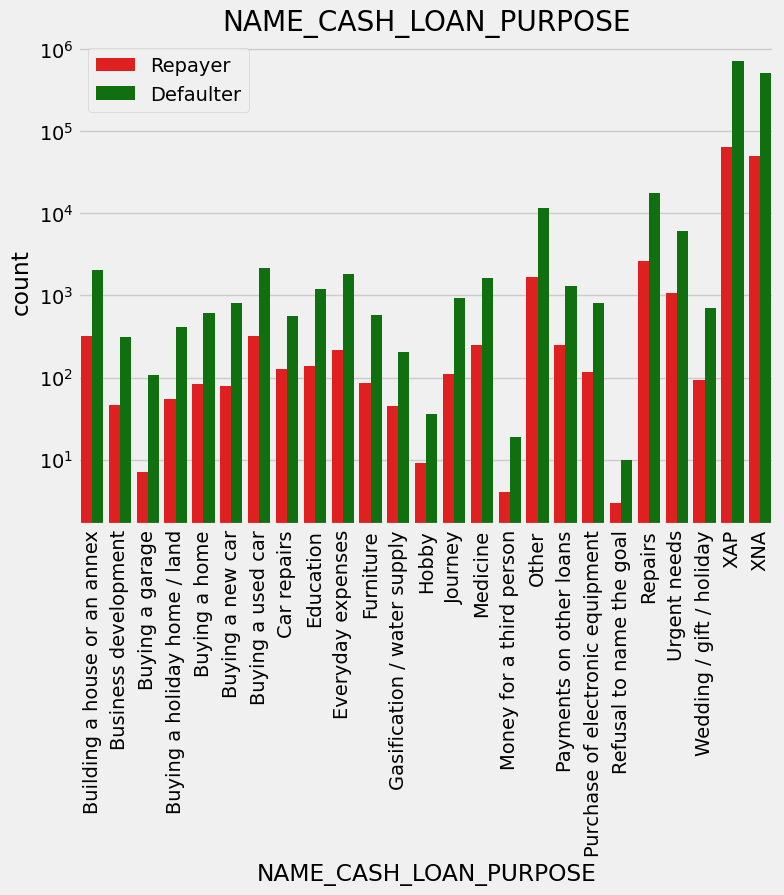

In [143]:
loan_process['TARGET']=loan_process['TARGET'].astype(str)
plt.subplots(figsize=(8,6))
sns.countplot(x='NAME_CASH_LOAN_PURPOSE',data=loan_process,hue='TARGET',palette=['r','g'])
plt.title('NAME_CASH_LOAN_PURPOSE')
plt.legend(['Repayer','Defaulter'])
plt.yscale('log')
plt.xticks(rotation=90)

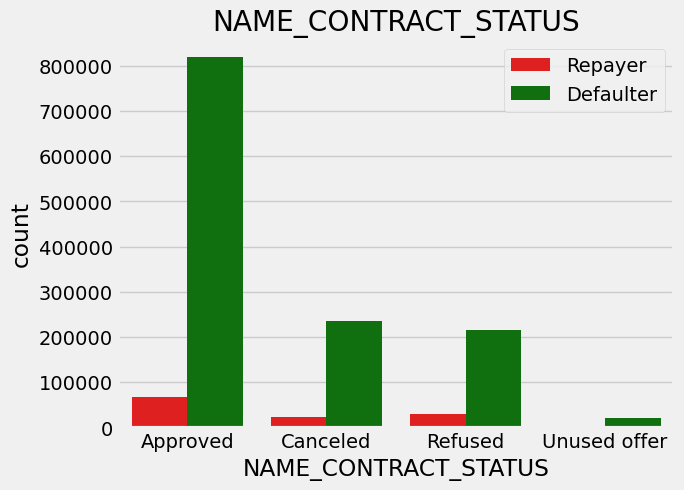

In [144]:
sns.countplot(x='NAME_CONTRACT_STATUS',data=loan_process,hue='TARGET',palette=['r','g'])
plt.title('NAME_CONTRACT_STATUS')
plt.legend(['Repayer','Defaulter'])

In [145]:
g=loan_process.groupby('NAME_CONTRACT_STATUS')['TARGET']
df1=pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1,keys=('Counts','Percentage'))
#calculating percentage of counts of contract status of target and defaulters and concating counts with percentage

In [146]:
df1['Percentage']=df1['Percentage'].astype(str)+'%'
print(df1)

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


The above graph and percentage state that 90% of previously canceled applicant have repayed the loan. Therefore changing interest may change their decision and it is safe to give loan to these applicants even for low rate of interest. 88%of refused applicants also paid loan back. they should be further investigated for the reasons of refusal as they are efficient applicants

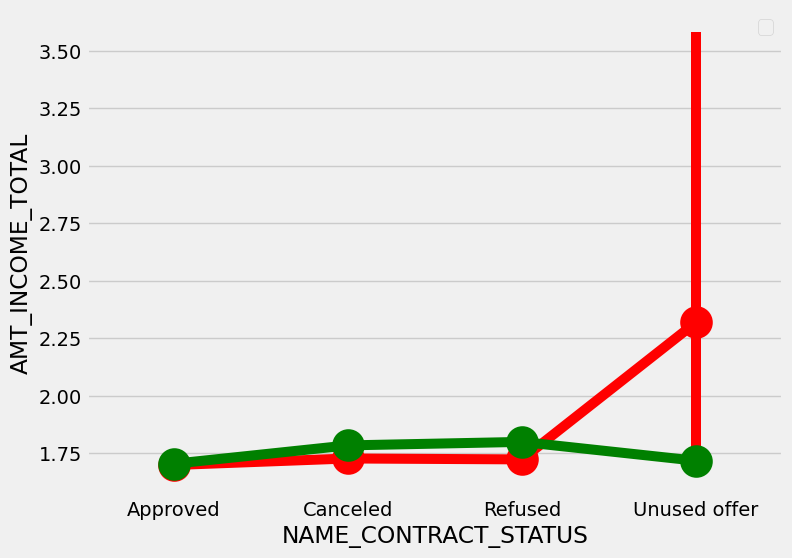

In [147]:
f,ax=plt.subplots(figsize=(8,6))
sns.pointplot(x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',data=loan_process,hue='TARGET',palette=['r','g'])
plt.legend([0,1],['Repayer','Defaulter'])

The Point plot statses that previous applicants who unused offer has defaulted even with higher salary compared with others

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='DEF_60_CNT_SOCIAL_CIRCLE'>

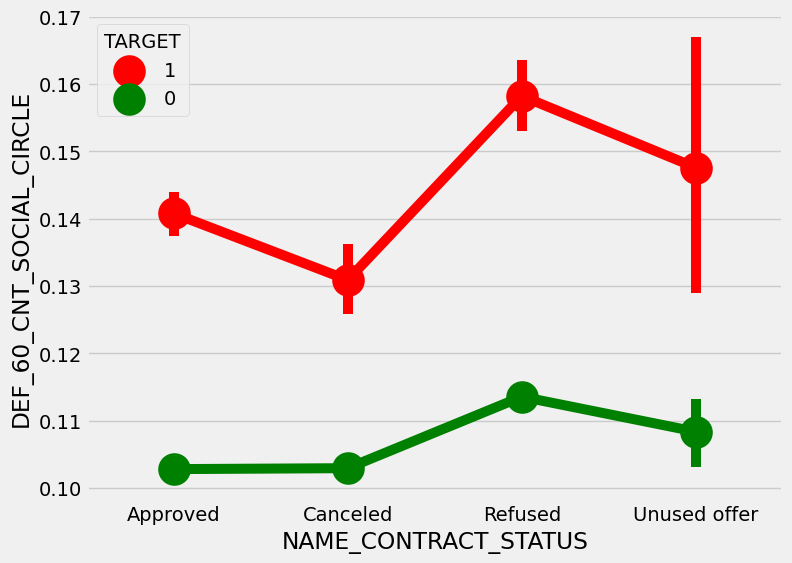

In [148]:
f,ax=plt.subplots(figsize=(8,6))
sns.pointplot(x='NAME_CONTRACT_STATUS',y='DEF_60_CNT_SOCIAL_CIRCLE',data=loan_process,hue='TARGET',palette=['r','g'])



Applicant with DEF_60_CNT_SOCIAL_CIRCLE more than 0.13 defaulted loan.Therfore, this parameter should be analysed before issuing loan

Repayer positive attributes:

EDUCATION TYPE: Academic degree clients are safe to provide loan

NAME AND INCOME TYPE: Students and Business Man are safe to provide loan

REGION_RATING: Region_1 has very less defaulter and safe to provide loan
Organization Type:Trade type 4,5 and industry type8 is safe to provide loan

Days_Birth: age above 50 years are safe to provide loan

Days_Employed: experience more than 40 years has very less likely to default

AMT_INCOME_TOTAL:Applicants with salary higher than 700k are safe to give loan

NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby and Buying garage has repayers.

Count_childern: client with childern less than 3 have low defaulting rate

Defaulter attribute:

GENDER: males have a higher chance of not returning their loans in comparision with female clients

Name Family Status:Civil marriage and singles has the highest percent of defaulters
AMT_GOOD PRICE increased the rate of defaulters

EDUCATION_TYPE: lower Secondary and Secondary defaulted loan mostly

Housing Type: Clients styaing in rented appartent and with family has more defaulters

Income _Type: applicants on maternity leave and unemployed defaulted loans

Region: Region Rating_3 has more defaulters

Occupation_Type: Low-Skill Loborers followed by Drivers, Witers staff,Security , laborers, cooking, sales and cleaning staff defaulted loans.

Age Group: 20-30 years of age defaulted loans followed by 30-40 years.

Experience: People with experience less than 5 years defaulted.ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.

Organization Type: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.

CNT_CHILDERN: Applicants with childern more than 9 defaulted loans completely.

Loan Improvements for mitigating RISK

Most of the loans are from Rented and living with family. Hence offering loan and following continuously for repaying helps business.
Income less than 300k applied loan mostly so loan should be given at higher interest to mitigate risk

Applicants with childern 4 to 8 should also given loan at high interest rate.
    
Loans taken for Repairs defaulted mostly, thus loans refused
    
People who get loan amount of 300-600k tend to default more than others.

conclusions

46 columns in application and 22 columns in previous application dataset were considered for analysis after removing unecessary cols.

90% of previously canceled applicant have repayed the loan. Therefore changing interest may change their decision and it is safe to give loan to these applicants even for low rate of interest.

88% of refused applicants also paid loan back. they should be further investigated for the reasons of refusal as they are efficient applicants.

loan repayment has no relation with owning car and realestate.

